<a href="https://colab.research.google.com/github/PierrickLeroy/Activity_Detection_From_Electrical_Consumption_Load_Curves/blob/main/STS_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>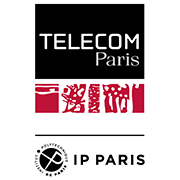</center>

<h1><center><strong>Semantic Textual Similarity (STS) project</strong></center></h1>

<center>
<h3> Project Supervisor: Aina Garí Soler</a></h3>
<email>aina.garisoler@telecom-paris.fr</email>  <br/>
Year 2021-2022
</center>

Test3 pierrick



## What is Semantic Textual Similarity (STS)?

Semantic Textual Similarity (STS) measures the degree of semantic equivalence between two texts. As an NLP task, it typically consists in determining, for two sentences $s_1$ and $s_2$, how similar they are in meaning. Systems must output a continous score $p$ between, for example, 0 (completely unrelated) and 1 (meaning-equivalent). For example, for these two unrelated sentences, $p$ should be close to 0:

$s_1$: *The black dog is running through the snow.*

$s_2$: *A race car driver is driving his car through the mud.*

### Why is it important?

There are several NLP applications that can directly benefit from STS predictions. Here are some examples:
- Evaluation of **Automatic Summarization** and **Machine Translation** models. These models must output sentences in natural language preserving the meaning of a reference text (the text to be summarized / translated);
- **Information Retrieval**: for checking the semantic equivalence between a query and a potential match;
- **Plagiarism detection**: for locating passages that are similar in content and potentially contain plagiarism.

### Why is it hard? 

**TL;DR**: Because there are different ways of saying the same thing, and there are subtle ways of saying radically different things.

Solving this task involves multiple kinds of non-trivial linguistic knowledge.Relying on counting the common words between $s_1$ and $s_2$ works to some extent, but it is not enough. The example below (taken from [Landauer et al., 1997](http://cetus.stat.cmu.edu/~cshalizi/350/2008/readings/Landauer-Dumais.pdf)), with a very high word overlap, illustrates this. The relations between words in a sentence are also important.

$s_1$: *It was not the sales manager who hit the bottle that day, but the office worker with the serious drinking problem.*

$s_2$: *That day the office manager, who was drinking, hit the problem sales worker with a bottle, but it was not serious.*


<p align="left">
  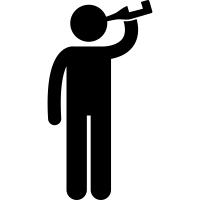


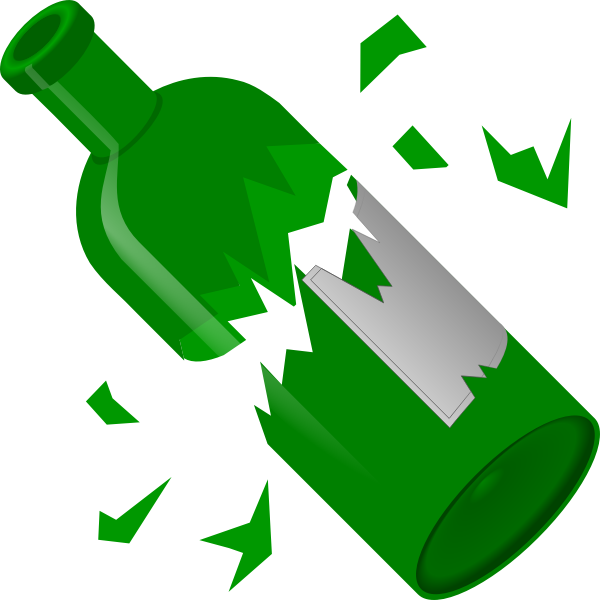



</p>

In fact, people may often refer to the same thing using different words (**synonyms**, like *happy* and *glad*, or **hypernyms**, like *animal* for *dog*). 

$s_1$: *I'm happy I managed to fix my dad's bike*

$s_2$: *I'm glad I could repair my father's bicycle*

  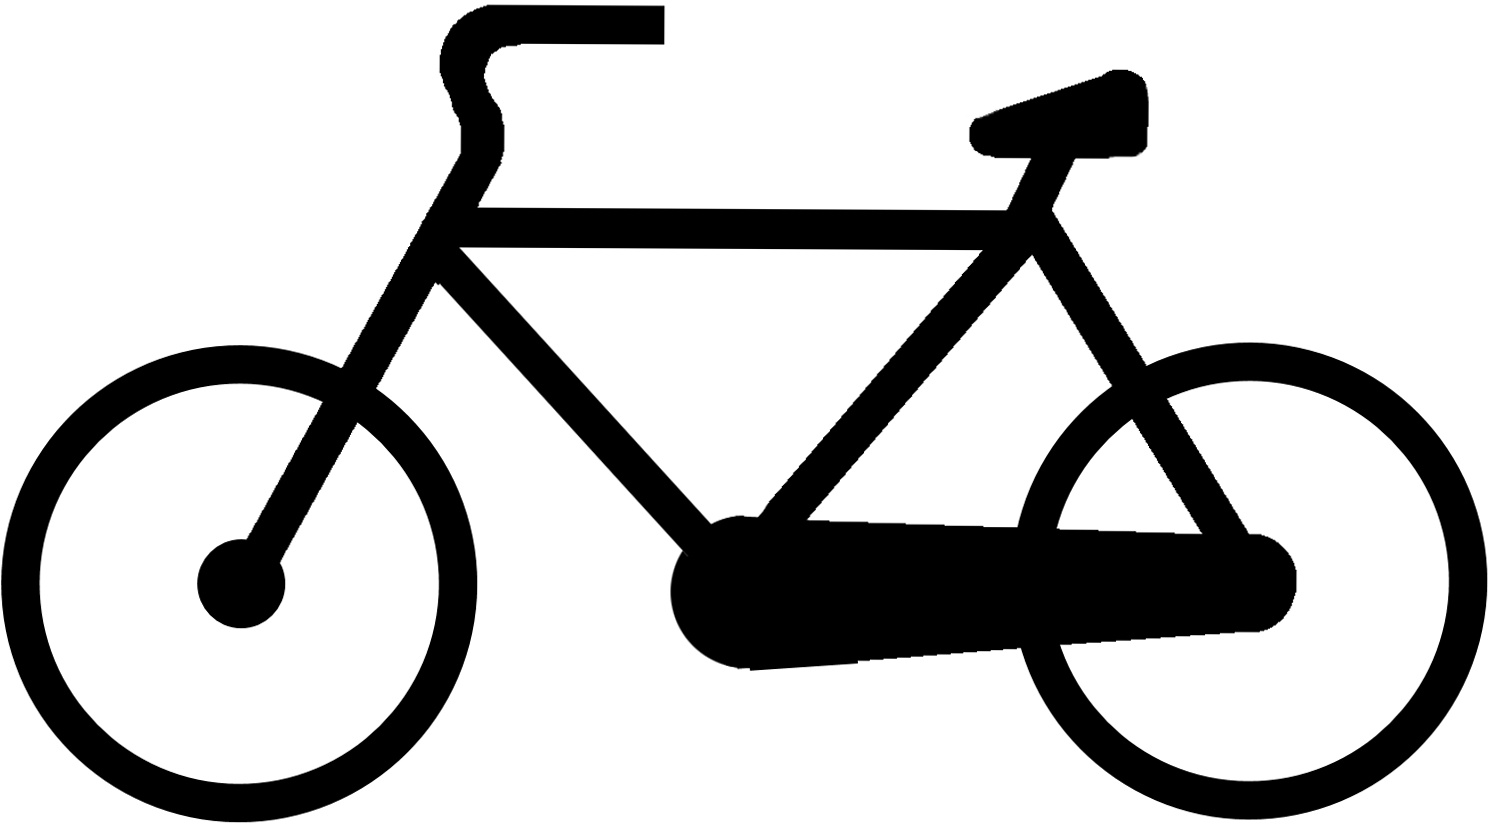

The simple addition of one word can change a situation completely:

$s_1$: *I enjoyed watching the stars* (⭐)

$s_2$: *I enjoyed watching the **TV** stars* (👩‍🎤)

## SemEval Workshop: Semantic Evaluation Challenges

[SemEval](https://semeval.github.io/) is a series of international workshops that proposes, every year, a number of NLP challenges. These challenges (or "shared tasks") target different tasks, all related to semantics. Teams participate by submitting their models, and optionally may write a paper describing their approach. The organizers of each task publish a paper describing the data used, and summarize the participating approaches and their results.

There have been multiple editions of STS tasks, each with a different dataset:
- [SemEval-2012 Task 6: A Pilot on Semantic Textual Similarity](https://aclanthology.org/S12-1051.pdf)
- [*SEM 2013 shared task: Semantic Textual Similarity](https://aclanthology.org/S13-1004.pdf)
- [SemEval-2014 Task 10: Multilingual Semantic Textual Similarity](https://aclanthology.org/S14-2010.pdf)
-[SemEval-2015 Task 2: Semantic Textual Similarity,
English, Spanish and Pilot on Interpretability](https://aclanthology.org/S15-2045.pdf)
- [SemEval-2015 Task 1: Paraphrase and Semantic Similarity in Twitter (PIT)](https://aclanthology.org/S15-2001.pdf)
- [SemEval-2016 Task 1: Semantic Textual Similarity,
Monolingual and Cross-Lingual Evaluation](https://aclanthology.org/S16-1081.pdf)
- [SemEval-2017 Task 1: Semantic Textual Similarity
Multilingual and Cross-lingual Focused Evaluation](https://aclanthology.org/S17-2001.pdf) 


For a summary of most of these tasks, including the datasets, you can visit [**this wiki**](http://ixa2.si.ehu.eus/stswiki/index.php/Main_Page).

For this project, you will work on solving this task using some of the datasets proposed in these SemEval challenges. You will use different kinds of features, and may find inspiration for your models in the papers above.


# Overview of the project

Both teams will implement at least 3 kinds of models to solve the standard English STS task:
### Common part: 
1. A traditional ML model relying on simple linguistic and textual features;
2. A traditional ML model relying on word representations;
3. A neural model (Siamese Bidirectional Long Short-Term Memory Network, BiLSTM) that computes sentence representations.

### Team-specific part:
One of the models above will be adapted for:\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4a. A multilingual STS task \
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4b. A cross-lingual STS task 


For (1), you will be asked to use some specific features and will be given hints on other (kinds of) features that you may want to try. You are also expected to check the bibliography to come up with potentially useful features.
For models of type (2) and (3), you will mostly be asked to complete portions of code. You are not expected to obtain outstanding results. The goal is rather for you to learn how to solve an NLP task using different approaches and to reflect on pre-processing as well as on the results obtained (do worry, though, if your correlations are all close to 0!)

**Places where you need to write code are marked with "## TO COMPLETE"**

# Let's start! Common part

In [1]:
import os
from collections import Counter
from nltk import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from string import punctuation
from nltk.corpus import stopwords
from nltk.corpus import wordnet
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import jaccard_score
from sklearn.feature_extraction.text import CountVectorizer
from scipy.stats import pearsonr
from scipy.spatial.distance import cosine, euclidean

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import jaccard_score
from sklearn.metrics.pairwise import cosine_similarity
import copy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import collections
import os
from collections import Counter
from nltk import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from string import punctuation
from nltk.corpus import stopwords
from nltk.corpus import wordnet
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
from scipy.spatial import distance 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import jaccard_score
from sklearn.metrics.pairwise import cosine_similarity
import copy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_



## STSBenchmark Dataset

For models 1, 2 and 3 we will use the STSBenchmark, which contains portions of the datasets used in different STS tasks between 2012 and 2017. You can download it using [this link](http://ixa2.si.ehu.es/stswiki/images/4/48/Stsbenchmark.tar.gz). The dataset comes with a pre-defined train/dev/test split.

You can find more details about this benchmark on [this wiki](http://ixa2.si.ehu.eus/stswiki/index.php/STSbenchmark).

Download the dataset, get acquainted with its format, upload it to Colab and load it using the function below.



In [2]:
! tar -xvzf Stsbenchmark.tar.gz

tar (child): Stsbenchmark.tar.gz: Cannot open: No such file or directory
tar (child): Error is not recoverable: exiting now
tar: Child returned status 2
tar: Error is not recoverable: exiting now


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
def load_data():
  data = dict()
  for fn in os.listdir("/content/drive/MyDrive/Colab Notebooks/stsbenchmark"):
    print(fn)
    if fn.endswith(".csv"):
      with open("/content/drive/MyDrive/Colab Notebooks/stsbenchmark/"+fn) as f:
        subset = fn[:-4].split("-")[1]
        #print(subset)
        data[subset] = dict()
        data[subset]['data'] = []
        data[subset]['scores'] = []
        for l in f:
          #genre filename year score sentence1 sentence2 (and sources, sometimes)          
          l = l.strip().split("\t")          
          data[subset]['data'].append((l[5],l[6]))
          data[subset]['scores'].append(float(l[4])) 
  return data

dataset = load_data()

### Having a look at the data...

print("Some examples from the dataset:")
for i in range(5):
  print("s1:", dataset['train']['data'][i][0])
  print("s2:", dataset['train']['data'][i][1])
  print("score:", dataset['train']['scores'][i], "\n")

print("\nNumber of sentence pairs by subset:")
for subset in dataset:
  print(subset, len(dataset[subset]['data']))

print("\nRange of scores in the training set:", min(dataset["train"]["scores"]), "-", max(dataset["train"]["scores"]))


correlation.pl
sts-dev.csv
sts-test.csv
sts-train.csv
readme.txt
LICENSE.txt
Some examples from the dataset:
s1: A plane is taking off.
s2: An air plane is taking off.
score: 5.0 

s1: A man is playing a large flute.
s2: A man is playing a flute.
score: 3.8 

s1: A man is spreading shreded cheese on a pizza.
s2: A man is spreading shredded cheese on an uncooked pizza.
score: 3.8 

s1: Three men are playing chess.
s2: Two men are playing chess.
score: 2.6 

s1: A man is playing the cello.
s2: A man seated is playing the cello.
score: 4.25 


Number of sentence pairs by subset:
dev 1500
test 1379
train 5749

Range of scores in the training set: 0.0 - 5.0


In [5]:
dataset['train']['data'][:10]

[('A plane is taking off.', 'An air plane is taking off.'),
 ('A man is playing a large flute.', 'A man is playing a flute.'),
 ('A man is spreading shreded cheese on a pizza.',
  'A man is spreading shredded cheese on an uncooked pizza.'),
 ('Three men are playing chess.', 'Two men are playing chess.'),
 ('A man is playing the cello.', 'A man seated is playing the cello.'),
 ('Some men are fighting.', 'Two men are fighting.'),
 ('A man is smoking.', 'A man is skating.'),
 ('The man is playing the piano.', 'The man is playing the guitar.'),
 ('A man is playing on a guitar and singing.',
  'A woman is playing an acoustic guitar and singing.'),
 ('A person is throwing a cat on to the ceiling.',
  'A person throws a cat on the ceiling.')]

## Word count baseline

The very first model you will use is fully implemented. It is a very simple baseline that you can compare to the other models you build. It consists of a Linear Regression model which uses a single feature based on word overlap.


In [6]:
### word overlap baseline
def baseline_features(data):
  x = []
  for s1, s2 in data:
    cv = CountVectorizer(binary=True) # binary=True because we use Jaccard score (we want presence/absence information, not counts)
    vectors = cv.fit_transform([s1,s2]).toarray()    
    x.append(jaccard_score(vectors[0], vectors[1]))
  return np.array(x).reshape(-1,1)


## Evaluation

We evaluate the model directly on the test set since we will want to compare its performance to that of the other models. As an evaluation metric, following common practice in this task, we will use Pearson's correlation.

You can reuse some of the code below for your next models (and you should use the same evaluation function).


In [7]:
## evaluation function: it returns Pearson's r
def evaluate(predictions, gold_standard):
  return pearsonr(predictions, gold_standard)[0] 


In [8]:
# Mapping the scores from the [0,5] to the [0,1] range for convenience
train_y = np.array(dataset['train']['scores']) / 5
dev_y = np.array(dataset['dev']['scores']) / 5
test_y = np.array(dataset['test']['scores']) / 5

In [9]:
train_baseline_x = baseline_features(dataset['train']['data'])
test_baseline_x = baseline_features(dataset['test']['data'])

# Having a look at the features and y
print(train_baseline_x[:10])
print(train_y[:10])
print("Checking the correlation of the word overlap feature with the gold standard scores on the training set:", pearsonr(train_baseline_x.squeeze(), train_y))

# Initializing the model
linreg = LinearRegression()
# Training
linreg.fit(train_baseline_x, train_y)
# Predicting
predictions = linreg.predict(test_baseline_x)
# Evaluating
print("Pearson's r obtained on the test set:", evaluate(predictions, test_y))


[[0.66666667]
 [0.8       ]
 [0.6       ]
 [0.66666667]
 [0.83333333]
 [0.6       ]
 [0.5       ]
 [0.66666667]
 [0.5       ]
 [0.55555556]]
[1.   0.76 0.76 0.52 0.85 0.85 0.1  0.32 0.44 1.  ]
Checking the correlation of the word overlap feature with the gold standard scores on the training set: (0.6116184058994178, 0.0)
Pearson's r obtained on the test set: 0.5997660486084755


In [ ]:
class PreProcessing(object):

    """
        language           = "english", "spanish", ...
        remove_stopwords   = True, False 
        remove_punct       = True, False
        pos_tagging        = True, False [to use only with lemmatization]
        lexical_processing =  '', 'lemmatization', 'stemming'
    """
    def __init__(self,
                 language           = "english",
                 remove_stopwords   = True, 
                 remove_punct       = True,
                 pos_tagging        = False,  
                 lexical_processing = '' 
                ) :

        self.language            = language
        self.remove_stopwords    = remove_stopwords
        self.remove_punct        = remove_punct
        self.pos_tagging         = pos_tagging
        self.lexical_processing  = lexical_processing
        self.lexical_processor   = self.init_lexical_proc()


    """
        lexical processor initialization
    """
    def init_lexical_proc(self):
        if self.lexical_processing == "lemmatization":
            return nltk.stem.WordNetLemmatizer()
        elif self.lexical_processing == "stemming":
            # nltk.stem.PorterStemmer()
            # nltk.stem.SnowballStemmer(language=self.language)
            return nltk.stem.LancasterStemmer() # Algo more recent than PorterStemmer


    """
        return WORDNET POS compliance to WORDENT lemmatization (a,n,r,v) 
    """
    def get_wordnet_pos(self,treebank_tag):
        if treebank_tag.startswith('J'):
            return wordnet.ADJ
        elif treebank_tag.startswith('V'):
            return wordnet.VERB
        elif treebank_tag.startswith('N'):
            return wordnet.NOUN
        elif treebank_tag.startswith('R'):
            return wordnet.ADV
        else:
            return wordnet.NOUN # As default pos in lemmatization is Noun


    """
        handle simple token and token with pos tagging
    """
    def lemmatize(self,token):
        if isinstance(token,tuple):
            tag = self.get_wordnet_pos(token[1])
            return self.lexical_processor.lemmatize(token[0], tag)
        else:
            return self.lexical_processor.lemmatize(token)


    """
       Preprocessing the sentence "string" 
       according to the options 
    """
    def __call__(self, string):
        tok = word_tokenize(string)
        if (self.remove_stopwords) :
            stop = stopwords.words(self.language)
            tok = [ t for t in tok if t not in stop] 
        if (self.remove_punct) :
            tok = [ t for t in tok if t not in punctuation]
        if (self.lexical_processing == "lemmatization") :
            if (self.pos_tagging) :
                tok = nltk.pos_tag(tok)
            tok = [ self.lemmatize(t) for t in tok ] 
        elif (self.lexical_processing == "stemming") :
            tok = [self.lexical_processor.stem(t) for t in tok]
        return tok


In [ ]:
pre_processor_lem = PreProcessing(pos_tagging=True, lexical_processing='lemmatization')
pre_processor_stem = PreProcessing(lexical_processing='stemming')
pre_processor      = PreProcessing()

# test 
string = "I am just testing this python-program !!!"
print(pre_processor_lem(string))
print(pre_processor_stem(string))

['I', 'test', 'python-program']
['i', 'test', 'python-program']


In [ ]:
class FeatureExtracting(object):

    """
        vectorizer = tf_idf, wordnet, ...
        sim_extractor = cosine_sim, ...
    """
    def __init__(self, vectorizer, sim_extractor='cosine'):
        self.vectorizer     = vectorizer
        self.sim_extractor = None
        self.X             = None
        self.init_sim_extractor(sim_extractor)
        self.vocab = None
        self.n_words = 0

    def init_sim_extractor(self, sim_extractor):
        def dist2sim(dist_calculator):
            def __dist2sim(v1, v2):
                return 1 - dist_calculator(v1, v2)
            return __dist2sim

        if sim_extractor == "cosine" : 
            self.sim_extractor = dist2sim(distance.cosine)
        if sim_extractor == "euclidian" : 
            self.sim_extractor = dist2sim(distance.euclidian)
        elif sim_extractor == "jaccard" : 
            self.sim_extractor = jaccard_score

    def get_wordnet_pos(self,treebank_tag):
        if treebank_tag.startswith('J'):
            return wordnet.ADJ
        elif treebank_tag.startswith('V'):
            return wordnet.VERB
        elif treebank_tag.startswith('N'):
            return wordnet.NOUN
        elif treebank_tag.startswith('R'):
            return wordnet.ADV
        else:
            return wordnet.NOUN # As default pos in lemmatization is Nou 

    def tf_idf(self, data):
        X = []
        for s1, s2 in data:
            tfidf_v = TfidfVectorizer(tokenizer=lambda text: text, preprocessor=lambda text: text)
            vectors = tfidf_v.fit_transform([s1,s2]).toarray()    
            similarity = self.sim_extractor(vectors[0], vectors[1])
            X.append(similarity)
            self.X = np.array(X).reshape(-1,1)
        return self.X

    def wordnet(self,data):
        X = []
        for s1, s2 in data:
            sim_s1_s2 = []
            sim_s2_s1 = []

            s1_tagged = [ (word,self.get_wordnet_pos(tag)) for (word,tag)  in nltk.pos_tag(s1) ]
            s2_tagged = [ (word,self.get_wordnet_pos(tag)) for (word,tag)  in nltk.pos_tag(s2) ]

            _s1_synsets = [ wordnet.synsets(word, tag) for (word, tag) in s1_tagged ]
            _s2_synsets = [ wordnet.synsets(word, tag) for (word, tag) in s2_tagged ]

            s1_synsets = [ _s[0] for _s in _s1_synsets if _s is not None and len(_s)>1 ]
            s2_synsets = [ _s[0] for _s in _s2_synsets if _s is not None and len(_s)>1 ]

            for synset_1 in s1_synsets:
                try: 
                    sim_s1_s2.append(np.mean([ synset_1.wup_similarity(synset_2) 
                                        if synset_1.wup_similarity(synset_2) is not None
                                        else 0
                                        for synset_2 in s2_synsets ]))
                except ValueError:
                    sim_s1_s2.append(0)
            for synset_2 in s2_synsets:
                try:
                    sim_s2_s1.append(np.mean([ synset_2.wup_similarity(synset_1) 
                                        if synset_2.wup_similarity(synset_1) is not None
                                        else 0
                                        for synset_1 in s1_synsets ]))
                except ValueError:
                    sim_s2_s1.append(0)

            sim_s = list(map(lambda _s1, _s2: (_s1+_s2)/2, sim_s1_s2, sim_s2_s1 ))
            X.append(np.array(sim_s).mean())
            self.X = np.array(X).reshape(-1,1)
        return self.X

    def overlap_n_n(self, n_gram_min, n_gram_max, data):
        X = []
        for s1, s2 in data:
            overlap_v = CountVectorizer(ngram_range=(n_gram_min, n_gram_max),
                                        tokenizer=lambda text: text, 
                                        preprocessor=lambda text: text)
            vectors = overlap_v.fit_transform([s1,s2]).toarray()    
            similarity = self.sim_extractor(vectors[0], vectors[1])
            X.append(similarity)
            self.X = np.array(X).reshape(-1,1)
        return self.X

    def overlap_tag_n_n(self, n_gram_min, n_gram_max, data):
        X = []
        # print(data)
        for s1, s2 in data:
            s1_tagged = [x2 for x1, x2 in nltk.pos_tag(s1)] # On remplace s1 par les TAG des ses tokens
            s2_tagged = [x2 for x1, x2 in nltk.pos_tag(s2)] # idem pour s2
            X.append((s1_tagged, s2_tagged))
        # print(X)
        return self.overlap_n_n(n_gram_min, n_gram_max, X)



    def build_vocab(self, data):
        """"data is already preprocessed"""
        flat_list = [item for sublist in [(s1 + s2)  for s1, s2 in data] for item in sublist]
        self.vocab = dict(collections.Counter(flat_list))
        self.n_words = len(flat_list)

    def ic(self, w):
        if w in self.vocab:
            return np.log2(self.n_words / self.vocab[w])
        else:
            raise KeyError("Le mot recherché n'est pas dans le vocabulaire")

    def wwc(self, s1, s2):
        num = 0
        den = 0
        for w1 in s1:
            if w1 in s2 :
                num += self.ic(w1)
            den += self.ic(w1)
        return num / den

    def wwo(self, data):
        X = []
        for s1, s2 in data :
            X.append(2 / (1 / self.wwc(s1, s2) + 1 / self.wwc(s2, s1))) 
        return X


    # for overlap vectorization the keyword must be overlap_n_n
    # where n is {1,2,3,...} ( overlap_1_2, overlap_2_4,...)
    def extract(self, data):
        if self.vectorizer == "tf_idf" :
            return self.tf_idf(data)
        elif self.vectorizer == "wordnet":
            print("3")
            return self.wordnet(data)
        elif self.vectorizer.startswith("overlap_tag_"):
            splited    = self.vectorizer.split("_")
            n_gram_min = int(splited[-2])
            n_gram_max = int(splited[-1])
            return self.overlap_tag_n_n(n_gram_min, n_gram_max, data)
        elif self.vectorizer.startswith("overlap_"):
            splited    = self.vectorizer.split("_")
            n_gram_min = int(splited[-2])
            n_gram_max = int(splited[-1])
            return self.overlap_n_n(n_gram_min, n_gram_max, data)
        elif self.vectorizer == "wwo":
            self.build_vocab(data)
            return self.wwo(data)

In [ ]:
data = dataset['train']['data']
preprocessor = PreProcessing(language='english',
                 remove_stopwords   = False, 
                 remove_punct       = True,
                 pos_tagging        = False,  
                 lexical_processing = '') 
data_preprocessed = [(preprocessor(s1), preprocessor(s2)) for s1, s2 in dataset['train']['data']]

In [ ]:
f_w = FeatureExtracting('wwo')
res = f_w.extract(data_preprocessed)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:135: RuntimeWarning: divide by zero encountered in double_scalars


5749

Ci-dessous : fonction de distance utilisant le principe de Named Entity Recognition. 2 phrases ne possédant pas les mêmes entités nommées ne sont probablement pas identiques.
Possibilité de raffiner en choisissant seulement des types d'entités souhaitées

In [ ]:
### Intégrer ce code
### Difficulté : a besoin d'arriver avant le preprocessing

import spacy
from spacy import displacy


def jaccard_set(list1, list2):
    """Define Jaccard Similarity function for two sets"""
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(list1) + len(list2)) - intersection
    return (float(intersection) + 1) / (union +1)

def dist_ner(s1, s2):
    NER = spacy.load("en_core_web_sm") # A placer en dehors de la fonction idéalement
    ner_s1 = [(X.text, X.label_) for X in NER(s1).ents]
    ner_s2 = [(X.text, X.label_) for X in NER(s2).ents]
    return (1 / jaccard_set(ner_s1, ner_s2)) - 1, ner_s1, ner_s2

In [ ]:
s1, s2 = 'A plane is taking off.', 'An air plane is taking off.'
dist_ner(s1, s2)

(0.0, [], [])

In [ ]:
s1, s2 = 'Tomorrow will be a good day.', 'Today was a good day.'
dist_ner(s1, s2)

(1.0,
 [('Tomorrow', 'DATE'), ('a good day', 'DATE')],
 [('Today', 'DATE'), ('a good day', 'DATE')])

In [ ]:
s1, s2 = 'Tomorrow will be a good evening.', 'Today was a good day.'
dist_ner(s1, s2)

(4.0,
 [('Tomorrow', 'DATE'), ('a good evening', 'TIME')],
 [('Today', 'DATE'), ('a good day', 'DATE')])

In [ ]:
s1, s2 = "On Saturday, a 149mph serve against Agassi equalled Rusedski's world record.", "On Sunday, a 149mph serve against Agassi equalled Rusedski's world record in India."
dist_ner(s1, s2)

(0.75,
 [('Saturday', 'DATE'),
  ('149mph', 'QUANTITY'),
  ('Agassi', 'PERSON'),
  ('Rusedski', 'PERSON')],
 [('Sunday', 'DATE'),
  ('149mph', 'QUANTITY'),
  ('Agassi', 'PERSON'),
  ('Rusedski', 'PERSON'),
  ('India', 'GPE')])

Ci- dessous : utilisation d'une API construite pour récupérer les comptes de mots sur google ngram viewer - Weighted Word Overlap feature

In [ ]:
# !pip install google-ngram-downloader
# from google_ngram_downloader import readline_google_store
# from google_ngram_downloader import ngram_to_cooc
# readline_google_store?


In [ ]:
word = 'cat'
# iterator = readline_google_store(ngram_len = 1, lang='eng', indices=None, chunk_size=1048576, verbose=False)
# fname, url, records = next(iterator)

found = False
for _, _, records in readline_google_store(ngram_len = 1, lang='eng', indices=None, chunk_size=1048576, verbose=False):
    if found:
            break
    for element in records:
        if found:
            break
        if (element.ngram in vocab) & (element.year == 2008):
            print(element)
            found = True

Record(ngram='0.2', year=2008, match_count=148908, volume_count=18664)


In [ ]:
vocab = []
for s1, s2 in data_preprocessed:
    vocab.extend(s1)
    vocab.extend(s2)
vocab = set(vocab)

In [ ]:
'0.2' in vocab 

True

In [ ]:
data_preprocessed = [(preprocessor(s1), preprocessor(s2)) for s1, s2 in dataset['train']['data']]

In [ ]:
[(s1, s2) for s1,s2 in dataset['train']['data'] if '0.2' in s1]

[('The Dow Jones industrial average <.DJI> added 28 points, or 0.27 percent, at 10,557, hitting its highest level in 21 months.',
  'The Dow Jones industrial average <.DJI> rose 49 points, or 0.47 percent, to 10,578.'),
 ("The broader Standard & Poor's 500 Index .SPX advanced 2 points, or 0.24 percent, to 977.",
  'The Nasdaq Composite Index .IXIC was off 6.52 points, or 0.39 percent, at 1,645.66.'),
 ('The tech-heavy Nasdaq composite index fell 3.99, or 0.2 percent, to 1,682.72, following a two-day win of 55.93.',
  'The technology-laced Nasdaq Composite Index .IXIC eased 8.52 points, or 0.51 percent, to 1,670.21.'),
 ('The technology-laced Nasdaq Composite Index <.IXIC> tacked on 5.91 points, or 0.29 percent, to 2,053.27.',
  'The technology-focused Nasdaq Composite Index <.IXIC> advanced 6 points, or 0.30 percent, to 2,053, erasing earlier losses.'),
 ('Of 24 million phoned-in votes, 50.28 percent were for Studdard, putting him 130,000 votes ahead of Aiken.',
  'Of the 24 million ph

## Your turn 



## 1. A model using simple linguistic and textual features

Now it's your turn to develop a simple model for the STS task. The model should rely on simple features but without using distributional or distributed representations (for which we will have a dedicated model in (2)). You should:
* 1.1 **Preprocess** the sentences as you deem appropriate:\
[Tokenize](https://www.nltk.org/api/nltk.tokenize.html), lower-case, [remove stopwords](https://scikit-learn.org/stable/modules/feature_extraction.html#using-stop-words)\*... you could also try with [stemming](https://www.nltk.org/howto/stem.html) or [lemmatization](https://www.geeksforgeeks.org/python-lemmatization-with-nltk/), [pos-tagging](https://www.nltk.org/book/ch05.html) or [removing punctuation](https://www.geeksforgeeks.org/string-punctuation-in-python/), for example.
* 1.2 Come up with different kinds of **features**. \
This is the most important part. See below for more details.
* 1.3 Choose **at least a couple of different models** from sklearn (for example, LinearRegression or RandomForestRegression)
* 1.4 **Train** different feature and model combinations on the training set.
* 1.5 **Evaluate** them all on the **development set**.
* 1.6 **Evaluate** the best conifiguration (i.e. the one which obtained the best result on the development set) on the **test set**.

\* Not all stopwords lists are the same and you might want to adapt yours depending on the application. However, for the sake of simplicity, you can just use the stopwords list provided in NLTK [like shown here](https://awhan.wordpress.com/2016/06/05/scikit-learn-nlp-list-english-stopwords/).

### About the features
**You should implement at least 6 different features**, of which **there must be, at least**:
- One **WordNet**-based feature (for example, does $s_2$ contain synonyms or hypernyms of words in $s_1$? how many of them?) You can use [nltk's wordnet interface](https://www.nltk.org/howto/wordnet.html).
- One **TF-IDF** based feature. You can fit a [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html?highlight=tfidf#sklearn.feature_extraction.text.TfidfVectorizer) on the whole training set, treating a sentence as a document. Then you can calculate the similarity (cosine, euclidean...) between the representations of $s_1$ and $s_2$.
- One more complex **overlap** feature (based on n-gram overlap, $n>1$). You can use the *ngram_range* parameter of [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Your model can, *additionally*, include the word overlap feature used by the baseline model, leaving it as is or modifying it (for example trying cosine similarity).

More ideas: consider exploiting [the PPDB resource](https://aclanthology.org/S12-1060.pdf), using the overlap of [syntactic roles](https://spacy.io/usage/linguistic-features) or pos-tags, [word alignment](https://aclanthology.org/Q14-1018.pdf) features (for example with [this tool](https://github.com/ma-sultan/monolingual-word-aligner), or something simpler), a Machine Translation evaluation metric (like [BLUE](https://machinelearningmastery.com/calculate-bleu-score-for-text-python/)), the edit distance...

IMPORTANT: You should check the SemEval reports listed at the beginning (for example [this one](https://aclanthology.org/S12-1060.pdf)) or model descriptions (like [this one](https://aclanthology.org/S17-2028.pdf)) to see what features other models have relied on in the past and/or how they were implemented. 

NOTE: Empty functions are just there for your orientation, feel free to organize the code as it suits you, adding as many functions as needed.


In [ ]:
#### Preprocess all the data

def preprocess_dataset(dataset):
  ## TO COMPLETE
  return preprocessed_dataset

#### Extract features
def extract_features(preprocessed_dataset):
  '''Similarly to baseline_features, this function could return an array with all features, or a DataFrame'''
  ## TO COMPLETE
  return features

In [ ]:
##### Build and train different models. You can do a little feature ablation (i.e. removing one feature at a time)
##### to see the usefulness of the different features.

## TO COMPLETE

##### Evaluate the models on the dev set. You can use the evaluate() function above.

## TO COMPLETE

In [ ]:
#### Evaluate the best model on the test set. 

## TO COMPLETE

#### A bit of reflection

In the report, you can write:
- Why did you preprocess the data in this way? If you tried multiple preprocessing variants, which one worked best and why do you think that is the case?
- Why did you choose these features? Did you find them somewhere?
- What were the most useful features in the end? Why do you think this is the case?

## 2. A model relying on distributional and distributed word representations

The second model that you'll build will rely on a different kind of features, obtained from word vector representations. You have to:
- 2.1 **Preprocess** the text. Be careful, you might want to follow a different strategy this time (would stemming be a good idea?)
- 2.2 **Build/download word representations** (more on this below)
- 2.3 **Aggregate** the representations of words in a sentence (for example, by taking their average, or the sum) to obtain a sentence representation. 
- 2.4 Try **two kinds of features** in a simple ML model: \
&nbsp;&nbsp;&nbsp;&nbsp;- (a) the concatenation of the sentence representations themselves;\
&nbsp;&nbsp;&nbsp;&nbsp;- (b) different similarity/distance measures (cosine, euclidean...)
- 2.5 As done before, **train** the models on the training set, **evaluate** them on the development set, and finally **evaluate** the best model on the test set.

### About the word representations
You **must use two kinds** of word representations: distributional and distributed.
All word representations that we will use are obtained based on the distributional hypothesis (Harris, 1954): the idea that semantically similar words tend to occur in the same (or similar) contexts. Or, as Firth (1959) put it, "*you shall know a word by the company it keeps*".

#### **Distributional representations**


We will build distributional representations for words by collecting co-occurrence counts from the sentences. First, we need to create a **vocabulary** $V$, which is basically a list of words seen in the training set for which we want to build a vector representation.
Let $|V|$ be the size of our vocabulary. We will create a matrix $M$ of size $|V| \times |V|$. $M_{ij}$ will contain the number of times word $i$ *co-occurred* with word $j$. The definition of *co-occurrence* is flexible. In this exercise we will define it as *appearing in the same sentence*. 
Most of the code to obtain them is already there.

Once we have obtained the co-occurrence counts, we can still modify the matrix in order to make the most of them. One way of doing so is calculating the Pointwise Mutual Information (PMI), which quantifies the interdependence between two variables (= two words), or how expected the co-occurrence of two words is.

$$
\text{PMI}(x,y) = \log \left( \frac{P(x,y)}{P(x)P(y)} \right)
$$

$P(x,y)$ is the number of times words $x$ and $y$ have co-occurred. $P(x)$ is the probability of word $x$ (= all co-occurrences where $x$ appears).

#### **Distributed representations**
We will use out-of-the-box word embeddings. These are dense word representations that have been trained on large amounts of text using a neural model with a language-model-like objective. Concretely, for this exercise we will use pre-trained [word2vec](https://towardsdatascience.com/word2vec-explained-49c52b4ccb71) word embeddings.
<br/><br/>

An important part of the code is provided so you'll mainly have to take care of aggregating the word embeddings of the words in a sentence.
There are different libraries to use word embeddings. For this experiment we will be using [magnitude](https://github.com/plasticityai/magnitude) because of its high speed and because its ability of inducing vectors for unknown words.
You can download the word embeddings we'll use [here](http://magnitude.plasticity.ai/word2vec/medium/GoogleNews-vectors-negative300.magnitude). Uploading them to Google Drive will make uploading them to Colab faster.

### Distributional representations: experiments

In [10]:
#### Building distributional representations
sws = stopwords.words('english')
sws = set(list(sws) + [p for p in punctuation])

def put_sentences_together(dataset):
  all_sentences = []
  for s1, s2 in dataset["train"]["data"]:
    all_sentences.extend([s1, s2])
  return all_sentences

def create_vocabulary(dataset, count_threshold=1, voc_threshold=None, stopwords=set(), lowercase=False):
    """    
    Function using word counts to build a vocabulary 
    Params:
        corpus (list of list of strings): corpus of sentences
        count_threshold (int): minimum number of occurences necessary for a word to be included in the vocabulary
        voc_threshold (int): maximum size of the vocabulary 
        stopwords: a set of words which are excluded from the vocabulary
        lowercase: bool. If True, all words are lowercased (which results in a smaller, more compact vocabulary)
    IMPORTANT: the vocabulary includes "UNK", which is a placeholder for an unknown word and it will later be assigned a zero vector.
    Returns:
        vocabulary (dictionary): keys: list of distinct words across the corpus
                                 values: indexes corresponding to each word sorted by frequency        
    """    
    corpus = put_sentences_together(dataset)
    word_counts = {}
    for sent in corpus:
        for word in word_tokenize(sent):
            if lowercase:
              word = word.lower()          
            if word not in word_counts:
                word_counts[word] = 0
            word_counts[word] += 1

    # Create a dictionary called <filtered_word_counts> (with words as keys and their frequencies as values).
    # Include only those words that appear more than <count_threshold> times,
    # and which are not in the set of stopwords.
    ## TO COMPLETE
    filtered_word_counts = {word: count for word, count in word_counts.items() if (count>=count_threshold)}
  
    # Create a list called <words> sorting the words from highest to lowest frequency
    ## TO COMPLETE
    #filtered_word_counts = dict(sorted(filtered_word_counts.items(), key=lambda item: item[1], reverse=True)) # tri par valeurs decroissantes
    #words = [w for w in filtered_word_counts.keys()]
    #words = sorted(filtered_word_counts.keys(), key=word_counts.get, reverse=True) + ['UNK']
    words = sorted(filtered_word_counts.keys(), key=filtered_word_counts.get, reverse=True) + ['UNK'] # tri par nb d'occ decroissant

    if voc_threshold is not None:
        words = words[:voc_threshold] 
        if ('UNK' not in words) : 
          words = words + ['UNK']
    vocabulary = {words[i] : i for i in range(len(words))}
    return vocabulary, {word: filtered_word_counts.get(word, 0) for word in vocabulary}

def co_occurence_matrix(dataset, vocab, lowercase=False, stemming=False, lemmatization=False):
    """
    Params:
        dataset: output of load_data()
        vocab: first output of create_vocabulary(). These are the words that will be included in the matrix        
    Returns:
        matrix (array of size (len(vocab), len(vocab))): the co-occurrence matrix, using the same ordering as the vocabulary given in input
    """ 
    l = len(vocab)
    all_sentences = put_sentences_together(dataset)
    M = np.zeros((l,l))
    for sent in all_sentences:
        # Preprocessing
        if (lowercase) : 
          sent = sent.lower()

        if (lemmatization):
          lemmatizer = WordNetLemmatizer() # sortir cette instruction de la boucle for
          sent = " ".join([lemmatizer.lemmatize(m) for m in word_tokenize(sent)])

        elif (stemming):
          stemm = LancasterStemmer()
          sent = " ".join([stemm.stem(m) for m in word_tokenize(sent)])

        sent = word_tokenize(sent)
        sent_idcs = [vocab.get(word, len(vocab)-1) for word in sent]
        for i, idx in enumerate(sent_idcs):            
            for j, ctx_idx in enumerate(sent_idcs[i+1:]):
              M[idx][ctx_idx] +=1
              M[ctx_idx][idx] +=1
    return M  


In [11]:
# Build vocabulary
## TO COMPLETE
vocab = create_vocabulary(dataset, count_threshold=2, voc_threshold=None, stopwords=set(), lowercase=True)

# Build co-occurrence matrix
M = co_occurence_matrix(dataset, vocab[0], lowercase=True)

In [12]:
# Exemples de phrases similaires / disimilaires dans le dataset
subsize = 100
np.array(dataset['train']['data'][:subsize])[np.array(dataset["train"]["scores"][:subsize]) <= 0.6]

array([['A man is smoking.', 'A man is skating.'],
       ['A woman is writing.', 'A woman is swimming.'],
       ['A man is dancing.', 'A man is talking.'],
       ['A man is fishing.', 'A man is exercising.'],
       ['Two boys are driving.', 'Two bays are dancing.']], dtype='<U56')

In [13]:
M

array([[8.800e+01, 6.568e+03, 4.644e+03, ..., 0.000e+00, 0.000e+00,
        3.055e+03],
       [6.568e+03, 5.652e+03, 2.172e+03, ..., 0.000e+00, 0.000e+00,
        1.891e+03],
       [4.644e+03, 2.172e+03, 3.708e+03, ..., 0.000e+00, 1.000e+00,
        2.845e+03],
       ...,
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        2.000e+00],
       [3.055e+03, 1.891e+03, 2.845e+03, ..., 0.000e+00, 2.000e+00,
        3.116e+03]])

In [14]:
#(~M.any(axis=0)).any() 
#np.where(~M.any(axis=0))[0] # colonne nulle
#(~M.any(axis=1)).any() 
#np.where(~M.any(axis=1))[0] # ligne nulle 
#print(list(vocab[0].keys())[list(vocab[0].values()).index(14407)])  # UNK

In [15]:
# A function that converts the matrix values to PMI
def pmi(M, positive=True):
    sum_vec = M.sum(axis=0)
    sum_tot = sum_vec.sum()
    with np.errstate(divide='ignore'):
        pmi = np.log((M * sum_tot) / (np.outer(sum_vec, sum_vec)))   #print((np.outer(sum_vec, sum_vec) == 0).any()) #division par 0 par endroits       
    pmi[np.isinf(pmi)] = 0.0  # log(0) = 0
    # A voir : 
    #pmi[np.isnan(pmi)] = 0.0  # divisions par 0 --> valeur nan
    if positive:
        pmi[pmi < 0] = 0.0
    return pmi

# To apply the transformation:
PMI_M = pmi(M)


In [16]:
PMI_M

array([[0.        , 0.59886282, 0.14676802, ..., 0.        , 0.        ,
        0.        ],
       [0.59886282, 0.65425595, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.14676802, 0.        , 0.02181614, ..., 0.        , 0.25043992,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.25043992, ..., 0.        , 0.        ,
        1.16768406],
       [0.        , 0.        , 0.        , ..., 0.        , 1.16768406,
        0.29606753]])

Here's the part where you get to combine the vectors of the words making up a sentence into a sentence representation. You can complete and modify the function `assign_distributional_vectors` to your convenience, trying different things:
- Choose **what words to include** and which not to include. You can use a postag filter* to, for example, include only words that are richer in content (nouns, verbs and adjectives)
- Choose **an operation** to combine the word representations. In doing that, take into account that words that are not in the vocabulary should be assigned the id of the 'UNK' token, which corresponds to a zero vector. Alternatively you can leave out all unknown words.
- Try using the **concatenation** of the representations of $s_1$ and $s_2$ as features, and one or multiple **similarity/distance metrics** as **features**.

\* For postagging I recommend using the universal tagset for its simplicity. Below I included the code to load the postagger. Check out the tag list at 2.3 [here](https://www.nltk.org/book/ch05.html).



In [17]:
from traitlets.traitlets import ForwardDeclaredInstance
# Loading the postagger
nltk.download('universal_tagset')
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')

def euclidean_dist(s1, s2) : 
  return np.linalg.norm(s1 - s2)

def assign_distributional_vectors(data, M, vocab, sim_or_dist=True, postag=False, lowercase=False, agg=lambda x: np.sum(x, axis=0), lemmatization=False, stemming=False, distance_measure=lambda x,y: euclidean_dist(x,y)):
#def assign_distributional_vectors(data, M, vocab, sim_or_dist=True, postag=False, lowercase=False, agg=lambda x: np.sum(x, axis=0)):
  '''This functions assigns each sentence a vector and optionally calculates the similarity/distance 
  between the representations of s1 and s2.
  Parameters
    data: list of tuples (like dataset['train']['data'])
    M: a matrix of distributional representations for all words in the vocabulary
    vocab: first output of create_vocabulary(). These are the words that will be included in the matrix        
    sim_or_dist: bool. If True, we will use a similarity or distance as the only feature. If False,
    we will use the concatenation of the representations of s1 and s2.
    postag: whether we want to apply a postag-based filter to obtain sentence representations
    lowercase: bool. If True, words are lowercased. You should set it to True if the vocabulary is lowercased.
  Returns:
    features: an array with the data transformed into features '''

  if sim_or_dist:
    features = np.zeros((len(data), 1))
  else:
    features = np.zeros((len(data), M.shape[1]*2))

  PMI_M = pmi(M, positive=True) #representation vectorielle des mots du vocabulaire

  for i, (s1, s2) in enumerate(data):
    # Tokenize, lowercase if lowercase=True, and if postag=True, postag s1 and s2    
    ## TO COMPLETE

    # Preprocessing
    if (lowercase) :
      s1, s2 = s1.lower(), s2.lower()
    
    if (lemmatization):
      lemmatizer = WordNetLemmatizer() # sortir cette instruction de la boucle for
      s1 = " ".join([lemmatizer.lemmatize(m) for m in word_tokenize(s1)])
      s2 = " ".join([lemmatizer.lemmatize(m) for m in word_tokenize(s2)])
    
    elif (stemming):
      stemm = LancasterStemmer()
      s1 = " ".join([stemm.stem(m) for m in word_tokenize(s1)])
      s2 = " ".join([stemm.stem(m) for m in word_tokenize(s2)])

    s1_tok, s2_tok = word_tokenize(s1), word_tokenize(s2)
    
    # Now create two lists, one for each sentence, with the word representations that you want to use
    # You can go through the words (or word, pos) in each sentence and decide whether you keep their representation or not
    ## TO COMPLETE
    #PMI_M = pmi(M, positive=True) #representation vectorielle des mots du vocabulaire

    s1vecs, s2vecs = [], []
    if (postag) :
      keep_pos = ['NN', 'VBP', 'VBZ', 'VBG', 'VB', 'JJ'] #nouns, verbs and adjectives
      s1_pos, s2_pos = pos_tag(s1_tok), pos_tag(s2_tok)
      for (w, pos) in s1_pos :
        if (pos in keep_pos) :
          s1vecs.append(PMI_M[vocab.get(w, vocab['UNK'])]) # on ajoute la representation vectorielle du mot si dispo, sinon vect 0
      for (w, pos) in s2_pos : 
        if (pos in keep_pos) : 
          s2vecs.append(PMI_M[vocab.get(w, vocab['UNK'])])
    else : 
      for w in s1_tok :
        s1vecs.append(PMI_M[vocab.get(w, vocab['UNK'])])
      for w in s2_tok :
        s2vecs.append(PMI_M[vocab.get(w, vocab['UNK'])])

    # It is possible that some sentences will not have any word representation available.
    # We assign them a 0-vector in this case (be careful, because this could result in a cosine of NaN)
    if not s1vecs:
      s1vecs = [np.zeros(M.shape[1])]  # or PMI_M[vocab['UNK']]
    if not s2vecs:
      s2vecs = [np.zeros(M.shape[1])]    
    
    # Aggregate the representations of words in a sentence, for example by averaging them
    ## TO COMPLETE 
    #print(s1vecs)
    s1vec = agg(s1vecs) #s1vecs.mean(axis=0)
    s2vec = agg(s2vecs) #s2vecs.mean(axis=0)

    # Fill in features[i] with the desired feature (one or more similarity/distance measures if sim=True, 
    # a concatenation of the representations otherwise)
    ## TO COMPLETE
    if (sim_or_dist) :
      features[i] = distance_measure(s1vec, s2vec)
      #features[i] = np.linalg.norm(s1vec - s2vec), features[i] = cosine(s1vec, s2vec)
    else : 
      features[i] = np.concatenate((s1vec,s2vec))
   
  return features


[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [18]:
vec_house = PMI_M[vocab[0].get('house', vocab[0]['UNK'])]
vec_habitation = PMI_M[vocab[0].get('habitation', vocab[0]['UNK'])]
vec_dog = PMI_M[vocab[0].get('dog', vocab[0]['UNK'])]
vec_cat = PMI_M[vocab[0].get('cat', vocab[0]['UNK'])]
vec_butterfly = PMI_M[vocab[0].get('butterfly', vocab[0]['UNK'])]

In [19]:
np.linalg.norm(vec_house - vec_dog), np.linalg.norm(vec_house - vec_cat), np.linalg.norm(vec_dog - vec_cat) #, np.linalg.norm(vec_home - vec_habitation), np.linalg.norm(vec_house - vec_butterfly), np.linalg.norm(vec_cat - vec_butterfly)

(64.24002963863944, 62.490031643369946, 51.549568971922085)

In [20]:
#assign_distributional_vectors(dataset['train']['data'][:3], M, vocab[0], sim_or_dist=True, postag=True, lowercase=True, agg=lambda x: np.mean(x, axis=0))
#dataset['train']['scores'][:3]

In [21]:
# Obtain train_x, dev_x, test_x
# Try different combinations (using M, PMI_M, different aggregation functions, with and without postag filtering...)
## TO COMPLETE
from nltk.stem import WordNetLemmatizer, LancasterStemmer
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

train_y = np.array(dataset['train']['scores']) / 5
dev_y = np.array(dataset['dev']['scores']) / 5
test_y = np.array(dataset['test']['scores']) / 5

def evaluate_model(dataset=dataset, count_threshold=2, voc_threshold=None, stopwords=set(), postag=False, \
                   lemmatization=False, stemming=False, size=-1, sim_or_dist=False, lowercase=False, PMI=False, \
                   agg=lambda x: np.mean(x, axis=0), regression="linear", distance_measure=lambda x,y: euclidean_dist(x,y)):
    """regression : "linear" or "rf" (random forest)""" 
    
    # Create vocab
    print("Creating vocab and co-occ matrix")
    vocab = create_vocabulary(dataset, count_threshold=count_threshold, voc_threshold=voc_threshold, stopwords=set(), lowercase=lowercase)
    
    # Build co-occurrence matrix # dataset['train']['data'][:size]
    M = co_occurence_matrix(dataset, vocab[0], lowercase=lowercase, lemmatization=lemmatization, stemming=stemming)

    # Train, Dev, Test
    print("Assigning vectors")
    train_x = assign_distributional_vectors(dataset['train']['data'][:size], M, vocab[0], sim_or_dist=sim_or_dist, postag=postag, lowercase=lowercase, agg=agg, lemmatization=lemmatization, stemming=stemming, distance_measure=distance_measure)
    dev_x = assign_distributional_vectors(dataset['dev']['data'][:size], M, vocab[0], sim_or_dist=sim_or_dist, postag=postag, lowercase=lowercase, agg=agg, lemmatization=lemmatization, stemming=stemming, distance_measure=distance_measure)
    test_x = assign_distributional_vectors(dataset['test']['data'][:size], M, vocab[0], sim_or_dist=sim_or_dist, postag=postag, lowercase=lowercase, agg=agg, lemmatization=lemmatization, stemming=stemming, distance_measure=distance_measure)
    print("Normalizing scores")
    train_y = np.array(dataset['train']['scores'][:size]) / 5
    dev_y = np.array(dataset['dev']['scores'][:size]) / 5
    test_y = np.array(dataset['test']['scores'][:size]) / 5

    # Initializing the model
    if (regression == "linear"):
      linreg = LinearRegression()
      print("train_x[:size] ", train_x[:size])
      print("isnan(ar)", np.isnan(train_x[:size]).any())

      linreg.fit(train_x[:size], train_y[:size])
      predictions = linreg.predict(dev_x[:size])
      print("Coeff regression lineaire : ", linreg.coef_, " - intercept : ", linreg.intercept_)

    else : # regression =="rf"
      regr = RandomForestRegressor(max_depth=2, random_state=0)
      regr.fit(train_x[:size], train_y[:size])
      predictions = dev_x[:size]

    # Evaluating
    print("Evaluating regression model")
    pears = evaluate(predictions[:size], dev_y[:size])
    print("Pearson's r obtained on the dev set:", pears)
    return train_x, dev_x, test_x, pears


In [22]:
resultats = []

### Features = vecteurs de phrases
# Basic : no stop words, no pos, no lemmat, no stemm, no dist, no lowercase, no pmi, reg lineaire
res = evaluate_model(dataset=dataset, count_threshold=2, voc_threshold=None, stopwords=set(), postag=False, lemmatization=False, stemming=False, size=30, sim_or_dist=False, lowercase=False, PMI=False, agg=lambda x: np.mean(x, axis=0), regression="linear")
print("Pearson : ", res[-1])
resultats.append(res[-1])

# # idem mais avec sum()
# res = evaluate_model(dataset=dataset, count_threshold=2, voc_threshold=None, stopwords=set(), postag=False, lemmatization=False, stemming=False, size=30, sim_or_dist=False, lowercase=False, PMI=False, agg=lambda x: np.sum(x, axis=0), regression="linear")
# print("Pearson : ", res[-1])
# resultats.append(res[-1])

# # idem (mean()) mais avec random forest()
# res = evaluate_model(dataset=dataset, count_threshold=2, voc_threshold=None, stopwords=set(), postag=False, lemmatization=False, stemming=False, size=30, sim_or_dist=False, lowercase=False, PMI=False, agg=lambda x: np.mean(x, axis=0), regression="rf")
# print("Pearson : ", res[-1])
# resultats.append(res[-1])


# # PMI & lower
# res = evaluate_model(dataset=dataset, count_threshold=2, voc_threshold=None, stopwords=set(), postag=False, lemmatization=False, stemming=False, size=30, sim_or_dist=False, lowercase=True, PMI=True, agg=lambda x: np.sum(x, axis=0), regression="linear")
# resultats.append(res[-1])
# print("Pearson : ", res[-1])

# # idem sum()
# res = evaluate_model(dataset=dataset, count_threshold=2, voc_threshold=None, stopwords=set(), postag=False, lemmatization=False, stemming=False, size=30, sim_or_dist=False, lowercase=True, PMI=True, agg=lambda x: np.sum(x, axis=0), regression="linear")
# resultats.append(res[-1])
# print("Pearson : ", res[-1])

# # idem (mean()) mais avec rf
# res = evaluate_model(dataset=dataset, count_threshold=2, voc_threshold=None, stopwords=set(), postag=False, lemmatization=False, stemming=False, size=30, sim_or_dist=False, lowercase=True, PMI=True, agg=lambda x: np.mean(x, axis=0), regression="rf")
# resultats.append(res[-1])
# print("Pearson : ", res[-1])

# # PMI & lower & stemming
# import nltk
# nltk.download('wordnet')
# res = evaluate_model(dataset=dataset, count_threshold=2, voc_threshold=None, stopwords=set(), postag=False, lemmatization=True, stemming=False, size=30, sim_or_dist=False, lowercase=True, PMI=True, agg=lambda x: np.mean(x, axis=0), regression="linear")
# resultats.append(res[-1])
# print("Pearson : ", res[-1])

# # PMI & lower & lemmatization
# res = evaluate_model(dataset=dataset, count_threshold=2, voc_threshold=None, stopwords=set(), postag=False, lemmatization=True, stemming=False, size=30, sim_or_dist=False, lowercase=True, PMI=True, agg=lambda x: np.mean(x, axis=0), regression="linear")
# resultats.append(res[-1])
# print("Pearson : ", res[-1])

# # PMI & lower & postag
# res = evaluate_model(dataset=dataset, count_threshold=2, voc_threshold=None, stopwords=set(), postag=True, lemmatization=False, stemming=False, size=30, sim_or_dist=False, lowercase=True, PMI=True, agg=lambda x: np.mean(x, axis=0), regression="linear")
# resultats.append(res[-1])
# print("Pearson : ", res[-1])


# ### Feature = distance
# # PMI & lower & postag & sim or dist
# res = evaluate_model(dataset=dataset, count_threshold=2, voc_threshold=None, stopwords=set(), postag=True, lemmatization=False, stemming=False, size=30, sim_or_dist=True, lowercase=True, PMI=True, agg=lambda x: np.mean(x, axis=0), regression="linear")
# resultats.append(res[-1])
# print("Pearson : ", res[-1])

# # PMI & lower & postag & sim or dist & stemming
# res = evaluate_model(dataset=dataset, count_threshold=2, voc_threshold=None, stopwords=set(), postag=True, lemmatization=False, stemming=True, size=30, sim_or_dist=True, lowercase=True, PMI=True, agg=lambda x: np.mean(x, axis=0), regression="linear")
# resultats.append(res[-1])
# print("Pearson : ", res[-1])


### Features = vecteurs de phrases

Creating vocab and co-occ matrix
Assigning vectors
Normalizing scores
train_x[:size]  [[0.33708258 0.01922778 0.53414367 ... 0.         0.         0.0734461 ]
 [0.70033481 0.03938426 0.894298   ... 0.         0.         0.        ]
 [0.4966451  0.05107072 0.6511207  ... 0.15919371 0.30913498 0.10886438]
 ...
 [0.56111996 0.08001309 0.6209091  ... 0.21889135 0.21131327 0.07144943]
 [0.67643183 0.03409997 0.88275512 ... 0.         0.         0.        ]
 [0.62838541 0.06379912 0.75824579 ... 0.         0.         0.        ]]
isnan(ar) False
Coeff regression lineaire :  [ 0.00060998  0.0029025  -0.00189889 ...  0.00042302 -0.00172205
  0.00012098]  - intercept :  1.512887920722259
Evaluating regression model
Pearson's r obtained on the dev set: 0.5665312125058032
Pearson :  0.5665312125058032


Ci-dessous : partie ajoutée par Pierrick

**Optimisation des hyperparamètres**


*   Remplacement du dataset complet par des mini batch pour diminuer le temps de réponse
*   Utilisation du framework Optuna

In [ ]:
!pip install optuna
import optuna

In [25]:
print(dataset.keys())
print(dataset["train"].keys())

dict_keys(['dev', 'test', 'train'])
dict_keys(['data', 'scores'])


In [26]:
### Création d'un minidataset pour pouvoir itérer plus vite les fonctions d'évaluation du modèle
### Paramètre : minibatch_ratio, le coefficient de réduction du dataset

def random_mini_batches(X,Y, minibatch_ratio):
    m = len(Y)           # number of examples
    minibatch_size = int(m * minibatch_ratio)
    # Lets shuffle X and Y
    permutation = list(np.random.permutation(m))[:minibatch_size]            # shuffled index of examples
    shuffled_X = [X[idx] for idx in permutation]
    shuffled_Y = [Y[idx] for idx in permutation]
    return shuffled_X , shuffled_Y

def random_mini_dataset(dataset, mini_ratio):
    d_res = {}
    for d in dataset.keys():
        mini_X, mini_y = random_mini_batches(dataset[d][list(dataset[d].keys())[0]], dataset[d][list(dataset[d].keys())[1]], mini_ratio)
        d_res[d] = {}
        d_res[d]["data"] = mini_X
        d_res[d]["scores"] = mini_y
    return d_res

mini_dataset = random_mini_dataset(dataset, 0.1)

In [114]:
def objective(trial):
    
    # Dataset -> réduction d'un facteur
    minidataset = random_mini_dataset(dataset, 0.1)

    # Hyperparamètres - définition de l'espace de recherche
    trial_count_threshold = trial.suggest_int("count_threshold", 1, 10)  # minimum number of occurences necessary for a word to be included in the vocabulary
    trial_postag = trial.suggest_categorical("postag", [True, False]) # Binaire utilisation du POSTAG
    trial_voc_threshold = trial.suggest_int("voc_threshold", 1000, 10000) # Maximum size of the vocabulary
    # trial_stopwords = trial.suggest_categorical("stopwords", [set(), set(['.'])]) # stopwords: a set of words which are excluded from the vocabulary
    
    ## A CONTINUER


    # return evaluate_model(dataset=minidataset, count_threshold=trial_count_threshold, voc_threshold=trial_voc_threshold, stopwords=trial_stopwords, postag=trial_postag
    #                       , lemmatization=False, stemming=False, size=30, sim_or_dist=False
    #                       , lowercase=False, PMI=False, agg=lambda x: np.mean(x, axis=0), regression="linear")[2]
    return evaluate_model(dataset=minidataset, count_threshold=trial_count_threshold, voc_threshold=trial_voc_threshold, stopwords=set()
    , postag=False, lemmatization=False, stemming=False, size=30
    , sim_or_dist=False, lowercase=False, PMI=False, agg=lambda x: np.mean(x, axis=0), regression="linear")[3]

In [ ]:
# Initialisation de l'étude
study = optuna.create_study(direction = "maximize")
study.optimize(objective, n_trials = 10)

In [157]:
# Boucle d'optimisation - possible de la relancer plusieurs fois
for i in range(100):
    try :
        study.optimize(objective, n_trials = 1)
        print("yes")
    except: # Gestion de l'erreur NaN sur train_X
        pass

Creating vocab and co-occ matrix


[I 2022-01-31 22:46:58,601] Trial 138 finished with value: -0.15122919319147674 and parameters: {'count_threshold': 6, 'postag': False, 'voc_threshold': 6003}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[6.52484617e-01 8.51472320e-01 1.16561089e-01 ... 1.95700318e-02
  1.15080878e-01 0.00000000e+00]
 [1.01508631e-03 3.60211787e-02 8.72449696e-02 ... 1.87341615e-01
  3.68493117e-01 9.38957456e-02]
 [3.95128599e-03 3.46870207e-02 9.37404006e-04 ... 2.37151740e-01
  0.00000000e+00 7.11532949e-02]
 ...
 [2.24063133e-02 7.80739011e-02 4.51962646e-04 ... 1.77327666e-01
  0.00000000e+00 1.30565663e-01]
 [0.00000000e+00 0.00000000e+00 7.53271076e-04 ... 1.86194050e-01
  0.00000000e+00 5.80818388e-02]
 [0.00000000e+00 0.00000000e+00 6.69574290e-04 ... 2.05616750e-01
  0.00000000e+00 8.51795713e-02]]
isnan(ar) False
Coeff regression lineaire :  [-2.12265863e-02 -1.48466317e-02  9.84747445e-03 -6.27901034e-03
  4.46508907e-03  1.19688918e-02  4.79183337e-03  8.47113813e-03
  3.97236611e-03  2.32605474e-03 -1.25559485e-02 -1.22586102e-02
  1.57502913e-02 -1.34523492e-02  1.80570304e-02  5.97691195e-03
  1.22708844e-02  9.37356203e-03 -3.504182

[I 2022-01-31 22:46:59,223] Trial 139 finished with value: -0.07968089028501292 and parameters: {'count_threshold': 6, 'postag': False, 'voc_threshold': 8642}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[1.05861143e-02 3.98517174e-02 6.61936345e-02 ... 2.54875054e-01
  1.76113601e-02 5.17813971e-02]
 [3.01090318e-01 4.81437765e-01 1.60764968e-02 ... 4.35798447e-02
  1.83344482e-01 8.90794057e-03]
 [0.00000000e+00 0.00000000e+00 3.54314757e-03 ... 0.00000000e+00
  0.00000000e+00 5.23664190e-02]
 ...
 [1.47094283e-04 3.74244617e-02 3.54314757e-03 ... 0.00000000e+00
  0.00000000e+00 1.30831610e-01]
 [3.81442288e-01 5.07614927e-01 2.23146416e-01 ... 2.56435414e-01
  0.00000000e+00 1.04325014e-02]
 [3.75960745e-01 5.51048969e-01 4.46373172e-02 ... 2.93069044e-01
  0.00000000e+00 0.00000000e+00]]
isnan(ar) False
Coeff regression lineaire :  [ 2.22797183e-02  1.49572777e-02  1.41637156e-02  1.28474257e-03
  1.55291357e-04  1.55603703e-02  2.05270767e-02  2.05217636e-02
 -1.63991398e-03  1.65328418e-02  1.41318191e-02  8.64486266e-03
  6.68215538e-03  3.00016107e-02  1.69582757e-02  2.04564527e-02
 -7.96086363e-04  7.62090476e-03  2.234416

[I 2022-01-31 22:46:59,798] Trial 140 finished with value: 0.18074801337477106 and parameters: {'count_threshold': 4, 'postag': False, 'voc_threshold': 5588}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.47219963 0.01031534 0.60831338 ... 0.00307821 0.02435202 0.01057632]
 [0.         0.0045071  0.0128048  ... 0.09266387 0.04188866 0.11178241]
 [0.27133455 0.05382206 0.40217985 ... 0.09714426 0.13557093 0.06408835]
 ...
 [0.51165586 0.00353266 0.81549135 ... 0.         0.         0.        ]
 [0.         0.01031414 0.01138204 ... 0.17730216 0.11155764 0.074035  ]
 [0.         0.01709873 0.02855018 ... 0.00846507 0.03695807 0.03949289]]
isnan(ar) False
Coeff regression lineaire :  [-0.00079381 -0.00040987  0.00018933 ... -0.00400107  0.00467706
  0.00269631]  - intercept :  0.662736236318693
Evaluating regression model
Pearson's r obtained on the dev set: 0.18074801337477106
yes
Creating vocab and co-occ matrix


[I 2022-01-31 22:47:00,404] Trial 141 finished with value: -0.042924709578610366 and parameters: {'count_threshold': 7, 'postag': False, 'voc_threshold': 6499}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.0230812  0.05225995 0.12869046 ... 0.15384568 0.18279671 0.04666054]
 [0.35177947 0.4946126  0.03558955 ... 0.01991449 0.04569918 0.00444789]
 [0.         0.         0.01506637 ... 0.03203892 0.24372894 0.16909821]
 ...
 [0.00664886 0.02748642 0.04396347 ... 0.28699364 0.18279671 0.03754301]
 [0.38342783 0.46569972 0.03026137 ... 0.02459759 0.03323576 0.00571371]
 [0.         0.         0.01761596 ... 0.04805838 0.36559341 0.03558316]]
isnan(ar) False
Coeff regression lineaire :  [-1.45852564e-02  1.91949498e-02  1.02864623e-02  3.15257977e-02
 -6.20051255e-02  2.26686909e-03 -6.13332147e-02  7.00884034e-03
  2.56033489e-03  1.05608207e-02  5.98334785e-03  5.01359779e-04
 -9.10206730e-03  2.77395084e-02  8.73461619e-03 -3.76538840e-02
  1.46984586e-02  5.41308235e-02  1.85935034e-02  1.33778009e-02
  1.50829994e-02  5.89968560e-03  1.96189347e-02 -2.73057991e-02
 -1.88388999e-02  3.55491787e-02 -5.67681175e-03 -2.28954943e-02
  5

[I 2022-01-31 22:47:00,995] Trial 142 finished with value: -0.06532208198752286 and parameters: {'count_threshold': 7, 'postag': True, 'voc_threshold': 9100}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[3.74415618e-01 1.34783687e-01 4.73023886e-01 ... 1.29869008e-01
  1.05447609e-01 1.05786185e-02]
 [2.98130786e-02 8.17834802e-02 7.82992072e-02 ... 3.11685619e-01
  0.00000000e+00 5.35012537e-02]
 [3.21731782e-02 6.41841244e-02 9.33874423e-02 ... 1.59773273e-01
  0.00000000e+00 4.58461589e-02]
 ...
 [4.62474053e-01 2.38207015e-01 4.96289235e-01 ... 8.65793385e-02
  1.36166296e-01 9.45679680e-03]
 [6.29999488e-02 3.55226652e-04 1.12115213e-01 ... 2.30878236e-01
  0.00000000e+00 3.84871258e-02]
 [7.46460813e-02 7.32152922e-02 2.14625837e-02 ... 2.96843446e-01
  5.62707444e-02 6.10315794e-02]]
isnan(ar) False
Coeff regression lineaire :  [ 7.89243530e-03  2.40396523e-02 -6.23648617e-03 -4.52695628e-02
  5.96911855e-03  3.55812057e-02 -8.49573235e-03 -1.05042842e-02
 -3.42909121e-02  2.50573704e-02  3.30187223e-02 -5.09301021e-02
  4.07460874e-02  1.73686321e-02 -1.75390677e-02 -4.68159555e-02
 -5.98948044e-02 -3.04553809e-02 -3.542507

[I 2022-01-31 22:47:01,589] Trial 143 finished with value: -0.14896718443888265 and parameters: {'count_threshold': 5, 'postag': False, 'voc_threshold': 9448}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.12206389 0.12546877 0.09075319 ... 0.31338015 0.00950832 0.04609262]
 [0.         0.04472025 0.02623942 ... 0.01084103 0.0096546  0.09530643]
 [0.31427013 0.24813633 0.22273775 ... 0.04451095 0.01195331 0.0270934 ]
 ...
 [0.33280345 0.34778882 0.08393645 ... 0.21776589 0.00760665 0.01950123]
 [0.43762984 0.26082672 0.39533991 ... 0.05656376 0.00261479 0.00592668]
 [0.06091694 0.21242106 0.14023583 ... 0.         0.00929702 0.07204408]]
isnan(ar) False
Coeff regression lineaire :  [-6.97742168e-03 -5.26768047e-03 -7.68245841e-03  6.56909010e-03
  1.12147375e-02 -1.08410618e-02  5.54725029e-03  1.19756009e-03
 -1.29520773e-03  2.05654555e-03 -1.68754631e-02  1.30962464e-03
  5.47356026e-03  6.23851488e-04  8.41484414e-03 -1.32607408e-03
 -9.27882212e-03  9.82205622e-03 -7.38809102e-03 -5.12405179e-03
 -1.08224930e-02 -3.36366267e-02 -3.29644760e-04  8.43901121e-03
  1.54345856e-02  1.37884717e-02 -1.00678018e-02  1.20472522e-02
  1

[I 2022-01-31 22:47:02,156] Trial 144 finished with value: 0.15102347865776303 and parameters: {'count_threshold': 10, 'postag': True, 'voc_threshold': 9745}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.3113248  0.02408371 0.47833244 ... 0.42830102 0.63674222 0.01000522]
 [0.09978447 0.05817536 0.05853347 ... 0.05838242 0.14383413 0.03040617]
 [0.         0.         0.         ... 0.         0.         0.11159265]
 ...
 [0.         0.         0.         ... 0.         0.         0.05780008]
 [0.         0.03914459 0.0055586  ... 0.         0.         0.07066076]
 [0.22113771 0.12291706 0.08024517 ... 0.8601253  0.43927801 0.01305332]]
isnan(ar) False
Coeff regression lineaire :  [-0.05706982  0.03287464 -0.01250341 -0.02288777  0.06268036 -0.10347424
  0.08005993 -0.02653145 -0.33427132 -0.13884633  0.0351567   0.04223512
 -0.01248149 -0.1537366  -0.06084161 -0.10718049 -0.00548557 -0.01898286
  0.10437578 -0.04317175 -0.00885046 -0.04542862 -0.09480342 -0.00949817
 -0.05301033 -0.01785476 -0.06092137 -0.09149191 -0.02982105  0.06329373
 -0.11682858  0.05755583 -0.02501085 -0.01212376 -0.00471645  0.02322695
  0.00899702 -0.0837

[I 2022-01-31 22:47:02,742] Trial 145 finished with value: -0.1774583400197315 and parameters: {'count_threshold': 6, 'postag': False, 'voc_threshold': 2228}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.         0.04037182 0.06010835 ... 0.18129118 0.00543462 0.13301052]
 [0.02752838 0.04443741 0.03647674 ... 0.14787243 0.25116691 0.04215963]
 [0.07178077 0.01875839 0.07576334 ... 0.15103771 0.29695953 0.04350173]
 ...
 [0.04343745 0.12209539 0.08601564 ... 0.12887831 0.09987747 0.04601879]
 [0.39823226 0.02450601 0.66284646 ... 0.28915057 0.00407596 0.01495217]
 [0.04105388 0.14840794 0.04151813 ... 0.07730276 0.09414333 0.04392375]]
isnan(ar) False
Coeff regression lineaire :  [ 1.44742623e-02  1.84709924e-03  8.12943433e-03 -1.01004250e-03
  5.61823288e-03  2.38309831e-02  1.21663262e-02 -1.61723163e-03
 -3.69579493e-03  8.06691431e-03  2.30721983e-02  1.72944526e-03
  1.35249940e-03  7.94120412e-03 -6.80715138e-04 -6.65757658e-03
 -2.35760236e-03  2.15460023e-02 -3.93605351e-04  3.11486543e-03
 -1.28183976e-02  2.19473589e-02 -3.78559037e-03 -5.01220768e-05
  1.11573183e-02  1.48636840e-03 -7.00330420e-03  1.61819285e-02
  7

[I 2022-01-31 22:47:03,313] Trial 146 finished with value: 0.22687595816572845 and parameters: {'count_threshold': 10, 'postag': False, 'voc_threshold': 1347}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.05743407 0.06239665 0.06675851 ... 0.06884926 0.05515333 0.03270538]
 [0.34430424 0.63135195 0.10421907 ... 0.22030146 0.00221788 0.01656386]
 [0.05108775 0.04836964 0.07094392 ... 0.06160197 0.29418387 0.04107577]
 ...
 [0.00928825 0.03091607 0.02384971 ... 0.         0.00328575 0.05260957]
 [0.         0.         0.0156374  ... 0.         0.00473148 0.07258835]
 [0.         0.         0.01250992 ... 0.         0.00443576 0.06082459]]
isnan(ar) False
Coeff regression lineaire :  [-0.01150993 -0.0322229   0.0145133  -0.00737203  0.03837901  0.03884636
  0.01725501  0.04007192  0.03486265  0.03582226  0.05619523 -0.11838001
  0.05675635  0.05843779 -0.0030637  -0.09000369 -0.00483801  0.03368473
 -0.01542863  0.03222102  0.03338732 -0.0258038  -0.01202423 -0.03890471
  0.02049517  0.02519365  0.04417042 -0.08136002  0.0322076  -0.00174705
  0.03848244  0.040846    0.0037184   0.0220357   0.02677434  0.0438039
 -0.13453889 -0.04473

[I 2022-01-31 22:47:03,876] Trial 147 finished with value: -0.3044966736316322 and parameters: {'count_threshold': 9, 'postag': False, 'voc_threshold': 1067}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.00000000e+00 6.95727303e-03 2.03020834e-04 ... 0.00000000e+00
  5.35623930e-02 3.91178794e-02]
 [1.51262965e-01 5.16571369e-02 5.66890429e-02 ... 4.68358302e-01
  7.21310092e-02 1.17630169e-02]
 [0.00000000e+00 8.34872763e-03 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 5.74284836e-02]
 ...
 [0.00000000e+00 6.25521729e-03 0.00000000e+00 ... 5.56312257e-01
  0.00000000e+00 6.97558149e-02]
 [3.21224999e-01 6.51968580e-02 7.41411898e-01 ... 1.39364519e-02
  3.26862031e-01 1.47105580e-02]
 [0.00000000e+00 2.10033896e-02 1.00717625e-02 ... 2.69078747e-01
  0.00000000e+00 5.98259834e-02]]
isnan(ar) False
Coeff regression lineaire :  [ 0.01197916 -0.02032576 -0.06880084 -0.01339463  0.03074982 -0.00631144
  0.032167    0.11250967 -0.01175925  0.01109113 -0.03575911 -0.00036117
  0.00125952  0.04590966 -0.00506474  0.0118677   0.07391617  0.00608996
 -0.02058202 -0.04728979 -0.02357721  0.10530123  0.0025575  -0.00585867
  0.081661

[I 2022-01-31 22:47:04,439] Trial 148 finished with value: 0.08086563987413332 and parameters: {'count_threshold': 7, 'postag': False, 'voc_threshold': 1832}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.59272356 0.01046137 0.13815995 ... 0.         0.15716924 0.00565251]
 [0.53835257 0.03884623 0.68144867 ... 0.         0.15716924 0.00946286]
 [0.         0.01680503 0.0228621  ... 0.         0.02114218 0.03391506]
 ...
 [0.29353219 0.01766353 0.04775205 ... 0.00812281 0.07138472 0.00565251]
 [0.         0.06886863 0.0152414  ... 0.24949174 0.12408933 0.04950659]
 [0.21125873 0.01928422 0.12200712 ... 0.08319831 0.45620648 0.02705387]]
isnan(ar) False
Coeff regression lineaire :  [ 1.39924173e-02 -3.10072321e-02 -1.34985949e-02  5.46656372e-02
  4.42127028e-02  3.81128307e-03  6.91279380e-02  4.31391930e-03
 -3.81720387e-02 -5.56073156e-02 -5.51962039e-02 -1.20250639e-02
 -3.80496420e-02  7.07117713e-03 -3.12442289e-02 -4.08941514e-02
 -5.49781568e-02 -1.39087592e-02 -7.46826993e-03  1.33781656e-02
 -2.15495973e-02  3.41640681e-02 -4.91680922e-03 -3.01552697e-02
 -1.02364325e-01  1.50253163e-02 -2.43008865e-02  1.87589639e-02
 -1

[I 2022-01-31 22:47:05,001] Trial 149 finished with value: -0.1372425526554277 and parameters: {'count_threshold': 8, 'postag': False, 'voc_threshold': 1620}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.21860713 0.21053071 0.02140586 ... 0.         0.65068081 0.01411432]
 [0.43154276 0.55711999 0.20050937 ... 0.14130591 0.52249169 0.00467346]
 [0.0532392  0.08816366 0.0367667  ... 0.10362433 0.0867213  0.04455281]
 ...
 [0.44729176 0.47534369 0.04387712 ... 0.         0.14592552 0.01587861]
 [0.0360892  0.05766591 0.05424912 ... 0.20724867 0.22591713 0.03927648]
 [0.         0.02317853 0.00813678 ... 0.14130591 0.0651925  0.04343033]]
isnan(ar) False
Coeff regression lineaire :  [-3.71977608e-02 -5.36978734e-03  3.04828039e-02 -1.39910335e-02
  4.16180070e-02 -4.37028346e-02  2.47298906e-02 -3.38277996e-02
 -3.50826437e-02  1.08460378e-05 -9.23346999e-04  7.09639315e-02
 -3.55006852e-02  5.93620115e-02  7.35518264e-03  1.98861713e-02
  8.99144879e-02 -3.53908318e-02 -3.15022506e-02  1.20056635e-02
 -2.24471880e-02 -2.15815506e-02 -3.84745998e-03  1.64105987e-02
 -6.80895593e-02  4.04546091e-03 -1.40497669e-02 -1.56639752e-02
 -3

[I 2022-01-31 22:47:05,580] Trial 150 finished with value: -0.003787657654180661 and parameters: {'count_threshold': 9, 'postag': False, 'voc_threshold': 1248}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.         0.         0.         ... 0.00714863 0.         0.03229286]
 [0.05805925 0.07114593 0.13642254 ... 0.00986928 0.         0.04747478]
 [0.30188469 0.0255409  0.55164598 ... 0.02762827 0.         0.        ]
 ...
 [0.2132796  0.04188908 0.2689252  ... 0.4804325  0.         0.01825493]
 [0.         0.         0.06085181 ... 0.00612739 0.         0.03459478]
 [0.         0.05083521 0.03122094 ... 0.00595719 0.         0.03497843]]
isnan(ar) False
Coeff regression lineaire :  [-1.99081039e-02  1.63649491e-02 -4.80821366e-02 -4.78217921e-03
  7.00841278e-03  1.47772653e-03 -2.79212267e-02 -3.30292648e-02
  3.18393236e-02  1.51653859e-02 -2.47468758e-02  6.67810593e-02
 -1.33981726e-01 -5.21455093e-02 -3.72026259e-02 -3.27447698e-02
  4.67199569e-02 -4.60261007e-02  1.60323489e-01  1.33902419e-02
 -3.35439920e-02  1.65809604e-02 -1.22583941e-02  3.75394651e-03
  3.31313236e-02  2.45356812e-02 -1.67956101e-02 -1.34037714e-02
  4

[I 2022-01-31 22:47:06,128] Trial 151 finished with value: 0.0012650710620235558 and parameters: {'count_threshold': 10, 'postag': False, 'voc_threshold': 7270}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.04870694 0.09283113 0.02226818 ... 0.         0.         0.02512363]
 [0.00868578 0.03110413 0.04885119 ... 0.16436843 0.         0.04505771]
 [0.46655744 0.71780525 0.07764027 ... 0.28855426 0.         0.01004945]
 ...
 [0.11570401 0.08458551 0.04497308 ... 0.14932638 0.         0.03639706]
 [0.03099532 0.06945548 0.02657959 ... 0.         0.         0.04320029]
 [0.21706703 0.30098066 0.08706212 ... 0.42565299 0.         0.01416864]]
isnan(ar) False
Coeff regression lineaire :  [-2.98573006e-02 -1.74276458e-02  3.21878453e-02 -2.90350891e-02
 -9.95965872e-03 -4.75937306e-03  2.54246274e-03 -7.31308521e-04
  1.56023191e-02 -3.87557858e-03  2.29176914e-02 -3.48591568e-02
  1.28291087e-02 -3.95215796e-02 -7.96571907e-02 -8.37729106e-02
 -5.72921772e-03  3.56243186e-03 -7.77722657e-02  2.45178190e-02
 -1.87927200e-02  5.41395740e-05  5.24362598e-02 -1.36055819e-02
 -6.59729295e-02 -2.10984456e-02  3.80761814e-02  9.31174865e-03
  2

[I 2022-01-31 22:47:06,686] Trial 152 finished with value: 0.17229701342546322 and parameters: {'count_threshold': 4, 'postag': True, 'voc_threshold': 1014}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.39160848 0.71466322 0.19369407 ... 0.17031768 0.04854022 0.00354442]
 [0.10604846 0.17004058 0.15497311 ... 0.1487882  0.14473075 0.04159693]
 [0.75293486 0.97731205 0.10496745 ... 0.01969434 0.         0.        ]
 ...
 [0.         0.         0.23472582 ... 0.35715987 0.25039877 0.08091698]
 [0.25128653 0.35449025 0.06526163 ... 0.         0.         0.        ]
 [0.36694575 0.63790318 0.05205479 ... 0.08951237 0.07894405 0.01601118]]
isnan(ar) False
Coeff regression lineaire :  [ 0.00670473  0.01823861  0.00329553 ... -0.00216828  0.00132876
 -0.00011302]  - intercept :  0.6625125935836762
Evaluating regression model
Pearson's r obtained on the dev set: 0.17229701342546322
yes
Creating vocab and co-occ matrix


[I 2022-01-31 22:47:07,286] Trial 153 finished with value: 0.05462979310331442 and parameters: {'count_threshold': 5, 'postag': False, 'voc_threshold': 9792}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.         0.         0.02452306 ... 0.29057735 0.19746297 0.10932917]
 [0.         0.00858641 0.01818262 ... 0.         0.06842166 0.04572251]
 [0.04268417 0.1649617  0.02342846 ... 0.55292974 0.05985484 0.06825191]
 ...
 [0.36048503 0.47902007 0.04768399 ... 0.03892187 0.0642914  0.03729488]
 [0.16988913 0.19214847 0.070683   ... 0.05543517 0.04044578 0.03398013]
 [0.1081399  0.09964919 0.12390391 ... 0.0221258  0.01995161 0.04223863]]
isnan(ar) False
Coeff regression lineaire :  [ 4.69795803e-03  1.14747917e-02  3.05949830e-03 -3.28298946e-03
  5.21084465e-03 -5.91519714e-03  5.07918342e-03  2.32388111e-02
 -5.31334175e-03 -5.45614513e-03  9.59305747e-03  1.56911899e-03
  2.13337118e-02  8.51026959e-03  1.43943101e-02  6.32226249e-03
  1.03190529e-02  3.01162995e-02  5.66485782e-03  1.60851107e-02
 -8.31635676e-03  1.83746563e-03  6.29981514e-03  1.14829861e-03
 -2.94923930e-03  5.82841423e-03 -2.66711418e-03  7.50081846e-03
  1

[I 2022-01-31 22:47:07,852] Trial 154 finished with value: -0.31599508617369076 and parameters: {'count_threshold': 10, 'postag': False, 'voc_threshold': 9224}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.03258141 0.03040612 0.05962987 ... 0.         0.08445944 0.03782312]
 [0.01484132 0.03192643 0.0470404  ... 0.         0.         0.03736408]
 [0.31705652 0.01658516 0.06484562 ... 0.         0.09816144 0.00445838]
 ...
 [0.01629071 0.08875002 0.0423387  ... 0.         0.0501035  0.01719663]
 [0.0039263  0.03995455 0.04661017 ... 0.29846141 0.03108741 0.08373261]
 [0.04029427 0.15186398 0.03848612 ... 0.56180971 0.02120936 0.02651943]]
isnan(ar) False
Coeff regression lineaire :  [ 1.79624338e-03  4.40279730e-02 -1.41049476e-02  4.73544471e-02
 -1.13353047e-01  3.69015995e-02 -9.79853595e-02  5.15816102e-02
 -4.47616260e-02 -4.54505426e-02 -4.47446337e-02  1.14473935e-02
 -9.77774959e-02  6.49402856e-03 -4.68208653e-02  1.03896307e-01
  8.52561400e-02 -4.09159013e-02  9.86975549e-02 -8.06870227e-02
  8.23601462e-02 -8.87907936e-02 -1.06217314e-01  2.11128235e-02
  2.22422766e-02 -1.12460214e-01 -5.28714358e-02  1.36501275e-01
 -6

[I 2022-01-31 22:47:08,387] Trial 155 finished with value: 0.30495823726529664 and parameters: {'count_threshold': 7, 'postag': True, 'voc_threshold': 5785}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.00542336 0.02021966 0.03564796 ... 0.19285682 0.11653541 0.06222114]
 [0.0298072  0.11293082 0.04923881 ... 0.07248434 0.08988371 0.04765228]
 [0.         0.00470451 0.         ... 0.38382131 0.1936524  0.05440377]
 ...
 [0.0186973  0.05399897 0.05201597 ... 0.09933275 0.22926491 0.03981163]
 [0.22164847 0.04254101 0.35048973 ... 0.06408822 0.04997794 0.02243163]
 [0.         0.00261362 0.02254324 ... 0.10497154 0.0227317  0.1016096 ]]
isnan(ar) False
Coeff regression lineaire :  [-2.90608740e-02  1.69224193e-02 -2.60810652e-02 -1.72564927e-02
 -4.05216539e-02  1.45048961e-04  1.14229041e-02  1.90657426e-02
 -1.03409960e-02 -2.67057478e-03 -3.12973455e-02 -6.26565166e-02
  4.38189137e-03  1.81523578e-02  1.80545088e-02 -2.24996697e-02
 -4.55364150e-02 -3.81088945e-02  5.06432333e-03  4.12826512e-03
 -2.12703131e-02  2.80922060e-03 -5.70265588e-04 -7.69920118e-03
 -7.99939248e-03  1.36526449e-02 -3.22945243e-03 -3.37024235e-02
  6

[I 2022-01-31 22:47:08,985] Trial 156 finished with value: 0.33499208630015115 and parameters: {'count_threshold': 7, 'postag': True, 'voc_threshold': 5723}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.05393689 0.04983681 0.11228786 ... 0.         0.45516603 0.01561814]
 [0.04237755 0.06977561 0.05203809 ... 0.01197649 0.03754738 0.02753475]
 [0.         0.04138662 0.         ... 0.02794515 0.         0.04664462]
 ...
 [0.32185007 0.0430741  0.54283384 ... 0.17882545 0.46660881 0.00933923]
 [0.3866472  0.05685915 0.46867275 ... 0.22353182 0.42535358 0.00389134]
 [0.37094354 0.02161947 0.4824289  ... 0.         0.50125757 0.00778269]]
isnan(ar) False
Coeff regression lineaire :  [ 2.85775593e-02 -3.00551572e-02  3.07323517e-02  1.38437317e-02
  6.22027724e-03  5.39721646e-03  1.98204991e-02  3.18132500e-02
 -5.66116055e-03 -1.70542701e-02 -1.66414925e-03  6.24194654e-03
 -6.69420486e-03  1.38621367e-02  2.47110916e-02  1.03396942e-02
 -6.08580361e-02  4.57740188e-02  1.02602376e-02 -8.51796870e-03
  3.55271922e-02 -2.88905290e-02  1.82562224e-02 -2.62700445e-02
 -3.76264749e-02 -1.54552944e-02 -8.68104846e-02  3.23460834e-02
  2

[I 2022-01-31 22:47:09,579] Trial 157 finished with value: 0.3735991248747409 and parameters: {'count_threshold': 7, 'postag': True, 'voc_threshold': 6168}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.00000000e+00 6.34315642e-02 0.00000000e+00 ... 2.80592629e-02
  0.00000000e+00 9.54930590e-02]
 [7.34883642e-04 5.29821412e-02 1.35070862e-02 ... 1.31671897e-01
  1.52494482e-01 2.68810787e-02]
 [7.02520456e-01 4.19383888e-02 8.87330973e-01 ... 0.00000000e+00
  3.39117297e-01 0.00000000e+00]
 ...
 [0.00000000e+00 1.00646897e-01 0.00000000e+00 ... 3.10810297e-02
  0.00000000e+00 6.32957858e-02]
 [0.00000000e+00 2.80108371e-02 1.18012187e-01 ... 5.15467578e-01
  1.87606299e-01 5.69283623e-02]
 [6.00161440e-01 2.72240932e-02 8.54565221e-01 ... 0.00000000e+00
  6.45485387e-02 0.00000000e+00]]
isnan(ar) False
Coeff regression lineaire :  [ 1.48386641e-02 -1.63094780e-03 -3.41903145e-02 -3.38298006e-02
 -2.29892559e-02  1.37723096e-03  7.68976618e-02  7.00575424e-03
  8.46272648e-02 -1.96599055e-02 -5.36353539e-02 -1.17424519e-02
  3.04882248e-02  4.12294704e-02  6.37600167e-03  5.25703607e-03
  2.46452982e-02 -1.52207817e-02  2.366097

[I 2022-01-31 22:47:10,157] Trial 158 finished with value: -0.024344548550238345 and parameters: {'count_threshold': 7, 'postag': True, 'voc_threshold': 5799}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.29657205 0.17873939 0.35698789 ... 0.16639869 0.05180243 0.02319654]
 [0.4881493  0.0232387  0.71298951 ... 0.15320812 0.05620442 0.0074096 ]
 [0.         0.04284242 0.01309636 ... 0.07989797 0.42056005 0.096859  ]
 ...
 [0.72227385 0.01148544 0.85935483 ... 0.132427   0.03349728 0.        ]
 [0.0178463  0.03775624 0.05757698 ... 0.09210381 0.05676784 0.08179903]
 [0.47107997 0.31588169 0.28051382 ... 0.02280897 0.0209358  0.0046141 ]]
isnan(ar) False
Coeff regression lineaire :  [ 5.90708416e-03 -6.80122754e-03  1.33597844e-04  3.76298210e-02
  8.99702023e-03 -2.06816929e-02 -2.54992193e-02 -1.93049780e-02
 -3.11282251e-03 -1.09080127e-02 -1.89960651e-02 -1.90181922e-02
  5.16937390e-03 -1.95113548e-02 -2.48973369e-03 -2.62550192e-02
  2.23837481e-02  8.31442128e-03 -5.33428575e-02 -2.13592896e-02
  2.34992656e-02 -5.17636751e-02 -6.58029939e-03  1.51908962e-02
  1.49231050e-02  1.10971925e-02 -1.76398522e-02 -9.32681803e-03
  1

[I 2022-01-31 22:47:10,724] Trial 159 finished with value: -0.4262935409794812 and parameters: {'count_threshold': 7, 'postag': True, 'voc_threshold': 5361}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.00513798 0.01291153 0.0164268  ... 0.10675096 0.17716143 0.0624603 ]
 [0.01985113 0.00688328 0.07611085 ... 0.01807885 0.21934272 0.09340147]
 [0.         0.00401525 0.00552383 ... 0.00417783 1.02270233 0.07777288]
 ...
 [0.00558721 0.07742221 0.         ... 0.01044458 0.1535399  0.05731019]
 [0.09807544 0.06578991 0.14035068 ... 0.08743216 0.19916983 0.03609581]
 [0.26281816 0.0671982  0.3075934  ... 0.00929518 0.13647992 0.01601664]]
isnan(ar) False
Coeff regression lineaire :  [-4.09526766e-02  4.27559602e-04 -2.65218237e-02  5.58765634e-03
 -8.06247163e-02 -1.13731769e-02 -5.93785737e-02  3.75613419e-03
 -2.19739250e-02  9.62504151e-05  3.94299733e-03 -8.26847455e-02
 -3.55177951e-02 -1.25146444e-02  1.45098347e-03 -2.14801646e-02
 -5.81216549e-02 -7.39796695e-02  2.27332101e-03 -3.88078016e-02
  1.91567217e-02  1.38512947e-02  5.55073534e-03 -1.76709568e-02
 -1.06270291e-02 -4.99254067e-02 -6.06764913e-02 -1.29748786e-02
 -1

[I 2022-01-31 22:47:11,339] Trial 160 finished with value: 0.08110821445188969 and parameters: {'count_threshold': 7, 'postag': True, 'voc_threshold': 6151}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.         0.0550017  0.01524545 ... 0.0087004  0.         0.0599627 ]
 [0.03260445 0.12460945 0.05247984 ... 0.04072853 0.20865561 0.01628004]
 [0.07347554 0.06014834 0.07797617 ... 0.13640588 0.08599323 0.02695562]
 ...
 [0.37890547 0.08554418 0.41901075 ... 0.05599857 0.5749146  0.00553222]
 [0.04195839 0.08904881 0.06169669 ... 0.04799469 0.51626848 0.01640332]
 [0.52691233 0.02367365 0.89924405 ... 0.00174008 0.38036013 0.00140956]]
isnan(ar) False
Coeff regression lineaire :  [-8.59946678e-03 -2.17262478e-03 -3.15831338e-02  4.16765918e-03
  9.13756006e-03 -1.81316914e-02  4.17095360e-03 -2.17884644e-02
 -1.22903211e-02 -2.58597035e-04  1.12339133e-02 -2.84844802e-02
  6.23684348e-03 -2.56506207e-02  1.03783989e-02  1.35291819e-02
 -2.37119031e-02 -9.21973793e-03 -5.48786021e-03  1.25871553e-02
  5.35604044e-04 -1.68457846e-02  4.93756401e-02  5.33144574e-03
 -3.65519058e-02  1.00286090e-02 -2.37515309e-03  3.23742833e-02
 -5

[I 2022-01-31 22:47:11,898] Trial 161 finished with value: 0.1262520457619713 and parameters: {'count_threshold': 7, 'postag': True, 'voc_threshold': 5863}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.17944991 0.08289269 0.17785459 ... 0.30833412 0.0175376  0.01257444]
 [0.         0.00559972 0.         ... 0.         0.01380532 0.06434829]
 [0.         0.02812397 0.00128243 ... 0.         0.07486209 0.05921115]
 ...
 [0.         0.0526193  0.         ... 0.         0.0961347  0.06129272]
 [0.28932199 0.11089445 0.33020991 ... 0.54584307 0.01375265 0.01034126]
 [0.18075231 0.01950818 0.33373914 ... 0.98421075 0.25198164 0.01706443]]
isnan(ar) False
Coeff regression lineaire :  [ 7.70989928e-03 -1.64561116e-02  1.80474202e-02 -1.02153772e-02
 -2.97937925e-02  4.89397579e-03 -2.76702966e-02  8.23948673e-03
 -1.61885341e-02  1.42448061e-02  4.40286030e-03  6.34094063e-03
  3.10092882e-03  2.37153703e-02 -2.36231341e-02 -2.82525078e-02
  2.83571346e-03 -9.40753762e-03  3.30144170e-03  9.39398549e-03
  1.16230595e-02  6.78821905e-03  1.39496660e-02  1.02621309e-03
  3.67074951e-04  5.27135675e-02 -4.60777138e-03 -4.26960235e-02
  2

[I 2022-01-31 22:47:12,462] Trial 162 finished with value: 0.19786823064603346 and parameters: {'count_threshold': 7, 'postag': True, 'voc_threshold': 5177}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.         0.         0.         ... 0.03409048 0.         0.05959993]
 [0.         0.         0.03840995 ... 0.03181778 0.         0.09099914]
 [0.24945173 0.31869449 0.07942293 ... 0.02478345 0.         0.00641146]
 ...
 [0.04098711 0.07985373 0.05071468 ... 0.11765392 0.15170983 0.03219403]
 [0.         0.         0.00277546 ... 0.01168816 0.         0.06575186]
 [0.19327367 0.23937833 0.06561967 ... 0.02824677 0.         0.        ]]
isnan(ar) False
Coeff regression lineaire :  [ 2.21809207e-02  2.54070362e-02  1.88986869e-03 -7.38600701e-03
 -2.84384916e-02  3.23158921e-02  4.66793698e-02  4.43417974e-03
  1.96295159e-02 -1.71084580e-02 -3.97255552e-03 -6.39092178e-03
  1.81561991e-02  1.35869682e-02 -2.47978897e-03 -8.22638766e-03
  3.21901962e-02  5.73888353e-03 -3.93797793e-02 -9.97799693e-03
  2.53841402e-02  8.42771052e-03  1.87644282e-02 -1.27364068e-02
 -4.63179445e-02  1.32581311e-02 -3.03249311e-02 -4.14346932e-02
 -4

[I 2022-01-31 22:47:13,043] Trial 163 finished with value: -0.28581223952495366 and parameters: {'count_threshold': 7, 'postag': True, 'voc_threshold': 5503}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.38777566 0.02369643 0.49008393 ... 0.01947009 0.02740391 0.00932102]
 [0.         0.         0.         ... 0.07788037 0.10961563 0.13054319]
 [0.07789791 0.10136605 0.1031078  ... 0.10334505 0.08474649 0.02921456]
 ...
 [0.06272865 0.07199178 0.09102832 ... 0.04008549 0.05641981 0.04816782]
 [0.01460086 0.0323776  0.04090916 ... 0.1513441  0.26371208 0.06464546]
 [0.01475095 0.04701314 0.0106263  ... 0.0809253  0.13821183 0.08557171]]
isnan(ar) False
Coeff regression lineaire :  [ 1.98842981e-03 -2.16297199e-02  2.09838153e-03 -2.66474439e-02
  1.54578660e-02 -1.03775552e-02 -1.58575320e-02 -6.14308063e-03
 -1.37748272e-03 -4.68805560e-04  6.12216894e-03  2.13243749e-03
  1.75521406e-03 -2.64501928e-02 -1.20883942e-02 -2.53206974e-02
 -9.17567835e-03  6.21257514e-02  4.09365833e-03  6.08979756e-03
  8.97970125e-03 -2.75496868e-02 -8.88089879e-03  1.52124401e-02
  2.82389069e-03  7.97526205e-03 -8.00502186e-03 -1.42386091e-02
  2

[I 2022-01-31 22:47:13,623] Trial 164 finished with value: -0.17977908407268767 and parameters: {'count_threshold': 8, 'postag': True, 'voc_threshold': 5762}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.03696703 0.04157784 0.09074914 ... 0.17905339 0.04460489 0.03238343]
 [0.         0.         0.07968563 ... 0.05780011 0.         0.05749664]
 [0.61908826 0.63943364 0.10196456 ... 0.00842918 0.29831525 0.00336803]
 ...
 [0.         0.         0.00481404 ... 0.05994085 0.         0.04604667]
 [0.05403871 0.04846404 0.09938296 ... 0.18435093 0.21902179 0.02908115]
 [0.41336427 0.48827045 0.02474489 ... 0.0192667  0.43620722 0.00769835]]
isnan(ar) False
Coeff regression lineaire :  [-1.47719950e-02 -2.14588753e-02 -1.10192355e-02 -1.12558702e-02
  2.17737746e-02 -4.79591284e-04 -2.66886260e-02  6.42127187e-02
  1.75571405e-02 -2.43246224e-03  2.03608147e-02 -3.73200404e-04
 -1.53116541e-02 -4.82054601e-02 -2.47816200e-02  2.86434691e-02
 -5.65081307e-02  3.51608808e-03 -2.90352799e-02 -8.28640029e-03
  5.68118437e-03  2.50790897e-02 -2.72595854e-02 -9.99107504e-02
 -2.60419501e-02  1.39136335e-02 -4.30610583e-02  1.06232553e-02
 -6

[I 2022-01-31 22:47:14,169] Trial 165 finished with value: 0.01979482580838977 and parameters: {'count_threshold': 7, 'postag': True, 'voc_threshold': 6363}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.         0.         0.         ... 0.16203994 0.         0.10616778]
 [0.09644586 0.12450196 0.0409288  ... 0.17879674 0.19568525 0.0412337 ]
 [0.03752245 0.04562903 0.08692254 ... 0.15357078 0.11079961 0.05399494]
 ...
 [0.47498429 0.72805487 0.18693057 ... 0.22134049 0.25866247 0.02091614]
 [0.02344844 0.02819316 0.14493471 ... 0.25435203 0.05590818 0.05806467]
 [0.         0.         0.05598789 ... 0.21263157 0.09253991 0.07811086]]
isnan(ar) False
Coeff regression lineaire :  [-1.32144297e-02  1.94699930e-02 -8.59929475e-03 -6.63974850e-02
  1.69941114e-02  2.64529737e-02 -3.97918017e-03  2.32383924e-02
  1.13477780e-02  5.37927008e-03  6.65661192e-03 -2.11856123e-02
  1.50573369e-02 -8.45698066e-03  1.51940459e-02 -1.33518636e-01
  2.07576000e-02 -7.30242698e-03  2.85556027e-02  1.67307686e-02
 -1.14364758e-02  3.43631817e-02  4.07706222e-02 -1.88279030e-02
 -4.63564033e-03  1.73360915e-02  1.23318836e-02  6.52729294e-03
  2

[I 2022-01-31 22:47:14,771] Trial 166 finished with value: 0.10451397720188932 and parameters: {'count_threshold': 6, 'postag': True, 'voc_threshold': 6094}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.00420472 0.01583841 0.01722902 ... 0.         0.1158435  0.11969384]
 [0.         0.01693614 0.         ... 0.24997395 0.         0.06732033]
 [0.05369831 0.02333614 0.12146724 ... 0.         0.42729034 0.07436515]
 ...
 [0.03549695 0.02111238 0.0831845  ... 0.         0.1158435  0.07312141]
 [0.03733887 0.06854593 0.17244886 ... 0.         0.09088549 0.04304166]
 [0.         0.01714279 0.         ... 0.32535839 0.         0.08400372]]
isnan(ar) False
Coeff regression lineaire :  [-3.82781683e-03 -8.81639932e-03  1.65973657e-02  1.42899723e-02
  1.18064560e-02 -1.71813593e-03 -3.71127568e-03 -9.72572759e-03
  1.54689803e-02  2.56820926e-03  1.40402835e-02  1.13160620e-03
  5.91256691e-03  1.86726304e-02 -2.04693140e-02  1.84853291e-02
 -1.77989799e-02 -1.19583376e-02  4.96398866e-03 -4.41054465e-03
 -1.40814537e-02  3.39313238e-02 -2.79054193e-02  3.91554127e-03
  1.45414135e-02  2.61249445e-02 -1.47466296e-02 -1.48996791e-02
 -2

[I 2022-01-31 22:47:15,357] Trial 167 finished with value: -0.15002917247183292 and parameters: {'count_threshold': 7, 'postag': True, 'voc_threshold': 6571}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[6.31048093e-04 1.96320860e-01 2.04990466e-02 ... 1.41936334e-01
  0.00000000e+00 5.66906293e-02]
 [0.00000000e+00 1.34671142e-02 0.00000000e+00 ... 1.50679182e-01
  0.00000000e+00 6.45275760e-02]
 [7.13053930e-01 2.09931470e-02 6.14167721e-01 ... 0.00000000e+00
  9.89519738e-01 0.00000000e+00]
 ...
 [2.94343519e-01 1.91308011e-01 4.12293742e-01 ... 0.00000000e+00
  3.86345731e-01 1.19888334e-02]
 [6.22535689e-01 2.50783075e-01 7.70470973e-01 ... 1.59678376e-01
  7.50128476e-01 6.48217120e-03]
 [2.88803150e-02 1.27122788e-02 3.07289923e-02 ... 4.43174065e-02
  1.67692047e-01 4.35979515e-02]]
isnan(ar) False
Coeff regression lineaire :  [-3.55374463e-02 -1.99370142e-04 -1.70297044e-02  4.57995597e-03
 -5.26899615e-03 -4.53289309e-03 -8.83907184e-03 -1.36983227e-02
 -6.53717551e-03 -1.49268608e-03 -3.87184822e-02 -2.30718676e-03
 -4.94958707e-02  4.35239819e-03  1.74818137e-03  1.54296811e-03
  3.50698164e-02 -4.37283254e-02 -1.102345

[I 2022-01-31 22:47:15,948] Trial 168 finished with value: -0.09771646774893049 and parameters: {'count_threshold': 7, 'postag': True, 'voc_threshold': 4943}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.         0.         0.         ... 0.04627717 0.13352073 0.06489401]
 [0.         0.01954728 0.02076938 ... 0.13914237 0.14328974 0.07693237]
 [0.29207901 0.07961154 0.4174612  ... 0.02429552 0.07009838 0.00828423]
 ...
 [0.36164862 0.01907797 0.47469216 ... 0.188579   0.17343394 0.02761783]
 [0.         0.         0.         ... 0.1483978  0.3349104  0.04569529]
 [0.03410269 0.02483408 0.14568816 ... 0.02045938 0.39480849 0.05033142]]
isnan(ar) False
Coeff regression lineaire :  [ 2.20999320e+08 -3.91728841e+08 -5.50881290e+08 -1.04739628e+08
  1.13164026e+09 -2.05933923e+08 -1.00462590e+08  4.98418654e+07
 -2.22755145e+07  1.13653841e+08  2.34752603e+08 -5.78241061e+07
  2.24486875e+08  1.36094405e+08  5.43145849e+08  2.76073379e+08
 -1.69594926e+08  1.22842519e+08 -6.67453171e+07 -6.89370245e+08
  2.73156095e+08 -5.91009457e+08 -3.01175987e+08 -3.94855226e+08
  4.41669614e+08 -6.66879745e+08 -6.30652797e+08 -1.71941557e+08
 -1

[I 2022-01-31 22:47:16,561] Trial 169 finished with value: 0.2602076653992519 and parameters: {'count_threshold': 6, 'postag': True, 'voc_threshold': 6841}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.         0.02699512 0.         ... 0.         0.         0.10260927]
 [0.02030715 0.06335067 0.03847518 ... 0.02690993 0.06880393 0.05571846]
 [0.0221569  0.06728762 0.09458813 ... 0.         0.         0.0988048 ]
 ...
 [0.62406422 0.06161721 0.65635039 ... 0.         0.6770722  0.        ]
 [0.52746596 0.03231893 0.66944466 ... 0.         0.6770722  0.00694341]
 [0.         0.01762947 0.04633448 ... 0.38647547 0.23653696 0.08134508]]
isnan(ar) False
Coeff regression lineaire :  [ 1.12246744e-02  3.53764336e-03  2.40481022e-02 -4.14292399e-03
  6.31564511e-03  8.32608132e-03  3.65225378e-02 -7.35156982e-03
  3.99255345e-03  1.36612202e-02  5.56928221e-03  2.06658694e-02
 -1.08015847e-02 -1.64458266e-02 -6.48720846e-03 -1.93714506e-03
  1.64818327e-02  1.27715128e-02  1.25932427e-02  1.98178476e-02
  7.95876525e-03 -2.89050181e-02 -1.40059577e-02 -1.51999974e-03
 -1.50147079e-02  3.48846958e-02 -1.77913290e-02 -1.47577832e-02
  5

[I 2022-01-31 22:47:17,153] Trial 170 finished with value: 0.16870441585205448 and parameters: {'count_threshold': 7, 'postag': True, 'voc_threshold': 5683}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.34854701 0.46637951 0.03215689 ... 0.05495662 0.06595466 0.02053271]
 [0.17810906 0.09522398 0.03858827 ... 0.07327596 0.06595466 0.03059032]
 [0.26409775 0.30122197 0.22283647 ... 0.06479555 0.30723113 0.0219119 ]
 ...
 [0.04688386 0.07175511 0.15099505 ... 0.10560852 0.4123994  0.04041004]
 [0.00596547 0.05968074 0.03749597 ... 0.07327737 0.06595466 0.01854041]
 [0.10542812 0.03967666 0.06071047 ... 0.17091856 0.049466   0.03669418]]
isnan(ar) False
Coeff regression lineaire :  [ 7.80976382e-03 -4.59952762e-02 -2.64115664e-03  6.44116870e-03
  2.42493151e-02  1.14420019e-01  6.43652641e-02  6.43576210e-04
 -3.71060636e-02  1.55014858e-02  3.14874668e-02  4.00781635e-02
 -2.36579972e-02  3.08977994e-04  5.77661628e-03 -2.59079187e-02
 -2.25406654e-02  1.28980260e-02 -3.41345654e-02  9.71976947e-03
 -1.50978279e-02  1.91089032e-02 -3.65816333e-02 -2.20754111e-03
  1.04675464e-01  4.58262216e-02 -6.31026301e-02  8.82117468e-02
  1

[I 2022-01-31 22:47:17,760] Trial 171 finished with value: -0.24546153720851957 and parameters: {'count_threshold': 4, 'postag': True, 'voc_threshold': 5959}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.04458491 0.04651102 0.03177824 ... 0.1820153  0.19689972 0.07018458]
 [0.01108888 0.         0.00948997 ... 0.         0.04988961 0.09220227]
 [0.234741   0.15280623 0.02802877 ... 0.14174258 0.06651947 0.01466331]
 ...
 [0.01670814 0.04290364 0.01501221 ... 0.22650149 0.10455204 0.04037489]
 [0.51419571 0.55347687 0.34750435 ... 0.14009227 0.08698132 0.00598443]
 [0.04426916 0.06203115 0.05270626 ... 0.20685617 0.15715378 0.07008832]]
isnan(ar) False
Coeff regression lineaire :  [ 0.00502319  0.00689615  0.00349532 ...  0.00258707 -0.00410706
 -0.00048315]  - intercept :  0.7991473479954908
Evaluating regression model
Pearson's r obtained on the dev set: -0.24546153720851957
yes
Creating vocab and co-occ matrix


[I 2022-01-31 22:47:18,346] Trial 172 finished with value: -0.1864483796472099 and parameters: {'count_threshold': 8, 'postag': True, 'voc_threshold': 6275}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.02793156 0.05078616 0.12696171 ... 0.27944994 0.1749785  0.05209836]
 [0.         0.         0.         ... 0.         0.         0.03861369]
 [0.0492775  0.03782234 0.07476045 ... 0.10204757 0.03894265 0.04599815]
 ...
 [0.         0.09309268 0.         ... 0.00339317 0.33498432 0.04027933]
 [0.45856834 0.0886607  0.77643167 ... 0.00212073 0.07378648 0.01106089]
 [0.31085111 0.1054447  0.37569343 ... 0.2112477  0.11132062 0.02706825]]
isnan(ar) False
Coeff regression lineaire :  [-3.42684329e-02 -7.96540877e-02 -1.67656032e-02 -3.07885376e-03
 -1.64747997e-02 -3.71505560e-03  2.62230725e-02 -5.36666155e-02
 -3.74745232e-02 -4.30366815e-03 -3.70222626e-02 -4.39572180e-02
  1.89530581e-02 -1.10181285e-01  7.38247890e-02 -6.96041289e-02
 -6.24623732e-02  3.19260438e-02 -6.55988072e-02 -8.91304952e-02
  1.17396311e-02 -2.12495840e-02  1.86254122e-02 -2.91581115e-02
  3.14412778e-03 -9.99362485e-02  8.69193600e-03  7.66451683e-02
 -3

[I 2022-01-31 22:47:18,935] Trial 173 finished with value: 0.08305958855981649 and parameters: {'count_threshold': 7, 'postag': True, 'voc_threshold': 3465}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.29767217 0.01448456 0.52436353 ... 0.02773813 0.06520698 0.03796682]
 [0.06559766 0.09109359 0.12214987 ... 0.01929609 0.03130402 0.04552556]
 [0.         0.04236171 0.         ... 0.         0.0917952  0.08108933]
 ...
 [0.00658738 0.02905645 0.         ... 0.         0.01476961 0.11781187]
 [0.34167767 0.08206269 0.38967767 ... 0.00616267 0.07799825 0.01344826]
 [0.09102917 0.12104029 0.05002556 ... 0.         0.01033873 0.03389656]]
isnan(ar) False
Coeff regression lineaire :  [-0.01298952  0.02282894  0.01228797 -0.01633185 -0.03714731 -0.01553236
 -0.03445143  0.00289676  0.00930062 -0.01751015 -0.01299495 -0.0372374
  0.01519027 -0.018852    0.05884973  0.00163273  0.00687478  0.00925162
 -0.01775867  0.03854519  0.03983807  0.00014523  0.0177629  -0.01775938
  0.02157515  0.06022894  0.0072982   0.01274548  0.00685543  0.00694598
  0.0301564   0.05295435  0.05147885 -0.00644154  0.01923446 -0.01469314
  0.00083454  0.01096

[I 2022-01-31 22:47:19,513] Trial 174 finished with value: 0.140356741402055 and parameters: {'count_threshold': 6, 'postag': True, 'voc_threshold': 9971}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.07315817 0.10513662 0.03313131 ... 0.10269469 0.04359004 0.03626092]
 [0.         0.         0.02958315 ... 0.4827294  0.02972048 0.11356814]
 [0.         0.         0.0275819  ... 0.0073724  0.35203272 0.04834635]
 ...
 [0.         0.         0.02922593 ... 0.0073724  0.03566458 0.04755022]
 [0.12391326 0.14487173 0.06247176 ... 0.01909465 0.22089473 0.04514754]
 [0.56233413 0.55450649 0.03181969 ... 0.2611988  0.01981365 0.01550194]]
isnan(ar) False
Coeff regression lineaire :  [-3.87555458e-03  2.34946738e-02  2.37421429e-02 -5.35871278e-03
  3.16311893e-02 -3.97137924e-02 -8.82900447e-03 -7.69915597e-02
  1.74754739e-02  3.20326722e-02  1.47010673e-02 -1.77977679e-02
  3.07542763e-02  4.48989429e-02 -7.29728060e-03  2.21182447e-03
 -1.41543267e-04  1.78379042e-02  2.40843691e-02 -5.41952269e-02
 -8.80589173e-03  2.69107936e-02 -5.39439243e-03  3.51829771e-02
 -2.19935676e-02 -7.56228301e-03 -4.87338437e-02  4.41592417e-02
  1

[I 2022-01-31 22:47:20,098] Trial 175 finished with value: -0.2358296441156636 and parameters: {'count_threshold': 6, 'postag': False, 'voc_threshold': 9592}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.02039606 0.020195   0.05840921 ... 0.16884484 0.12205163 0.03326237]
 [0.12619424 0.020195   0.31553394 ... 0.1074485  0.098584   0.03018017]
 [0.09503299 0.07462922 0.10485517 ... 0.18909578 0.0193695  0.02217373]
 ...
 [0.71105122 0.06104517 0.93838191 ... 0.         0.05093014 0.        ]
 [0.02497245 0.03942353 0.12005322 ... 0.1023319  0.04980729 0.11431926]
 [0.         0.00721926 0.01632446 ... 0.16858797 0.061615   0.11087226]]
isnan(ar) False
Coeff regression lineaire :  [ 4.38420643e-03 -2.37694897e-03  4.83187579e-05  4.76986882e-03
 -4.57584684e-03 -1.50283963e-02 -9.48847015e-03  2.30487804e-02
  3.29953611e-02  8.52794940e-03  2.31835506e-02 -1.63372792e-03
 -1.13020455e-02  2.18021084e-02  3.35407973e-02  3.55917868e-02
 -3.38594486e-02  5.08124315e-02 -2.18655893e-02  2.03265342e-02
 -7.22229032e-03  3.01807755e-02 -3.38243202e-02  4.56869796e-02
  9.78160374e-03  8.61451235e-03  2.43691295e-02  4.38248032e-02
 -5

[I 2022-01-31 22:47:20,659] Trial 176 finished with value: 0.03691043247121465 and parameters: {'count_threshold': 8, 'postag': False, 'voc_threshold': 1423}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.         0.02176488 0.66154468 ... 0.1783125  0.13742487 0.04826587]
 [0.04341177 0.05005792 0.06531083 ... 0.21761627 0.0903086  0.03723429]
 [0.75139263 0.98919835 0.00963082 ... 0.08305419 0.06773145 0.01478062]
 ...
 [0.06854108 0.12755804 0.02926164 ... 0.21339084 0.18002126 0.04700406]
 [0.00385795 0.01457798 0.03740988 ... 0.25623104 0.11288575 0.04813357]
 [0.56601456 0.75579279 0.07065692 ... 0.         0.         0.        ]]
isnan(ar) False
Coeff regression lineaire :  [-2.54224649e-02 -4.78366924e-02 -4.02060384e-03  2.52536333e-02
 -2.44594503e-02 -1.57690449e-02 -5.97192635e-02  3.02112913e-02
 -2.83615353e-03 -2.88141197e-03 -2.43212183e-03 -1.60204805e-02
 -4.43003728e-02 -4.36645281e-02 -3.32645455e-02 -1.08078233e-02
 -1.87666421e-02  6.56334259e-02 -1.02338570e-01 -1.18572393e-03
 -2.94598682e-02  4.03474707e-02  1.60519851e-02 -3.22378071e-02
 -8.87730673e-03  3.04546135e-02 -7.23129659e-03  4.70109980e-02
 -1

[I 2022-01-31 22:47:21,245] Trial 177 finished with value: 0.047140698504429 and parameters: {'count_threshold': 10, 'postag': False, 'voc_threshold': 1970}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.58058684 0.64588253 0.0200043  ... 0.06410924 0.         0.00205731]
 [0.06982936 0.10633772 0.02774301 ... 0.00919955 0.         0.02045318]
 [0.20557099 0.30324636 0.01148834 ... 0.10650219 0.         0.00846383]
 ...
 [0.53062352 0.81246889 0.01579696 ... 0.13834672 0.         0.00714442]
 [0.02127715 0.10449678 0.03794885 ... 0.07227594 0.         0.0486647 ]
 [0.48952713 0.6798927  0.0464526  ... 0.06410924 0.         0.00205731]]
isnan(ar) False
Coeff regression lineaire :  [ 0.01725627  0.04950951  0.02001207 -0.00522052 -0.06434337  0.07073875
 -0.00701616 -0.02357517  0.08540547  0.01322099  0.11380512 -0.09455342
  0.07170196 -0.06545657  0.06578876  0.010038    0.13918477 -0.00514698
  0.03975589 -0.02506448 -0.04018108  0.01244843 -0.03964349  0.06088176
 -0.01202857  0.02249785 -0.07694865  0.02895804  0.04742771  0.04210362
 -0.03475515  0.02933197 -0.06127365  0.0728078   0.03758001 -0.02342254
 -0.09609424  0.0340

[I 2022-01-31 22:47:21,818] Trial 178 finished with value: 0.26125265422919447 and parameters: {'count_threshold': 9, 'postag': False, 'voc_threshold': 1662}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.         0.04521472 0.0500481  ... 0.1960464  0.11997001 0.09877447]
 [0.04119722 0.04987477 0.05602382 ... 0.15542642 0.1852633  0.05615671]
 [0.         0.01752926 0.         ... 0.21433614 0.11197201 0.07940447]
 ...
 [0.         0.00779078 0.         ... 0.21957197 0.13436641 0.08402665]
 [0.01269681 0.01526704 0.0152778  ... 0.2090353  0.23303247 0.05774857]
 [0.31072263 0.21500686 0.16007889 ... 0.131289   0.17191702 0.01026229]]
isnan(ar) False
Coeff regression lineaire :  [-0.00052257  0.00376381  0.09839402  0.01359607 -0.0128366  -0.01269449
  0.02050346 -0.04215335 -0.08720772 -0.01330068 -0.0559377   0.00236411
 -0.02882085  0.002354   -0.06945379  0.01099847 -0.02249339 -0.04208193
 -0.07873029 -0.04915402 -0.09228775  0.07611795  0.00895056 -0.01910624
 -0.02310019 -0.06271048  0.03357647  0.00061503  0.04497403  0.04443438
 -0.06002083 -0.01870622  0.06791994  0.07421228 -0.09806238 -0.08992234
 -0.07894709 -0.0049

[I 2022-01-31 22:47:22,412] Trial 179 finished with value: 0.1796061589523668 and parameters: {'count_threshold': 5, 'postag': False, 'voc_threshold': 5362}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[7.57699091e-02 1.56316390e-02 4.71274921e-02 ... 0.00000000e+00
  4.61138296e-01 1.03572626e-01]
 [0.00000000e+00 1.28166769e-02 4.05301730e-02 ... 8.08883883e-02
  2.39952073e-01 4.82595831e-02]
 [2.53448118e-02 7.59905747e-02 3.53225660e-02 ... 2.74801080e-02
  2.66528344e-01 5.69710443e-02]
 ...
 [3.81579489e-04 9.38386461e-02 1.37864258e-01 ... 0.00000000e+00
  1.35588863e-01 7.72916676e-02]
 [7.09507336e-02 8.85175027e-02 1.30558015e-01 ... 2.61906582e-02
  3.14893764e-01 5.53544034e-02]
 [2.56618932e-01 1.39289465e-01 3.66638290e-01 ... 2.01526816e-01
  2.45484256e-01 2.84471915e-02]]
isnan(ar) False
Coeff regression lineaire :  [-4.10353014e-03  7.30921343e-03  9.75204261e-03 -5.60138158e-03
 -4.86482356e-03  7.08214960e-03 -5.54915713e-03  1.24863698e-02
  5.14598892e-03  7.17370283e-04 -3.79774529e-03 -2.28382338e-02
  1.47505187e-02 -8.95657781e-03 -1.13983629e-02  1.03138982e-02
 -1.36036134e-02  1.05468661e-02 -1.052608

[I 2022-01-31 22:47:22,969] Trial 180 finished with value: -0.3173199955270526 and parameters: {'count_threshold': 7, 'postag': False, 'voc_threshold': 9383}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.30384345 0.05314733 0.43383537 ... 0.02725226 0.02999304 0.01437831]
 [0.         0.         0.         ... 0.22907256 0.         0.05324523]
 [0.12859675 0.06315892 0.02959032 ... 0.1637975  0.11417613 0.0515373 ]
 ...
 [0.54303887 0.06830248 0.79229964 ... 0.02271022 0.01874565 0.0065126 ]
 [0.         0.         0.06956923 ... 0.15471342 0.22392022 0.08177455]
 [0.         0.02415115 0.03975384 ... 0.22101917 0.16310876 0.08480397]]
isnan(ar) False
Coeff regression lineaire :  [-0.01259671  0.01240359  0.00487671 -0.00870545  0.00476895 -0.02964622
 -0.0026821   0.00309924  0.00898176  0.0032505   0.0062356  -0.00441223
  0.00508127 -0.02657947 -0.00176593 -0.03472461  0.02408199 -0.02837966
  0.02072958 -0.01956329  0.02144435 -0.01633961  0.01641527  0.07409353
  0.02106514 -0.02642504 -0.00628272  0.0020385  -0.02855579  0.03622891
  0.03634436  0.04934909 -0.00403852 -0.0249662   0.03355447  0.01109732
 -0.02139431 -0.0030

[I 2022-01-31 22:47:23,526] Trial 181 finished with value: 0.05646672829354299 and parameters: {'count_threshold': 7, 'postag': False, 'voc_threshold': 5558}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.         0.05609027 0.01226701 ... 0.05345885 0.10648927 0.06079363]
 [0.35168572 0.04665327 0.51036141 ... 0.33399258 0.         0.        ]
 [0.39093321 0.01937266 0.5537232  ... 0.67257414 0.00417959 0.00778861]
 ...
 [0.17616763 0.10124957 0.26061483 ... 0.19663329 0.26465448 0.01022255]
 [0.10903488 0.02541088 0.20865086 ... 0.22901129 0.21318644 0.01280785]
 [0.02032542 0.02822324 0.05563814 ... 0.05889646 0.10155747 0.04886106]]
isnan(ar) False
Coeff regression lineaire :  [ 4.11028999e-02 -3.58625481e-02  3.94249536e-02 -6.74591292e-03
  6.40840565e-02 -2.23353527e-02  7.49040878e-02 -1.96622913e-02
 -1.28209626e-02  3.67227547e-02  3.69552382e-02  5.31701580e-02
  2.36940843e-02  5.10979899e-02  3.02822775e-02 -4.52012695e-02
  2.75017674e-02 -2.35611857e-02 -6.72734605e-02 -5.92453305e-02
  1.11300045e-01 -1.44374493e-02 -8.72273986e-03 -3.57951469e-02
 -3.06576698e-02  8.24216056e-02 -2.67875101e-03  8.97692470e-02
  8

[I 2022-01-31 22:47:24,110] Trial 182 finished with value: 0.30340058213188004 and parameters: {'count_threshold': 10, 'postag': True, 'voc_threshold': 9816}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.05126996 0.05074278 0.09460816 ... 0.13952113 0.03225794 0.02035246]
 [0.06422452 0.00943215 0.3360236  ... 0.10357667 0.         0.0555664 ]
 [0.02759556 0.05588908 0.04906055 ... 0.13854583 0.1267839  0.02746454]
 ...
 [0.53072079 0.02726472 0.02378947 ... 0.11486808 0.         0.00323466]
 [0.02251048 0.05998443 0.06439862 ... 0.10662029 0.09999059 0.02713972]
 [0.         0.06066219 0.06058167 ... 0.03388414 0.03619196 0.02039024]]
isnan(ar) False
Coeff regression lineaire :  [-3.16924774e-02  2.16463818e-03  5.49549539e-02  1.02600712e-02
  4.53460433e-02 -2.10776112e-02 -3.99929933e-02 -5.16567284e-02
 -1.02668931e-01  5.79755299e-05 -3.10406870e-02 -1.36124482e-01
 -1.10019597e-02 -3.72550118e-02 -9.02260519e-02 -1.53809055e-02
  9.27676372e-02 -4.45556034e-03  7.61418372e-02 -1.51872577e-02
 -5.69330710e-02  1.59956579e-02  6.15549118e-02  8.92818359e-02
 -3.85928548e-02  2.03692463e-02  2.75244357e-02  4.27679044e-02
 -3

[I 2022-01-31 22:47:24,668] Trial 183 finished with value: 0.12721575238616672 and parameters: {'count_threshold': 10, 'postag': True, 'voc_threshold': 9756}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.         0.0097222  0.         ... 0.         0.31757046 0.06657948]
 [0.43238326 0.02117109 0.57340354 ... 1.12501981 0.00956034 0.00701927]
 [0.03562248 0.09011782 0.07788011 ... 0.12715418 0.03824138 0.01138516]
 ...
 [0.03250346 0.09182788 0.02031655 ... 0.1340117  0.21216116 0.02632763]
 [0.         0.07330242 0.         ... 0.         0.04780172 0.06805951]
 [0.00988153 0.05297025 0.02200286 ... 0.04238473 0.19040161 0.04041835]]
isnan(ar) False
Coeff regression lineaire :  [-1.82019821e-02 -3.37617596e-03 -2.63106518e-02 -2.19007837e-03
  1.05757672e-02  9.77202193e-03 -3.72547795e-02 -4.31449521e-02
 -4.74335077e-03  6.66644302e-03 -2.02770150e-02 -3.96145856e-02
  5.29215810e-02 -3.75273607e-02 -4.02782732e-02  3.71065948e-02
 -3.73058120e-02 -3.34814451e-02 -4.33762550e-02  3.57650794e-02
  1.87042259e-02 -9.50782371e-02 -2.89973946e-02 -3.52729138e-02
  5.69269932e-02 -1.82618499e-02  2.54538406e-02 -1.22888583e-02
  8

[I 2022-01-31 22:47:25,234] Trial 184 finished with value: -0.23820544917729863 and parameters: {'count_threshold': 10, 'postag': True, 'voc_threshold': 2572}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.00000000e+00 1.30126131e-02 0.00000000e+00 ... 0.00000000e+00
  3.32077419e-01 3.89321576e-02]
 [3.98962044e-05 1.59043049e-02 3.88374486e-02 ... 0.00000000e+00
  3.19148445e-01 3.18961303e-02]
 [0.00000000e+00 1.53362940e-02 0.00000000e+00 ... 0.00000000e+00
  1.56620372e-01 4.76463267e-02]
 ...
 [1.72133370e-02 5.60724809e-02 4.46621852e-02 ... 1.30805467e-01
  1.90847776e-01 2.02663960e-02]
 [3.43945594e-03 6.96917472e-02 2.48786814e-02 ... 4.14280667e-02
  1.62991339e-01 2.97042838e-02]
 [4.48832300e-05 4.64880574e-02 4.36921296e-02 ... 0.00000000e+00
  1.27853365e-01 2.08880139e-02]]
isnan(ar) False
Coeff regression lineaire :  [-4.29023839e-02 -2.03375761e-02 -1.15574479e-01 -2.59083131e-02
  6.72790160e-02 -1.14264080e-02 -9.21917129e-02  8.64720003e-03
  3.59177340e-02 -6.74242584e-02 -3.45843067e-02 -3.26049882e-02
  6.76440228e-02  1.14311229e-02 -1.54490569e-02 -2.29636438e-02
 -5.18299446e-02  3.19806387e-02 -1.090990

[I 2022-01-31 22:47:25,813] Trial 185 finished with value: -0.02035453338834466 and parameters: {'count_threshold': 10, 'postag': True, 'voc_threshold': 8915}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.06972511 0.04566812 0.0505932  ... 0.03328595 0.06212527 0.04208245]
 [0.08644005 0.08471107 0.15374376 ... 0.07308823 0.12553237 0.0229231 ]
 [0.         0.03918143 0.         ... 0.         0.07010572 0.03608721]
 ...
 [0.16908188 0.02645528 0.08394761 ... 0.04234321 0.1129586  0.02788978]
 [0.04383357 0.11002535 0.01541623 ... 0.1365524  0.20189485 0.03527741]
 [0.07464328 0.04990279 0.10175705 ... 0.         0.04673715 0.02487317]]
isnan(ar) False
Coeff regression lineaire :  [-9.54083194e-03 -1.93211629e-02  4.74316678e-02  2.85971818e-02
 -2.08890672e-02  2.51118202e-02  3.25916930e-02  1.90318155e-02
 -5.14633717e-03 -6.28289523e-03  1.01489641e-02 -5.39635721e-03
  5.06750089e-02 -6.21486508e-02  3.53605171e-03 -2.73699583e-02
  1.71971716e-02 -1.15015490e-02  6.12433957e-03  1.30380838e-02
 -4.82707920e-02 -5.22595537e-02  4.36871654e-02 -2.23515953e-02
  2.01062047e-02 -1.39239575e-02 -1.21204239e-02  8.43069205e-02
  3

[I 2022-01-31 22:47:26,321] Trial 186 finished with value: 0.04649878942654413 and parameters: {'count_threshold': 10, 'postag': True, 'voc_threshold': 10000}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.69801848 0.6115595  0.32648683 ... 0.18344482 0.08081096 0.00613775]
 [0.         0.01100358 0.09427249 ... 0.12064968 0.18846696 0.02027012]
 [0.23565138 0.2567809  0.05045263 ... 0.14680148 0.03688368 0.00954506]
 ...
 [0.51189013 0.65196589 0.02276138 ... 0.11333621 0.02074707 0.00150698]
 [0.00627793 0.00293429 0.04854643 ... 0.09331256 0.19090595 0.03204465]
 [0.         0.         0.03488541 ... 0.03417576 0.1244824  0.06630107]]
isnan(ar) False
Coeff regression lineaire :  [ 0.00840838  0.02564514 -0.12412827  0.01858118  0.03996151 -0.00478899
  0.06501002  0.0461284   0.11759425 -0.01392446 -0.00520489 -0.25158687
 -0.13243184  0.2587381  -0.03865134 -0.13100244 -0.06209709 -0.11697804
  0.02565569 -0.08310859 -0.06628672  0.15497076 -0.16186661 -0.20175446
  0.18640072  0.11710301 -0.18040895 -0.0893139  -0.13778473  0.01011292
  0.11277181 -0.08332741 -0.59307491  0.04517297  0.07069568 -0.2735446
  0.08702911 -0.38112

[I 2022-01-31 22:47:26,902] Trial 187 finished with value: -0.2438368506038 and parameters: {'count_threshold': 9, 'postag': True, 'voc_threshold': 9535}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.00407554 0.04898534 0.0501131  ... 0.01137084 0.13687978 0.04539859]
 [0.05990254 0.08774181 0.0829876  ... 0.07798871 0.20682392 0.0448048 ]
 [0.35311328 0.17094374 0.45975794 ... 0.16481005 0.13199803 0.00710742]
 ...
 [0.         0.02648901 0.         ... 0.         0.13940613 0.05313938]
 [0.         0.00236885 0.         ... 0.         0.13276774 0.10894602]
 [0.53194481 0.0188194  0.68054624 ... 0.02384162 0.02655355 0.00464367]]
isnan(ar) False
Coeff regression lineaire :  [ 2.24011037e-02  3.62831005e-03 -8.29463471e-04 -4.03963208e-02
  2.93871297e-02 -5.20581478e-02  3.59692827e-02 -2.37805610e-02
  4.65002592e-02 -8.35662722e-02 -9.63441914e-03  1.09302831e-01
  6.05363519e-02 -3.46012029e-03 -1.55108374e-02 -8.17755863e-02
  5.57197880e-04  1.61515571e-02 -5.65204988e-02  1.73074752e-02
 -3.96814959e-02 -3.30104452e-02 -8.34866884e-02 -8.65348387e-02
  2.66596660e-02  3.12061654e-03 -2.04843768e-02  4.15668053e-02
  8

[I 2022-01-31 22:47:27,467] Trial 188 finished with value: -0.2882646208497773 and parameters: {'count_threshold': 10, 'postag': False, 'voc_threshold': 9830}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.08421121 0.05437703 0.14642183 ... 0.1796432  0.08320799 0.020041  ]
 [0.02982459 0.02551799 0.0503666  ... 0.11792929 0.04207647 0.02454781]
 [0.         0.00693964 0.02502487 ... 0.11619729 0.01418474 0.02876799]
 ...
 [0.15819331 0.03685294 0.21773147 ... 0.01510495 0.37949277 0.00688852]
 [0.12979078 0.05157536 0.19386042 ... 0.22276758 0.10260349 0.00982631]
 [0.576708   0.00818094 0.6968028  ... 0.00906297 0.50465766 0.00413311]]
isnan(ar) False
Coeff regression lineaire :  [-4.16386284e-02 -2.56546789e-03 -3.58899309e-02  5.15148779e-02
  7.28875852e-02  3.37662612e-03 -1.08870262e-02  3.76516179e-02
  1.93175802e-02 -1.86128993e-02  2.32179739e-02 -4.53176659e-03
  3.00254567e-02 -1.77199638e-02 -1.05659196e-01  1.62181903e-03
 -2.00365138e-02  5.84039509e-02 -2.64692911e-03 -2.54839835e-02
 -2.47681010e-02  7.23206669e-03  6.84764049e-02  1.22299799e-02
  7.44785533e-03  6.33926396e-02 -1.01957138e-02 -1.01344271e-01
 -4

[I 2022-01-31 22:47:28,030] Trial 189 finished with value: -0.020271637639386338 and parameters: {'count_threshold': 7, 'postag': False, 'voc_threshold': 9664}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.         0.02178369 0.02217249 ... 0.         0.03784178 0.0395918 ]
 [0.08411387 0.0901398  0.15193167 ... 0.17747916 0.23038137 0.02926873]
 [0.         0.11845464 0.         ... 0.         0.02838133 0.07438696]
 ...
 [0.         0.01788504 0.         ... 0.         0.02027238 0.13254528]
 [0.60130097 0.01799371 0.92338216 ... 1.04219337 0.02149528 0.01762687]
 [0.         0.03398733 0.0089059  ... 0.         0.32087393 0.09396517]]
isnan(ar) False
Coeff regression lineaire :  [-5.80920721e-03 -1.24337895e-02 -1.78098895e-02  2.96037188e-02
  4.39046707e-02 -5.81212053e-03 -7.55541562e-03 -1.40939529e-02
 -2.02666575e-02  1.56871633e-02 -2.81905055e-02 -9.12850863e-03
  1.10123998e-04  3.72489827e-02 -6.88484137e-03  9.82532771e-03
 -1.48298178e-02 -3.95795131e-02  1.59903414e-02  6.68012932e-03
  2.63963786e-02  2.15788962e-02 -6.31873304e-02 -1.62271887e-03
 -5.91959937e-03 -1.10081472e-02  4.86803451e-02 -1.95352351e-02
 -6

[I 2022-01-31 22:47:28,628] Trial 190 finished with value: 0.26432975833576744 and parameters: {'count_threshold': 4, 'postag': True, 'voc_threshold': 1247}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.06445207 0.26952251 0.06128376 ... 0.         0.17781066 0.04802159]
 [0.04911621 0.12094344 0.09587066 ... 0.25619187 0.40340084 0.05857323]
 [0.02500229 0.02966552 0.03112483 ... 0.19007784 0.35618394 0.09714619]
 ...
 [0.37951049 0.23649311 0.33719338 ... 0.         0.15536542 0.01478521]
 [0.10417982 0.04809414 0.10898552 ... 0.07483647 0.23803335 0.07180528]
 [0.26955925 0.01684227 0.34967303 ... 0.         0.04647968 0.00697   ]]
isnan(ar) False
Coeff regression lineaire :  [-0.0012437  -0.00077355 -0.00360105 ...  0.00576058 -0.00104326
  0.00250066]  - intercept :  0.6614377102553788
Evaluating regression model
Pearson's r obtained on the dev set: 0.26432975833576744
yes
Creating vocab and co-occ matrix


[I 2022-01-31 22:47:29,211] Trial 191 finished with value: 0.09407342854168536 and parameters: {'count_threshold': 10, 'postag': False, 'voc_threshold': 6178}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.         0.01271933 0.01735205 ... 0.78381686 0.         0.05186315]
 [0.10059996 0.17555217 0.03364231 ... 0.15192474 0.06902112 0.02384163]
 [0.02960986 0.02092593 0.02403893 ... 0.28560673 0.13702975 0.03007121]
 ...
 [0.         0.         0.         ... 0.26586829 0.06013755 0.03005736]
 [0.         0.02425003 0.040657   ... 0.24307958 0.         0.04597823]
 [0.         0.         0.00524668 ... 0.42766759 0.05530295 0.02857009]]
isnan(ar) False
Coeff regression lineaire :  [-9.07362037e-03 -4.07593450e-02  1.10955805e-02  7.17636363e-03
 -8.07556147e-02 -3.88259509e-02 -2.80868759e-02  9.50357776e-03
 -2.57527944e-02 -6.39617363e-02  1.28779179e-02 -6.62125822e-02
 -1.28691980e-02 -5.73645731e-02 -7.20113633e-02 -3.91462632e-02
  1.02978373e-02 -7.55505137e-02  4.06861628e-02  7.63152905e-03
  5.99158624e-02 -3.67137472e-02 -2.65115709e-02 -1.08078725e-02
  3.42960940e-02  1.87205601e-02 -4.88659914e-02  1.39869003e-02
 -1

[I 2022-01-31 22:47:29,746] Trial 192 finished with value: -0.04803044210441669 and parameters: {'count_threshold': 5, 'postag': True, 'voc_threshold': 6007}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.35370407 0.61502331 0.06997562 ... 0.00311403 0.03681124 0.01359692]
 [0.         0.         0.02425645 ... 0.06848529 0.26311984 0.07495394]
 [0.03092167 0.03337866 0.11257905 ... 0.21015831 0.15717935 0.06913112]
 ...
 [0.04089928 0.1072759  0.01088046 ... 0.07486596 0.08034869 0.13016337]
 [0.44477295 0.72606233 0.0291947  ... 0.04866934 0.01538798 0.00543877]
 [0.03090242 0.02941395 0.16641364 ... 0.28357464 0.13395566 0.05194416]]
isnan(ar) False
Coeff regression lineaire :  [-9.99407233e-03  3.92385170e-03 -2.60106611e-03 -1.29829892e-02
  1.41469932e-03 -1.83679585e-03 -2.84496832e-03  1.56516307e-02
  1.50708130e-02  3.93196982e-02  2.05459159e-02  1.38071147e-02
 -6.62839363e-04  6.06226388e-03 -2.25692994e-03 -1.26458574e-02
  2.02857889e-03 -1.25925808e-02  2.52390024e-02 -4.17552383e-04
  1.60558537e-02  2.18847256e-02 -7.00878736e-03  8.27760871e-03
 -1.06102589e-02  9.79707658e-03  2.90900377e-02 -4.99762397e-02
  4

[I 2022-01-31 22:47:30,295] Trial 193 finished with value: 0.16127216414059062 and parameters: {'count_threshold': 8, 'postag': False, 'voc_threshold': 6917}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.303251   0.34201484 0.04404389 ... 0.         0.43977911 0.01090846]
 [0.0963337  0.13677343 0.10777273 ... 0.02438165 0.37043192 0.0217286 ]
 [0.52914109 0.61517791 0.03576899 ... 0.02133395 0.3316271  0.0072723 ]
 ...
 [0.13705932 0.14500344 0.05632228 ... 0.09823826 0.282756   0.01508762]
 [0.         0.02488968 0.0495626  ... 0.         0.         0.09043815]
 [0.35422967 0.51331823 0.15514766 ... 0.06933338 0.56882949 0.0072723 ]]
isnan(ar) False
Coeff regression lineaire :  [-0.03143831 -0.09896646 -0.02433243  0.014801   -0.03967822  0.01640904
  0.05763639 -0.01272253 -0.01165577 -0.02670473 -0.05526421 -0.00147729
 -0.00154634 -0.04064124 -0.0555904   0.02750005 -0.00440354  0.03917719
 -0.02255811 -0.01609672 -0.03901177  0.00178511  0.01561566  0.01292654
  0.06042557  0.06278365 -0.02305718 -0.04369793  0.03910316 -0.0302034
  0.01908889  0.00434717 -0.03234297 -0.04100002 -0.00508882 -0.01700125
  0.00116115 -0.03255

[I 2022-01-31 22:47:30,865] Trial 194 finished with value: -0.14789929680293268 and parameters: {'count_threshold': 7, 'postag': False, 'voc_threshold': 9389}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.61385739 0.05810709 0.78285499 ... 2.31853999 1.10868019 0.        ]
 [0.16398565 0.02855805 0.14653983 ... 0.62871841 0.30135826 0.01077659]
 [0.07841937 0.03608542 0.15627614 ... 0.         0.         0.02875112]
 ...
 [0.43789121 0.01821397 0.61918858 ... 2.31853999 1.10868019 0.        ]
 [0.4539924  0.0222833  0.61234162 ... 2.31853999 1.10868019 0.        ]
 [0.03072556 0.09692981 0.06408165 ... 0.12089337 0.11649905 0.0294444 ]]
isnan(ar) False
Coeff regression lineaire :  [ 2.15553474e-02 -1.03668322e-03  4.22024618e-02 -1.92191891e-02
 -1.74187480e-02  1.29889456e-01 -1.92233806e-02 -4.04212336e-03
  1.59446548e-02 -1.01722979e-02  4.65429900e-03 -2.69131179e-02
  7.76151676e-02  1.45829015e-02 -2.29557450e-02 -4.65992094e-03
  1.18936516e-02 -2.56707348e-02 -1.09171782e-02 -1.84998001e-02
 -8.33621142e-03 -3.12398553e-02  9.74810251e-03 -2.69362673e-02
 -2.44818727e-02  3.51566514e-03 -3.77060439e-02 -1.91544481e-02
  2

[I 2022-01-31 22:47:31,390] Trial 195 finished with value: -0.25974461180913877 and parameters: {'count_threshold': 10, 'postag': True, 'voc_threshold': 1493}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.0469388  0.06130747 0.04596237 ... 0.24097535 0.04222923 0.02488367]
 [0.70411303 0.83324201 0.0349626  ... 0.         0.55859392 0.        ]
 [0.2176838  0.27986245 0.0667341  ... 0.07538337 0.66608016 0.01692547]
 ...
 [0.         0.03408596 0.04044987 ... 0.34671868 0.01279063 0.04942967]
 [0.26954004 0.391801   0.03627101 ... 0.08615242 0.71754074 0.02125801]
 [0.03624421 0.02725    0.05293235 ... 0.18092009 0.06334385 0.02556347]]
isnan(ar) False
Coeff regression lineaire :  [ 3.55592740e-01  2.63559604e-01 -7.03149857e-03  9.60380023e-02
  1.31710438e-01 -9.62378261e-02  9.80501450e-02  2.28739258e-01
  7.48426609e-02  5.34722249e-02  1.17704471e-01 -1.17843817e-01
  4.00564740e-02 -2.70983519e-01 -3.53139984e-01  1.24647117e-01
  2.25203795e-01  2.66145095e-02 -1.90142640e-02 -1.45686699e-01
 -2.26050924e-01 -5.92262666e-02 -4.18087250e-04 -4.12672460e-02
  1.77713236e-01  7.34285109e-02  9.75493454e-02  1.63303994e-01
 -2

[I 2022-01-31 22:47:31,915] Trial 196 finished with value: 0.04052828738135897 and parameters: {'count_threshold': 9, 'postag': False, 'voc_threshold': 1779}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.         0.02955699 0.02656784 ... 0.06032316 0.1272676  0.07594893]
 [0.0216503  0.01935279 0.04213534 ... 0.13643138 0.20162683 0.04338199]
 [0.40657859 0.07405428 0.6698772  ... 0.09158476 0.10718708 0.01408971]
 ...
 [0.01228691 0.03790474 0.03156946 ... 0.20170425 0.21183185 0.05363759]
 [0.51594079 0.14138105 0.71783942 ... 0.11448094 0.07695183 0.0132091 ]
 [0.         0.04036715 0.         ... 0.06032316 0.1073257  0.03543952]]
isnan(ar) False
Coeff regression lineaire :  [ 1.32281340e-03 -1.80445970e-02  3.27036543e-02 -1.57254352e-02
  3.28579690e-02 -6.86747098e-03  3.65250040e-02  1.69750909e-02
  2.02076680e-03  1.27999672e-04  3.52730870e-02  4.32233596e-02
  1.36108609e-02 -4.27533521e-03  4.13816986e-02  1.42769721e-02
 -1.99296180e-02  7.46190846e-02  7.03821164e-02 -6.80317772e-03
  9.02025373e-02 -1.06917982e-02  8.59710583e-02 -1.93095659e-02
  6.26782864e-02  5.28339346e-02 -5.46670506e-02 -1.50585756e-02
 -2

[I 2022-01-31 22:47:32,470] Trial 197 finished with value: 0.32107147321159524 and parameters: {'count_threshold': 9, 'postag': False, 'voc_threshold': 6479}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[3.14542268e-02 6.16388960e-02 2.38257564e-02 ... 2.46414679e-01
  1.36360973e-01 2.49881031e-02]
 [5.84618667e-04 2.53563778e-02 4.08368658e-02 ... 2.01358213e-01
  7.62594403e-01 4.71256732e-02]
 [4.20189424e-02 2.05264350e-02 4.11129374e-02 ... 1.26157306e-01
  1.20951004e-01 2.24790670e-02]
 ...
 [1.51541722e-02 4.82344123e-02 1.13777473e-01 ... 8.52290932e-02
  4.90269654e-02 2.53109568e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 5.13421077e-02
  8.94936669e-02 7.43374775e-02]
 [2.78384544e-02 1.30548419e-01 1.73577646e-02 ... 3.03607136e-01
  1.73218676e-01 1.87500847e-02]]
isnan(ar) False
Coeff regression lineaire :  [ 0.00643846  0.0276249   0.00555879 -0.07057312 -0.02657884  0.01048894
 -0.00765541 -0.15975726 -0.07776029 -0.03523765 -0.07009709 -0.03323036
 -0.06160421 -0.04391427 -0.06037646 -0.04951128 -0.05208273 -0.06478786
 -0.09954986 -0.07398962  0.06762692 -0.03651641  0.00459941 -0.11437441
  0.027665

[I 2022-01-31 22:47:33,062] Trial 198 finished with value: -0.25018958782494694 and parameters: {'count_threshold': 9, 'postag': False, 'voc_threshold': 6469}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.         0.01009769 0.03243157 ... 0.06490493 0.22965543 0.04234174]
 [0.         0.00757327 0.01915401 ... 0.06675936 0.         0.04414302]
 [0.00812738 0.03092456 0.02640873 ... 0.21666038 0.06844865 0.02553417]
 ...
 [0.         0.03260739 0.0073711  ... 0.03461596 0.01542565 0.06948418]
 [0.0605736  0.04894726 0.0982358  ... 0.12946048 0.05314708 0.04085791]
 [0.23069997 0.08354715 0.34260492 ... 0.09223421 0.48806993 0.01393086]]
isnan(ar) False
Coeff regression lineaire :  [-0.0006854  -0.01279986  0.00519227  0.0248366  -0.00782368 -0.06437034
 -0.01970502 -0.07657647 -0.06277666 -0.0552175  -0.03287477 -0.02633682
  0.03256468 -0.08384011 -0.01709639 -0.07662182 -0.05825463 -0.02170703
 -0.04622913 -0.03113823  0.02828477 -0.04547854  0.00093987 -0.04184107
 -0.01384298 -0.05981122  0.02209301  0.01116108  0.03519862 -0.06155416
  0.03609069  0.01526912 -0.00371398 -0.08637873  0.04197509 -0.0084125
 -0.07854638 -0.02328

[I 2022-01-31 22:47:33,632] Trial 199 finished with value: 0.05438533365246619 and parameters: {'count_threshold': 9, 'postag': False, 'voc_threshold': 6528}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.         0.01257221 0.         ... 0.0452394  0.13121314 0.08732864]
 [0.12149315 0.11940868 0.06524021 ... 0.03001123 0.         0.02301128]
 [0.32167195 0.35756599 0.01077661 ... 0.32780909 0.11481149 0.02016105]
 ...
 [0.0370147  0.02141529 0.09277359 ... 0.19469409 0.10607736 0.02724568]
 [0.42103101 0.45709219 0.11528212 ... 0.54319162 0.         0.00612566]
 [0.21561792 0.28877215 0.09765934 ... 0.2493711  0.23997166 0.017107  ]]
isnan(ar) False
Coeff regression lineaire :  [-2.94971632e-02 -8.98377684e-02  1.42552052e-02 -6.08959656e-02
 -8.38540375e-04 -4.54413235e-02  9.30896620e-02 -3.65737855e-02
 -5.50488136e-02 -6.78007389e-03 -3.47042879e-02  2.51053457e-02
 -7.32521643e-02 -1.06079097e-02  3.49028539e-04  2.74151801e-02
 -3.45590374e-02 -2.94714439e-02  3.76364133e-02  5.51749261e-02
 -1.81540728e-02 -4.66042651e-02 -7.96189361e-02 -1.59214775e-01
  2.24956090e-02 -3.49797499e-02  2.12946900e-02 -4.01421650e-02
 -8

[I 2022-01-31 22:47:34,198] Trial 200 finished with value: 0.2281914237552237 and parameters: {'count_threshold': 9, 'postag': False, 'voc_threshold': 6299}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.05291918 0.04738198 0.09373376 ... 0.17679086 0.0890771  0.01861982]
 [0.04035085 0.04042683 0.05028128 ... 0.14931511 0.12892368 0.03845433]
 [0.0298175  0.00421947 0.02712962 ... 0.15784899 0.12129902 0.09116267]
 ...
 [0.25900111 0.06327301 0.39330096 ... 0.04910857 0.50212898 0.00517217]
 [0.04360645 0.05381842 0.         ... 0.41568034 0.         0.06156044]
 [0.03198499 0.03139592 0.11037672 ... 0.14633773 0.23089938 0.025526  ]]
isnan(ar) False
Coeff regression lineaire :  [-1.35688310e-02 -2.44309121e-02 -2.65210591e-02  2.21319341e-02
 -1.94654487e-02 -7.19215956e-02  2.99287473e-02  2.97276174e-02
 -1.09386383e-02  1.91474075e-02 -2.58525344e-03  1.83783021e-02
 -4.85322008e-02 -1.17470163e-02  6.71680795e-02  8.67938191e-02
 -1.24002578e-02  3.37670831e-03  3.54501326e-02 -3.46239024e-02
 -2.76529513e-02 -1.22652106e-02  4.10564433e-03 -1.10423834e-03
  3.73620873e-02 -1.62984863e-02 -2.08753059e-02  3.45162731e-02
 -5

[I 2022-01-31 22:47:34,750] Trial 201 finished with value: 0.21563451749648035 and parameters: {'count_threshold': 7, 'postag': False, 'voc_threshold': 6714}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[6.08860991e-01 6.36958397e-02 8.70172502e-01 ... 1.89586445e-01
  1.33168920e-01 6.20527278e-03]
 [2.57000524e-04 1.41273740e-02 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.12038792e-01]
 [3.34193041e-01 3.99598356e-02 6.10130299e-01 ... 2.68123238e-03
  1.66461151e-01 1.89710783e-02]
 ...
 [8.30341990e-03 1.10526616e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 3.89060866e-02]
 [1.61771302e-01 2.01173967e-02 1.17091226e-01 ... 2.25417173e-01
  0.00000000e+00 1.94530433e-02]
 [2.53607181e-02 5.74614147e-02 2.44075441e-02 ... 1.13605637e-01
  8.69263423e-02 4.88790680e-02]]
isnan(ar) False
Coeff regression lineaire :  [-2.43239280e-02 -2.20251539e-02 -2.19209330e-02 -1.74436535e-02
 -7.72548004e-02 -2.22440279e-03  2.03111584e-02 -5.80428358e-03
 -5.86915826e-03 -4.04991583e-02 -1.65223929e-02 -8.08434252e-02
 -1.15676781e-02 -2.80545448e-02 -5.46316428e-02 -1.98131514e-03
  8.71490845e-03 -6.07590322e-02  1.064073

[I 2022-01-31 22:47:35,343] Trial 202 finished with value: -0.31482869272845687 and parameters: {'count_threshold': 5, 'postag': False, 'voc_threshold': 5784}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.02096416 0.00933527 0.35344307 ... 0.04000406 0.07590612 0.08104245]
 [0.04685487 0.1243346  0.01769826 ... 0.08149287 0.22204214 0.06079761]
 [0.04192613 0.19416254 0.00453418 ... 0.07280532 0.37329016 0.0511151 ]
 ...
 [0.42129214 0.05942396 0.10113766 ... 0.37576768 0.         0.02138431]
 [0.         0.00864995 0.00166859 ... 0.07900659 0.17631566 0.08356196]
 [0.04958505 0.10941425 0.02852255 ... 0.14083302 0.12918143 0.05396601]]
isnan(ar) False
Coeff regression lineaire :  [ 6.97672306e-03  5.45844729e-04 -2.97610082e-03 -1.07560920e-03
 -2.28563157e-02 -9.12873115e-03 -2.38173466e-02 -5.42204475e-03
  6.32392323e-03 -1.45527321e-02 -1.40071362e-02 -4.46595771e-03
 -1.36095412e-02  1.02121353e-02 -5.29020703e-03 -4.98637396e-03
 -1.52855405e-02 -1.06080194e-02  3.80587306e-03 -5.35218968e-03
  1.14128365e-02  1.54543217e-03 -3.75691891e-03 -1.47861940e-03
 -1.69650303e-02  7.65100825e-03 -4.09235046e-03  3.79994462e-03
  1

[I 2022-01-31 22:47:35,957] Trial 203 finished with value: 0.07970076560431415 and parameters: {'count_threshold': 6, 'postag': True, 'voc_threshold': 9826}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.06071716 0.07698372 0.04219295 ... 0.0549382  0.0549382  0.03041019]
 [0.13132233 0.18584281 0.07000343 ... 0.07908163 0.06055868 0.01893178]
 [0.56075509 0.56733596 0.03265079 ... 0.36486603 0.         0.00680146]
 ...
 [0.64104224 0.78642624 0.09064773 ... 0.17198325 0.0460277  0.00579712]
 [0.01314012 0.0584642  0.04027841 ... 0.04186675 0.         0.04084005]
 [0.42576962 0.48996577 0.10834001 ... 0.15744445 0.         0.0051011 ]]
isnan(ar) False
Coeff regression lineaire :  [-2.57288791e-02 -2.32090191e-02 -1.66884645e-02 -1.12273963e-02
 -2.50271123e-03  2.98469306e-03 -5.03944802e-02 -8.51526523e-03
  1.68042733e-03 -2.00389686e-02 -1.71181010e-03 -5.69908572e-02
 -4.15767300e-02 -4.19007516e-03  7.75772913e-03 -2.54060556e-03
  1.76594099e-02  2.00911675e-02 -4.18540410e-03  3.89740009e-03
 -3.66479558e-02 -7.52185296e-02 -1.72351513e-02  1.03708088e-02
  2.23164792e-03 -3.68648486e-03 -2.04070604e-03 -1.97660883e-03
  2

[I 2022-01-31 22:47:36,555] Trial 204 finished with value: 0.2677970412222709 and parameters: {'count_threshold': 4, 'postag': False, 'voc_threshold': 9608}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.27925952 0.12962509 0.37800428 ... 0.2286656  0.07931518 0.01608181]
 [0.         0.09254577 0.00397705 ... 0.16738378 0.01166268 0.09362748]
 [0.38226553 0.09948791 0.54234324 ... 0.14222748 0.09628026 0.02389085]
 ...
 [0.01773486 0.17645023 0.06663508 ... 0.26356421 0.10710176 0.03027682]
 [0.24810507 0.02176326 0.32269626 ... 0.18916397 0.01457835 0.03900513]
 [0.02845385 0.03281306 0.05540433 ... 0.07644876 0.11470832 0.06627848]]
isnan(ar) False
Coeff regression lineaire :  [ 0.00288367  0.00133104  0.0027572  ... -0.00676632  0.00534698
 -0.00075324]  - intercept :  0.9284645411831178
Evaluating regression model
Pearson's r obtained on the dev set: 0.2677970412222709
yes
Creating vocab and co-occ matrix


[I 2022-01-31 22:47:37,180] Trial 205 finished with value: 0.0663052604816011 and parameters: {'count_threshold': 8, 'postag': True, 'voc_threshold': 7144}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[3.38189298e-03 4.41501399e-02 3.92641666e-02 ... 5.47694453e-01
  4.14060090e-01 4.78506954e-02]
 [3.49708965e-01 3.18965684e-02 6.23797514e-01 ... 1.49460350e-01
  1.10445697e-01 4.38343619e-03]
 [1.95460380e-01 1.15733715e-02 1.43704581e-01 ... 0.00000000e+00
  0.00000000e+00 1.22923636e-02]
 ...
 [6.17470691e-02 7.16257548e-02 4.81680232e-02 ... 4.14065121e-02
  7.19586183e-02 2.35554704e-02]
 [5.44256606e-01 1.68937298e-02 7.24741790e-01 ... 0.00000000e+00
  0.00000000e+00 4.81520859e-03]
 [5.06621735e-03 4.81383556e-02 3.47408674e-05 ... 1.68477867e-01
  5.98945412e-02 7.76034625e-02]]
isnan(ar) False
Coeff regression lineaire :  [ 1.38125972e-02  1.86248062e-02 -3.49559395e-02  1.77011161e-02
  2.51704084e-02  6.30443499e-04 -3.41845043e-02  2.06914126e-02
 -2.39565359e-02 -2.32612933e-02 -8.79026110e-05 -7.04541446e-03
  6.84722139e-04 -1.77051871e-02 -1.03469910e-02  2.14422085e-02
 -2.28010991e-02 -2.63158865e-02  2.284221

[I 2022-01-31 22:47:37,757] Trial 206 finished with value: 0.09363544111946626 and parameters: {'count_threshold': 9, 'postag': False, 'voc_threshold': 1526}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.01473319 0.02015982 0.08256447 ... 0.09757589 0.0881252  0.03129006]
 [0.00650795 0.0301719  0.0206176  ... 0.         0.06730325 0.04796427]
 [0.         0.         0.00147543 ... 0.         0.06730325 0.05175921]
 ...
 [0.00682914 0.03360845 0.05632845 ... 0.17218931 0.31962599 0.0261923 ]
 [0.         0.06455571 0.00110657 ... 0.         0.13772629 0.12335467]
 [0.00557824 0.02586163 0.00781616 ... 0.         0.74434383 0.05806882]]
isnan(ar) False
Coeff regression lineaire :  [ 3.33986536e-03 -6.63869402e-03 -1.65343376e-02 -4.67448053e-02
 -4.46219755e-02  2.37593435e-02  4.57739592e-02  2.82780135e-02
 -6.89786718e-02 -1.61562065e-02 -1.16697554e-01  1.00000799e-03
 -4.31762014e-02 -3.59791740e-02 -1.99615816e-02 -1.05789145e-01
 -1.35329185e-01  1.02862666e-02  5.39571216e-02  1.37991772e-02
 -4.63258255e-02 -2.29639636e-02  1.21649602e-02  4.83405991e-03
  5.78776229e-02 -6.71625877e-02  6.09330957e-02 -2.09492914e-02
 -6

[I 2022-01-31 22:47:38,326] Trial 207 finished with value: -0.05490775581770933 and parameters: {'count_threshold': 9, 'postag': False, 'voc_threshold': 1223}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.52012375 0.73087531 0.06424395 ... 0.06162461 0.21088007 0.0098191 ]
 [0.03205698 0.08590501 0.02017534 ... 0.39977819 0.15949781 0.10644223]
 [0.10124773 0.09468501 0.06575943 ... 0.11483742 0.1205848  0.02542868]
 ...
 [0.04678479 0.03689335 0.05648556 ... 0.12407368 0.14337116 0.03763301]
 [0.23311578 0.44209352 0.06509184 ... 0.09537587 0.11730266 0.01738849]
 [0.40845322 0.52635345 0.10080832 ... 0.03650015 0.3528959  0.02622635]]
isnan(ar) False
Coeff regression lineaire :  [ 0.00896663 -0.00082349  0.02008213 -0.01137601  0.12703334  0.00092654
 -0.08930739  0.0401786  -0.02819758  0.00508803 -0.03105851  0.08734059
  0.05215546 -0.00447338 -0.01115543  0.03382942 -0.00658687 -0.00542234
  0.04147063 -0.02229616 -0.17395165  0.02498472 -0.00416836  0.00300908
 -0.0215234  -0.02015711 -0.05790632  0.07206666  0.02111737  0.0620423
 -0.04183625 -0.05934009  0.06969613 -0.06392806  0.04658099 -0.029927
  0.03201418 -0.0384137

[I 2022-01-31 22:47:38,887] Trial 208 finished with value: -0.28287393713603404 and parameters: {'count_threshold': 9, 'postag': False, 'voc_threshold': 2026}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[6.12364468e-01 2.75623394e-02 1.10358208e+00 ... 6.01069735e-01
  5.42867967e-02 6.67715520e-03]
 [2.18709041e-01 3.15071699e-02 3.63945979e-01 ... 3.76844083e-01
  5.41395060e-02 8.76376620e-03]
 [6.70778768e-02 3.43436732e-02 5.52289648e-02 ... 1.32439096e-01
  5.36976339e-02 4.37929843e-02]
 ...
 [9.56717572e-04 0.00000000e+00 4.65136035e-02 ... 0.00000000e+00
  6.54889801e-02 3.70636162e-02]
 [4.24560329e-01 6.86873464e-02 6.44932626e-01 ... 1.06023036e+00
  2.16976291e-01 4.93396935e-03]
 [0.00000000e+00 1.49187109e-02 1.10929911e-01 ... 0.00000000e+00
  2.65542356e-02 6.84646656e-02]]
isnan(ar) False
Coeff regression lineaire :  [-0.0117873   0.00895374  0.03546237 -0.00192198  0.03232787 -0.05904719
  0.03481812 -0.07054039  0.03382519  0.00114931  0.02885663 -0.04141653
 -0.0277884  -0.07656632 -0.00916356  0.01597375 -0.05913571 -0.03961203
  0.04930867  0.03844502  0.02254829  0.10288086  0.09267704  0.06313777
  0.056415

[I 2022-01-31 22:47:39,472] Trial 209 finished with value: 0.266910220847362 and parameters: {'count_threshold': 9, 'postag': False, 'voc_threshold': 1715}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[3.69074585e-01 3.74583369e-02 5.36630913e-01 ... 8.79369098e-01
  3.39107382e-01 5.79666745e-03]
 [0.00000000e+00 2.22236227e-03 3.09406004e-02 ... 0.00000000e+00
  2.29050286e-02 5.04948838e-02]
 [1.04211720e-03 3.80976390e-03 4.78847558e-02 ... 0.00000000e+00
  1.45746135e-01 5.21076545e-02]
 ...
 [4.44171815e-01 2.88975090e-01 4.02492570e-01 ... 1.69573048e+00
  9.40279506e-02 6.57722677e-03]
 [1.25361845e-02 6.10276168e-02 3.35014536e-02 ... 1.06628364e-01
  8.40539746e-02 3.85949921e-02]
 [8.10535600e-04 3.95086626e-03 3.72436989e-02 ... 1.22127306e-01
  2.48196653e-01 5.98945840e-02]]
isnan(ar) False
Coeff regression lineaire :  [-1.60603191e-02  1.60642958e-02 -2.99740845e-02  1.79096913e-02
 -5.25472054e-02 -5.79018353e-02  2.62267085e-02  3.63063327e-02
  1.53185825e-02 -8.19274448e-03  1.13634635e-02  3.54764717e-02
 -3.01540821e-02 -2.73754119e-02  8.02184047e-04  3.75316481e-02
  4.10245062e-03  5.33490569e-02  1.847568

[I 2022-01-31 22:47:40,042] Trial 210 finished with value: 0.07436933112020747 and parameters: {'count_threshold': 10, 'postag': False, 'voc_threshold': 6131}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.1532021  0.1904191  0.08010839 ... 0.         0.         0.01779828]
 [0.10395223 0.22458699 0.01267028 ... 0.45241642 0.         0.07136463]
 [0.         0.         0.01297143 ... 0.45241642 0.         0.04512734]
 ...
 [0.32845974 0.4128326  0.20687212 ... 0.         0.         0.0055117 ]
 [0.         0.         0.01297143 ... 0.         0.         0.02290631]
 [0.00106718 0.05857643 0.04545495 ... 0.         0.         0.01837234]]
isnan(ar) False
Coeff regression lineaire :  [-1.09219144e-01 -4.09944948e-02 -2.34057873e-02 -3.81812696e-02
 -9.62456119e-02 -6.59423472e-02 -9.99937460e-02  5.42995052e-02
 -7.34012234e-02  1.78839524e-02 -5.63424301e-02  2.86512423e-02
  4.62877008e-03  4.21398788e-02  7.20304534e-02 -2.07450128e-02
 -6.34801045e-02  3.39025928e-02 -9.08089176e-03  5.39098338e-02
  7.52176845e-02 -6.23993160e-02  1.12008411e-01  1.67949442e-02
 -3.70742370e-02  1.20305530e-02  6.88557486e-02 -1.43215707e-02
  1

[I 2022-01-31 22:47:40,549] Trial 211 finished with value: 0.20848700289679128 and parameters: {'count_threshold': 10, 'postag': False, 'voc_threshold': 1022}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.06792573 0.18433591 0.06815297 ... 0.05945644 0.         0.02825969]
 [0.30868415 0.42301442 0.15569216 ... 0.00432991 0.         0.0101594 ]
 [0.35006338 0.13938963 0.10409883 ... 0.01301353 0.         0.00710026]
 ...
 [0.02069547 0.03369269 0.01191496 ... 0.04460166 0.         0.0894536 ]
 [0.01793289 0.02593619 0.07067168 ... 0.19922049 0.         0.0329577 ]
 [0.26783604 0.20376711 0.17202491 ... 0.00650676 0.         0.01627269]]
isnan(ar) False
Coeff regression lineaire :  [-2.82020457e-03  3.07731203e-02 -4.23677920e-02 -5.89583743e-02
 -4.38517321e-02  1.94156651e-04  8.23165748e-02 -1.19135625e-02
 -1.24429664e-02 -9.87914488e-03 -1.23930236e-01  1.76719791e-02
 -1.09137682e-01 -5.03265679e-02  1.10194180e-01  1.48096459e-03
  1.60532458e-02 -5.95612813e-02 -5.20691112e-02  2.21434629e-02
  4.57397926e-02 -1.41727934e-01  5.14060171e-02  1.80947447e-02
 -1.23187873e-02  5.82602694e-02 -4.15217131e-02  3.26712977e-02
  6

[I 2022-01-31 22:47:41,144] Trial 212 finished with value: 0.1404430646398099 and parameters: {'count_threshold': 7, 'postag': True, 'voc_threshold': 1344}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.11117766 0.07678889 0.04477085 ... 0.01683823 0.40758453 0.02780128]
 [0.16155719 0.24589693 0.187241   ... 0.0378561  0.21349752 0.01167128]
 [0.         0.03326246 0.03328674 ... 0.0550484  0.23249062 0.06467617]
 ...
 [0.         0.         0.06088073 ... 0.01731932 0.16075223 0.10809426]
 [0.22580344 0.38798098 0.01346455 ... 0.01515441 0.1460553  0.01606318]
 [0.01722616 0.1096981  0.03436309 ... 0.27540836 0.25171518 0.03592762]]
isnan(ar) False
Coeff regression lineaire :  [ 2.69786931e-02  2.67501451e-03 -4.49141980e-03  1.33764268e-02
  1.87723054e-02 -7.19675413e-02  1.27023665e-03 -3.44659151e-02
  3.03517562e-02 -1.80223571e-02 -3.93581691e-02  6.50840585e-02
 -3.35656657e-02  4.45628415e-02  6.87115885e-04  6.25216641e-03
  2.15843383e-02  7.62373375e-03  4.54624071e-02  7.25043713e-02
  1.61241954e-02 -2.21132589e-02  7.40543787e-03 -1.78373237e-02
 -3.00629175e-02  5.47165696e-03  2.54935097e-02  2.52169533e-02
  1

[I 2022-01-31 22:47:41,726] Trial 213 finished with value: -0.13960897657227572 and parameters: {'count_threshold': 8, 'postag': False, 'voc_threshold': 9296}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.29854464 0.01703717 0.40732599 ... 0.05187518 0.00332638 0.01040468]
 [0.         0.00339367 0.         ... 0.13833381 0.         0.02774582]
 [0.35486342 0.02628789 0.51199321 ... 0.         0.00380158 0.        ]
 ...
 [0.05882365 0.01808453 0.09154346 ... 0.10060641 0.00713814 0.0364365 ]
 [0.         0.00796765 0.         ... 0.10375036 0.         0.09773285]
 [0.09933244 0.06995486 0.28278512 ... 0.03074085 0.06084091 0.01515026]]
isnan(ar) False
Coeff regression lineaire :  [-0.00056969  0.02599087 -0.06459308  0.01788143  0.02773174  0.0080379
 -0.02710383 -0.08670223 -0.02300331  0.00233434 -0.0431728  -0.03247557
 -0.00145477  0.08521921 -0.01288262 -0.00513684 -0.08746151  0.05370517
 -0.00369092 -0.0146215  -0.08846061  0.07099415  0.03833707  0.04414654
  0.00682503  0.08477205  0.07100279 -0.04617815 -0.00099685 -0.05705219
 -0.01297791 -0.13413902 -0.07009879  0.02533752  0.05161234 -0.08465631
 -0.04600307 -0.07880

[I 2022-01-31 22:47:42,329] Trial 214 finished with value: -0.2532248640069667 and parameters: {'count_threshold': 6, 'postag': False, 'voc_threshold': 6421}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.05426154 0.0658559  0.03941534 ... 0.07672112 0.06920654 0.0439052 ]
 [0.         0.00462516 0.02519869 ... 0.         0.         0.0302039 ]
 [0.06485895 0.09259715 0.08758067 ... 0.18253741 0.11109976 0.03324561]
 ...
 [0.00406337 0.00513906 0.01679912 ... 0.         0.         0.03123412]
 [0.56353088 0.14393561 0.61119998 ... 0.         0.         0.        ]
 [0.0241659  0.04715056 0.05128901 ... 0.12074058 0.05572592 0.06992155]]
isnan(ar) False
Coeff regression lineaire :  [-1.74393346e-02 -1.41746662e-02 -5.75147509e-03 -2.97764595e-02
  3.16361217e-03 -6.50546962e-03 -3.93341353e-02 -5.97207439e-03
  1.12691391e-02 -6.96899974e-03 -3.17296891e-02  9.49858935e-03
 -1.25103593e-02 -1.90163441e-02  5.32034162e-03  1.55579907e-02
 -5.40123713e-03 -2.07298605e-02  3.48307228e-03 -1.90426336e-03
  4.73783786e-04  8.79326710e-03  9.47634339e-03 -4.90051104e-03
 -1.35742134e-03  6.78095834e-03 -2.42614148e-02  3.79450984e-03
  6

[I 2022-01-31 22:47:42,949] Trial 215 finished with value: -0.08739602241841327 and parameters: {'count_threshold': 7, 'postag': True, 'voc_threshold': 6659}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.34436574 0.45729199 0.02476612 ... 0.02019286 0.02156793 0.00764467]
 [0.42292069 0.62438242 0.05087989 ... 0.02019286 0.02156793 0.00764467]
 [0.06192409 0.10152657 0.07700251 ... 0.05023184 0.34771814 0.02768319]
 ...
 [0.00562311 0.03808825 0.09195572 ... 0.13033579 0.         0.02915784]
 [0.25666214 0.29874165 0.05735075 ... 0.03230858 0.03450868 0.01223147]
 [0.06848129 0.06637971 0.13881528 ... 0.16138797 0.16876372 0.03689272]]
isnan(ar) False
Coeff regression lineaire :  [-0.00222251  0.00192935 -0.00049619 -0.00740827 -0.00454202 -0.00446876
 -0.06816803 -0.02507301  0.00329628  0.0057524   0.00101332  0.01342365
 -0.00425634 -0.01994865 -0.03990057  0.03757727  0.00144292  0.02118036
  0.00163215 -0.04409965  0.0028998  -0.00950393 -0.03715072  0.01801931
 -0.01934437 -0.02916348 -0.00928914 -0.01146681 -0.01666965  0.02045618
 -0.0102948  -0.00228719 -0.0184846  -0.01610314  0.02389031  0.02842261
 -0.05146045  0.0107

[I 2022-01-31 22:47:43,558] Trial 216 finished with value: 0.45242462541020284 and parameters: {'count_threshold': 4, 'postag': False, 'voc_threshold': 9890}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.00083355 0.03219502 0.3213202  ... 0.01217199 0.0071965  0.11294604]
 [0.         0.         0.33332585 ... 0.04381917 0.02590739 0.14129273]
 [0.02025338 0.08068651 0.00759383 ... 0.18524538 0.06397009 0.08605104]
 ...
 [0.30850173 0.15731678 0.15373452 ... 0.05514334 0.2187967  0.        ]
 [0.01773555 0.05306026 0.11839503 ... 0.04381917 0.02590739 0.13793397]
 [0.34450879 0.10296748 0.10220984 ... 0.10212566 0.27649948 0.028767  ]]
isnan(ar) False
Coeff regression lineaire :  [0.01301889 0.00667825 0.0073238  ... 0.00271118 0.00115852 0.00192581]  - intercept :  0.8781072245457686
Evaluating regression model
Pearson's r obtained on the dev set: 0.45242462541020284
yes
Creating vocab and co-occ matrix


[I 2022-01-31 22:47:44,143] Trial 217 finished with value: 0.36767957422106606 and parameters: {'count_threshold': 7, 'postag': False, 'voc_threshold': 9969}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.         0.00858556 0.         ... 0.14725272 0.03004534 0.03653493]
 [0.21871143 0.01548257 0.40831722 ... 0.03926739 0.0915464  0.00788889]
 [0.22352165 0.02406813 0.34465058 ... 0.05890109 0.19511778 0.01715753]
 ...
 [0.         0.07193891 0.01892739 ... 0.06626373 0.0135204  0.0742719 ]
 [0.55639066 0.05150163 0.65486607 ... 0.06626373 0.0135204  0.01930223]
 [0.22089908 0.1779167  0.21796479 ... 0.08835163 0.23692899 0.01619794]]
isnan(ar) False
Coeff regression lineaire :  [ 0.02615517 -0.02215842 -0.00654097  0.02308697 -0.00577143  0.04798511
  0.00812326  0.06064179 -0.01568044  0.00325708 -0.00599622  0.01119645
  0.04011753  0.06675755 -0.04752622 -0.00751556 -0.0524738   0.01103748
  0.02092028 -0.01795154  0.00195635 -0.01981846  0.01510206 -0.0327142
  0.0264398   0.00468822 -0.0368377   0.06165488  0.02542881  0.01689585
  0.05108248 -0.02519912 -0.00187292  0.02437819  0.00596588  0.0026958
 -0.00622249  0.004092

[I 2022-01-31 22:47:44,734] Trial 218 finished with value: 0.2116556037911116 and parameters: {'count_threshold': 4, 'postag': False, 'voc_threshold': 9872}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.13133399 0.13739195 0.2179054  ... 0.10538636 0.10538636 0.05203398]
 [0.10592577 0.06793589 0.19050741 ... 0.14731596 0.14731596 0.05980644]
 [0.09266129 0.0435751  0.00342489 ... 0.39033533 0.39033533 0.03674413]
 ...
 [0.24607708 0.38776027 0.12957615 ... 0.03977767 0.03977767 0.00810024]
 [0.31777094 0.46519759 0.07997849 ... 0.17778139 0.17778139 0.0136105 ]
 [0.13754095 0.23491219 0.04435809 ... 0.18346614 0.18346614 0.02824263]]
isnan(ar) False
Coeff regression lineaire :  [0.00923717 0.00431072 0.00215487 ... 0.00070855 0.00070855 0.00172221]  - intercept :  0.6627000498622468
Evaluating regression model
Pearson's r obtained on the dev set: 0.2116556037911116
yes
Creating vocab and co-occ matrix


[I 2022-01-31 22:47:45,336] Trial 219 finished with value: -0.051204150391198945 and parameters: {'count_threshold': 4, 'postag': False, 'voc_threshold': 9733}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.46749636 0.29025212 0.36584046 ... 0.23435171 0.54676408 0.00233303]
 [0.         0.00544373 0.02088425 ... 0.05678842 0.01249655 0.05955054]
 [0.00656862 0.1006356  0.02691099 ... 0.08908302 0.07797182 0.06496916]
 ...
 [0.15588072 0.11444037 0.15601112 ... 0.25705474 0.32664463 0.02043687]
 [0.         0.04692369 0.02062236 ... 0.06049698 0.         0.06439072]
 [0.37758822 0.08371097 0.45306823 ... 0.02467685 0.42787725 0.01963271]]
isnan(ar) False
Coeff regression lineaire :  [ 0.00805413  0.00371403 -0.00545603 ... -0.01736993 -0.01567026
  0.00054647]  - intercept :  0.7253166705556672
Evaluating regression model
Pearson's r obtained on the dev set: -0.051204150391198945
yes
Creating vocab and co-occ matrix


[I 2022-01-31 22:47:45,926] Trial 220 finished with value: -0.07117587171219489 and parameters: {'count_threshold': 3, 'postag': False, 'voc_threshold': 9594}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.32114344 0.12838664 0.34690354 ... 0.20128494 0.13043216 0.03374599]
 [0.76767749 0.16743233 0.76919864 ... 0.         0.         0.        ]
 [0.         0.01638551 0.         ... 0.22043339 0.         0.05576748]
 ...
 [0.         0.00879209 0.         ... 0.01526679 0.02300062 0.0828963 ]
 [0.25558067 0.07337485 0.17821682 ... 0.0339262  0.29983639 0.12713853]
 [0.         0.00589588 0.05778663 ... 0.15745242 0.         0.00608419]]
isnan(ar) False
Coeff regression lineaire :  [ 0.00395796  0.00888461  0.00412409 ... -0.00793542  0.01472857
  0.00351479]  - intercept :  1.0634159075938097
Evaluating regression model
Pearson's r obtained on the dev set: -0.07117587171219489
yes
Creating vocab and co-occ matrix


[I 2022-01-31 22:47:46,493] Trial 221 finished with value: 0.3580640957953633 and parameters: {'count_threshold': 4, 'postag': False, 'voc_threshold': 9856}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.3069185  0.09100028 0.46893247 ... 0.03835117 0.01361052 0.0048124 ]
 [0.17118578 0.11841769 0.11279091 ... 0.32269553 0.10379484 0.05665273]
 [0.36918231 0.0804439  0.50448364 ... 0.05752676 0.28259889 0.00942862]
 ...
 [0.62250678 0.07527403 0.82271641 ... 0.05752676 0.         0.        ]
 [0.         0.         0.04151773 ... 0.         0.34460207 0.13109862]
 [0.02921926 0.06041355 0.02259433 ... 0.09380669 0.23366493 0.09207251]]
isnan(ar) False
Coeff regression lineaire :  [-0.00790865  0.00461982  0.00125776 ... -0.00483005  0.00032092
 -0.00251569]  - intercept :  0.6620029629059729
Evaluating regression model
Pearson's r obtained on the dev set: 0.3580640957953633
yes
Creating vocab and co-occ matrix


[I 2022-01-31 22:47:47,089] Trial 222 finished with value: 0.002220487231948281 and parameters: {'count_threshold': 4, 'postag': False, 'voc_threshold': 9901}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.         0.02671893 0.05993452 ... 0.         0.         0.02323044]
 [0.38409486 0.0587629  0.47191023 ... 0.09802075 0.1364935  0.02493389]
 [0.61061793 0.03938496 0.79206407 ... 0.11129916 0.         0.02172519]
 ...
 [0.37912978 0.04762693 0.63070017 ... 0.         0.         0.01353308]
 [0.         0.02558377 0.         ... 0.41455997 0.         0.11040135]
 [0.         0.08553652 0.         ... 0.03312594 0.         0.0660799 ]]
isnan(ar) False
Coeff regression lineaire :  [-0.00315065  0.00230684 -0.00754279 ...  0.01376499 -0.00820102
 -0.00074033]  - intercept :  0.8143329178881153
Evaluating regression model
Pearson's r obtained on the dev set: 0.002220487231948281
yes
Creating vocab and co-occ matrix


[I 2022-01-31 22:47:47,695] Trial 223 finished with value: 0.17859533898970814 and parameters: {'count_threshold': 4, 'postag': False, 'voc_threshold': 9734}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.05376939 0.16780141 0.01004342 ... 0.3769255  0.1466266  0.0369446 ]
 [0.38970826 0.58371104 0.02533984 ... 0.4057352  0.02187476 0.01899244]
 [0.         0.         0.01989372 ... 0.         0.05369259 0.08988222]
 ...
 [0.31749715 0.32283445 0.26036058 ... 0.08761205 0.12456828 0.05454202]
 [0.0677596  0.09057066 0.11113227 ... 0.20514273 0.36524088 0.05608383]
 [0.35104541 0.46105714 0.02275321 ... 0.47353945 0.22788554 0.02717389]]
isnan(ar) False
Coeff regression lineaire :  [ 0.00112219  0.03315544  0.01488924 ... -0.01311661  0.02736856
 -0.00145449]  - intercept :  0.9622986436386776
Evaluating regression model
Pearson's r obtained on the dev set: 0.17859533898970814
yes
Creating vocab and co-occ matrix


[I 2022-01-31 22:47:48,282] Trial 224 finished with value: 0.25876307238728125 and parameters: {'count_threshold': 4, 'postag': True, 'voc_threshold': 9994}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.74478913 0.92665749 0.05441784 ... 0.         0.         0.        ]
 [0.50538967 0.57001753 0.01537607 ... 0.10475684 0.         0.01606477]
 [0.51793867 0.50813206 0.02465863 ... 0.         0.         0.        ]
 ...
 [0.26876952 0.28598954 0.08523806 ... 0.10818242 0.41146888 0.01852105]
 [0.03669609 0.09344534 0.06255965 ... 0.27718966 0.         0.0491733 ]
 [0.         0.         0.15882637 ... 0.33946314 0.         0.11448588]]
isnan(ar) False
Coeff regression lineaire :  [ 8.23901427e-04  8.62765252e-03 -7.51547714e-05 ... -1.47586523e-04
 -7.26847051e-03  8.39549057e-04]  - intercept :  0.5822760769689765
Evaluating regression model
Pearson's r obtained on the dev set: 0.25876307238728125
yes
Creating vocab and co-occ matrix


[I 2022-01-31 22:47:48,888] Trial 225 finished with value: -0.20155205001804846 and parameters: {'count_threshold': 3, 'postag': False, 'voc_threshold': 9512}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.         0.05622429 0.01278502 ... 0.         0.         0.21114778]
 [0.08945608 0.07091493 0.04162489 ... 0.11011178 0.04324108 0.10671531]
 [0.64472468 1.01389248 0.00994705 ... 0.92849527 0.75107445 0.        ]
 ...
 [0.         0.00750383 0.21020558 ... 0.33309906 0.42370163 0.18820842]
 [0.01476715 0.0334674  0.0623122  ... 0.10431563 0.03891697 0.10801635]
 [0.53865555 0.8516736  0.01326274 ... 0.42061684 1.11049947 0.02304618]]
isnan(ar) False
Coeff regression lineaire :  [-6.53669362e-03 -7.11161087e-03 -9.80947145e-03 ... -1.72170535e-02
  1.41528014e-02  6.83376828e-05]  - intercept :  0.3873126389005589
Evaluating regression model
Pearson's r obtained on the dev set: -0.20155205001804846
yes
Creating vocab and co-occ matrix


[I 2022-01-31 22:47:49,508] Trial 226 finished with value: -0.011980739738445092 and parameters: {'count_threshold': 4, 'postag': False, 'voc_threshold': 9800}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.         0.01681925 0.04784435 ... 0.04805393 0.07007546 0.13142712]
 [0.6536412  0.0954956  0.74680472 ... 0.0954606  0.         0.02663144]
 [0.         0.10226696 0.01145575 ... 0.35354051 0.37923229 0.11275439]
 ...
 [0.13760152 0.033092   0.19627715 ... 0.45524709 0.05918372 0.01382947]
 [0.00973016 0.11834365 0.01743768 ... 0.11959798 0.01919766 0.08260748]
 [0.41040534 0.0111284  0.52872198 ... 0.01850101 0.         0.02961267]]
isnan(ar) False
Coeff regression lineaire :  [ 0.00606147  0.00293343  0.00430702 ...  0.00143921 -0.00678932
 -0.00488083]  - intercept :  0.6016643001519477
Evaluating regression model
Pearson's r obtained on the dev set: -0.011980739738445092
yes
Creating vocab and co-occ matrix


[I 2022-01-31 22:47:50,078] Trial 227 finished with value: 0.13254778203287626 and parameters: {'count_threshold': 7, 'postag': False, 'voc_threshold': 9956}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.38496133 0.1073029  0.49577724 ... 0.01371449 0.05107127 0.00901487]
 [0.46924074 0.07956005 0.49966249 ... 0.35527069 0.12767817 0.02253717]
 [0.06486627 0.0633426  0.07736566 ... 0.26235281 0.11607106 0.05267025]
 ...
 [0.47360438 0.08486617 0.51622769 ... 0.00979607 0.         0.        ]
 [0.         0.024243   0.02761504 ... 0.02929721 0.58414286 0.07551959]
 [0.08454664 0.03676997 0.         ... 0.0140982  0.30641945 0.07258449]]
isnan(ar) False
Coeff regression lineaire :  [-7.84913426e-03  6.63520606e-03 -4.16715378e-03  4.14959778e-03
 -1.46793976e-03 -2.99485591e-02 -3.86689753e-02 -5.83466883e-03
 -2.22681629e-02 -1.14584212e-02 -4.23560159e-03 -2.19195018e-02
  1.97475263e-02  2.84911491e-02  3.08279623e-03  5.68185600e-02
  2.69574376e-02 -2.81112116e-02  4.60302834e-02  1.51726579e-02
 -8.95005351e-03  7.50942474e-03  5.10738465e-03 -7.92377506e-03
 -3.67684636e-03  1.08616183e-03 -2.38433791e-02 -6.09174337e-03
  2

[I 2022-01-31 22:47:50,669] Trial 228 finished with value: -0.3530001855991077 and parameters: {'count_threshold': 7, 'postag': False, 'voc_threshold': 9706}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.05709786 0.05889324 0.10291353 ... 0.02287895 0.05113297 0.02588104]
 [0.03805115 0.06592761 0.1195642  ... 0.05090486 0.2219969  0.03692419]
 [0.02812578 0.02069368 0.02384861 ... 0.08158908 0.0686091  0.03994155]
 ...
 [0.10705876 0.1941444  0.07840602 ... 0.22623904 0.00649138 0.01258368]
 [0.46653881 0.76934231 0.03274407 ... 0.06609475 0.08145621 0.00834415]
 [0.         0.03908619 0.07267062 ... 0.         0.09981445 0.09454224]]
isnan(ar) False
Coeff regression lineaire :  [-2.24148747e-02 -1.97178320e-02  8.41378718e-05 -2.60925316e-02
  1.65595192e-03 -7.49264513e-02 -3.73771008e-02 -1.08868841e-02
 -3.59759373e-03 -4.56022014e-03 -2.77213811e-02  4.49454547e-03
  2.61581569e-02 -3.77312535e-02 -1.01638741e-02 -3.20168523e-02
  1.76177290e-02  5.97157534e-02 -1.87685454e-02 -3.75877783e-02
 -1.54429792e-02  1.76193787e-03 -2.73863440e-03  2.10738941e-03
  2.42430167e-02  5.39757333e-03  6.59467003e-03 -1.85386447e-02
 -1

[I 2022-01-31 22:47:51,261] Trial 229 finished with value: -0.22887706551179252 and parameters: {'count_threshold': 4, 'postag': False, 'voc_threshold': 9460}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.34742891 0.62193535 0.08365125 ... 0.09895919 0.03322286 0.00590436]
 [0.         0.         0.00345992 ... 0.01151802 0.86576615 0.12592715]
 [0.26758816 0.20661823 0.20470493 ... 0.00806262 0.09363742 0.01429087]
 ...
 [0.48427691 0.52554598 0.22954986 ... 0.10746237 0.26297838 0.01387795]
 [0.02356702 0.06151731 0.00632966 ... 0.02015654 0.         0.06903956]
 [0.52238879 0.53027505 0.29514958 ... 0.         0.         0.00609168]]
isnan(ar) False
Coeff regression lineaire :  [ 7.23709295e-04  5.53480232e-03  2.22603961e-03 ... -1.96110948e-05
 -4.59621923e-04 -1.41793497e-03]  - intercept :  0.6724068171528829
Evaluating regression model
Pearson's r obtained on the dev set: -0.22887706551179252
yes
Creating vocab and co-occ matrix


[I 2022-01-31 22:47:51,857] Trial 230 finished with value: 0.20317734158209869 and parameters: {'count_threshold': 7, 'postag': False, 'voc_threshold': 5667}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.0591196  0.05646837 0.03454011 ... 0.30041875 0.09846856 0.05718536]
 [0.         0.00291039 0.         ... 0.         0.         0.02937181]
 [0.01652896 0.03416126 0.07762396 ... 0.02723338 0.04475844 0.06015304]
 ...
 [0.20114247 0.04116921 0.40413169 ... 0.07915706 0.19046346 0.02669742]
 [0.         0.00227374 0.03118124 ... 0.         0.         0.04897734]
 [0.38436981 0.15674167 0.39690988 ... 0.         0.69741254 0.00881154]]
isnan(ar) False
Coeff regression lineaire :  [ 3.97753277e-03 -1.21467505e-03  2.33052153e-02  8.28105035e-03
 -6.44924038e-03  2.01840700e-02  1.98228346e-03 -6.35796592e-03
 -1.07305921e-02  2.19831085e-02 -6.87833828e-03  2.09151413e-02
 -2.18928143e-03  1.90542839e-02  3.30248063e-02  2.87099038e-02
 -1.42368174e-02  2.51595306e-02  7.20720608e-03  1.41476903e-02
  2.44034886e-02  4.79729262e-03 -1.29522912e-03  7.92247158e-03
 -2.34633671e-02  6.83999294e-02  2.91263146e-02 -3.23956972e-02
 -2

[I 2022-01-31 22:47:52,441] Trial 231 finished with value: 0.11774082694838428 and parameters: {'count_threshold': 7, 'postag': True, 'voc_threshold': 9988}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.12384887 0.09590299 0.025742   ... 0.15306057 0.07529546 0.01114822]
 [0.         0.01518689 0.00956456 ... 0.40178398 0.19765057 0.08199817]
 [0.06985625 0.05805101 0.0496781  ... 0.30731378 0.13176705 0.08227866]
 ...
 [0.07272239 0.12512695 0.03215779 ... 0.20089199 0.09882528 0.03383365]
 [0.01419357 0.         0.02778274 ... 0.42856958 0.21082727 0.06040644]
 [0.020432   0.06058572 0.0151901  ... 0.4591817  0.22588637 0.03344467]]
isnan(ar) False
Coeff regression lineaire :  [ 1.66622927e-02  3.17342413e-02  1.21102108e-03 -2.85929831e-02
  6.17013505e-03  2.04157298e-02 -2.19888282e-02 -1.35216208e-02
 -3.43983604e-02  3.66635161e-02  2.26230010e-02 -1.77533927e-02
 -2.97565707e-02 -4.42713963e-03 -8.47877457e-03 -4.49297494e-02
 -9.05127559e-03  3.49742978e-02 -1.29032143e-02 -8.90970858e-03
 -2.00124419e-02 -3.10914998e-03 -1.13624360e-02 -3.11295114e-02
 -1.08577051e-02  4.27626687e-02 -8.85974721e-04 -2.37439807e-02
 -8

[I 2022-01-31 22:47:53,067] Trial 232 finished with value: 0.013938101387618949 and parameters: {'count_threshold': 5, 'postag': False, 'voc_threshold': 9196}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.21657037 0.17701921 0.28324176 ... 0.37752419 0.16443716 0.02421176]
 [0.32054062 0.02050191 0.51603244 ... 0.20865837 0.28021632 0.04116753]
 [0.39501956 0.09361918 0.63947253 ... 0.1147621  0.29572622 0.01536771]
 ...
 [0.318885   0.02542893 0.57790755 ... 0.10919672 0.03980943 0.00767871]
 [0.03704013 0.03465751 0.0766055  ... 0.31884585 0.22705142 0.06295689]
 [0.11836452 0.08846539 0.07370768 ... 0.15301614 0.07961886 0.0554487 ]]
isnan(ar) False
Coeff regression lineaire :  [-1.67100267e-03 -1.17979963e-02 -2.69148973e-03 -1.60675251e-03
 -1.43923580e-02 -5.07748089e-03 -2.85349450e-03 -2.12609224e-02
  2.32884251e-02 -1.37080701e-02 -2.19469398e-02 -3.48113785e-03
  7.26763296e-03 -1.70953645e-02  5.08438495e-03 -1.57986482e-04
 -5.37954869e-03 -1.93097560e-03  4.25437098e-04  6.22108551e-03
  5.01307509e-03 -1.41942319e-02 -1.77284658e-02 -1.98178746e-02
  8.89519103e-04 -1.88251650e-02 -6.54323602e-04 -4.01416015e-02
 -1

[I 2022-01-31 22:47:53,639] Trial 233 finished with value: 0.16414916227632942 and parameters: {'count_threshold': 7, 'postag': True, 'voc_threshold': 9725}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.54397003 0.31479087 0.62270858 ... 0.04650857 0.08538659 0.00809609]
 [0.02025478 0.04754328 0.05581094 ... 0.18560412 0.06282775 0.04632652]
 [0.02991014 0.07925393 0.03499591 ... 0.23736874 0.06853936 0.03062197]
 ...
 [0.02160127 0.00890969 0.06081889 ... 0.15850175 0.18038093 0.04056514]
 [0.06640561 0.04071594 0.06710012 ... 0.03964184 0.12562859 0.03829893]
 [0.36282015 0.01936051 0.46282762 ... 0.09514782 0.05874802 0.03166925]]
isnan(ar) False
Coeff regression lineaire :  [ 0.00766908 -0.00241059 -0.01207392 -0.02068859 -0.00573864  0.01295258
  0.00047139 -0.00215294 -0.03665386 -0.0568061  -0.01016441  0.00789514
 -0.04989706  0.01296418  0.00730523 -0.02084116 -0.04845657 -0.00747758
 -0.00175303 -0.04858644  0.00461396  0.00804558 -0.02122854 -0.06779958
  0.00629758 -0.04307571 -0.03412988 -0.05373046  0.00287753 -0.02672171
 -0.03350862 -0.01883064 -0.03489806 -0.02983788 -0.02646365  0.00975697
 -0.0022015  -0.0102

[I 2022-01-31 22:47:54,217] Trial 234 finished with value: -0.15175766206825175 and parameters: {'count_threshold': 4, 'postag': False, 'voc_threshold': 5475}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.         0.02876461 0.         ... 0.02246286 0.2518603  0.09567395]
 [0.11154975 0.04488299 0.11585081 ... 0.20121974 0.20988358 0.09034059]
 [0.16387132 0.05665247 0.25859593 ... 0.01142995 0.23380845 0.02602888]
 ...
 [0.0041187  0.01098186 0.00189987 ... 0.08912095 0.04197672 0.01978173]
 [0.34862108 0.05473013 0.75471925 ... 0.11973788 0.07164501 0.00878942]
 [0.         0.01791284 0.         ... 0.00962694 0.10794013 0.15435424]]
isnan(ar) False
Coeff regression lineaire :  [ 0.00414932  0.00476507 -0.00161939 ...  0.02094552  0.00845471
  0.00354417]  - intercept :  0.8062518431223472
Evaluating regression model
Pearson's r obtained on the dev set: -0.15175766206825175
yes
Creating vocab and co-occ matrix


[I 2022-01-31 22:47:54,819] Trial 235 finished with value: 0.026106955664307492 and parameters: {'count_threshold': 7, 'postag': False, 'voc_threshold': 9602}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.05706276 0.0943582  0.09111925 ... 0.11479457 0.22742245 0.04617433]
 [0.03083152 0.09112758 0.03289103 ... 0.24004304 0.05219996 0.1585704 ]
 [0.         0.         0.05685144 ... 0.1063276  0.82369984 0.0443504 ]
 ...
 [0.         0.07214006 0.08344532 ... 0.26097607 0.06089995 0.06838558]
 [0.00790501 0.05545487 0.01817314 ... 0.05025263 0.08525993 0.0510392 ]
 [0.03293984 0.08643499 0.0462156  ... 0.46859066 0.06959994 0.09464916]]
isnan(ar) False
Coeff regression lineaire :  [-1.58564115e-02 -3.19508791e-02 -6.95781939e-03  2.06689645e-03
 -8.75069579e-05 -3.71210083e-02 -2.16681179e-02  1.55010726e-03
  6.64078945e-03 -2.42155453e-02  2.27237023e-02  1.66761996e-02
 -9.37646809e-03 -3.48520710e-02  8.56556930e-03  9.22185367e-03
  1.84981847e-02 -3.76494959e-02 -2.51214907e-02  4.07758491e-02
  2.77102556e-02  1.65045729e-03 -1.58780066e-02 -4.89015472e-02
 -9.28560143e-03  2.05217322e-02 -7.78798017e-03  3.88967492e-02
 -7

[I 2022-01-31 22:47:55,388] Trial 236 finished with value: 0.13612683833692113 and parameters: {'count_threshold': 10, 'postag': False, 'voc_threshold': 7531}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[1.84295819e-01 4.63951854e-02 3.30528952e-01 ... 2.21641204e-01
  3.05526008e-01 1.46834190e-02]
 [0.00000000e+00 1.14391666e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 6.96660564e-02]
 [3.08337067e-02 6.12443785e-02 6.29858268e-02 ... 5.11400140e-02
  7.40813241e-02 3.43413557e-02]
 ...
 [3.26496301e-01 4.93700437e-02 4.37955278e-01 ... 6.01315265e-01
  1.07914771e-01 8.31377554e-03]
 [5.58699275e-02 4.75340693e-02 6.78531952e-02 ... 1.44246179e-01
  1.44869123e-01 2.45457087e-02]
 [0.00000000e+00 5.21908190e-02 1.38456923e-02 ... 5.18805900e-04
  1.21287148e-01 1.79110868e-02]]
isnan(ar) False
Coeff regression lineaire :  [-0.04567312 -0.02012706  0.08051578 -0.03041704  0.06315824 -0.02824211
 -0.16092061 -0.02657129  0.00214335 -0.08073325 -0.10105378 -0.07230712
 -0.00552644 -0.06809385 -0.12713736 -0.05056927  0.02107272 -0.00966906
  0.05040279  0.05435586 -0.08013098 -0.12252298 -0.15341448  0.00510705
 -0.065921

[I 2022-01-31 22:47:55,954] Trial 237 finished with value: -0.04240355056586351 and parameters: {'count_threshold': 9, 'postag': False, 'voc_threshold': 1440}. Best is trial 128 with value: 0.5489420817004809.


Assigning vectors
Normalizing scores
train_x[:size]  [[0.         0.00133564 0.03262716 ... 0.5471432  0.13416051 0.13457294]
 [0.01778486 0.12992732 0.03761685 ... 0.17216693 0.08744405 0.03158451]
 [0.22409778 0.01366891 0.46216546 ... 0.06020306 0.11176369 0.02112564]
 ...
 [0.03707788 0.04701297 0.06939082 ... 0.32635211 0.06923423 0.0364123 ]
 [0.00729097 0.03737623 0.06068018 ... 0.51734204 0.01903296 0.05350553]
 [0.05261245 0.00708376 0.0930276  ... 0.42479656 0.26854956 0.05633676]]
isnan(ar) False
Coeff regression lineaire :  [ 5.31121924e-02  1.60109498e-02 -3.00343725e-02  4.21466582e-02
  4.06341605e-02  3.83710339e-02  3.57526564e-02  1.71405715e-02
 -7.65294635e-03 -2.63696317e-03  4.92267585e-02  1.52974478e-01
  8.05864204e-02 -1.33431061e-03 -6.81755426e-02  2.69908997e-02
  3.73990545e-02 -7.17866466e-02 -1.99268065e-02  2.65630085e-02
  2.43390686e-02  5.30686003e-03  1.53061559e-02  4.97085940e-03
  9.62677043e-03  8.64896022e-02  5.76370297e-03 -2.01371506e-02
  9

In [158]:
# Résultats de l'étude
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial

print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Number of finished trials:  238
Best trial:
  Value:  0.5489420817004809
  Params: 
    count_threshold: 5
    postag: False
    voc_threshold: 7224


In [156]:
# Evaluate the best model on the test set
## TO COMPLETE
res = evaluate_model(dataset=dataset, count_threshold=trial.params['count_threshold'], voc_threshold=trial.params['voc_threshold']
                     , stopwords=set(), postag=trial.params['postag'], lemmatization=False, stemming=False
                     , size=30, sim_or_dist=False, lowercase=False, PMI=False
                     , agg=lambda x: np.mean(x, axis=0), regression="linear")
print("Pearson : ", res[-1])
resultats.append(res[-1])

Creating vocab and co-occ matrix
Assigning vectors
Normalizing scores
train_x[:size]  [[0.33708258 0.01922778 0.53414367 ... 0.         0.         0.01955799]
 [0.70033481 0.03938426 0.894298   ... 0.         0.         0.        ]
 [0.4966451  0.05107072 0.6511207  ... 0.00306105 0.03505706 0.03098073]
 ...
 [0.43735191 0.08001309 0.47027286 ... 0.00420894 0.04820346 0.06958022]
 [0.57608372 0.03409997 0.71347249 ... 0.00187064 0.25445962 0.01893267]
 [0.62838541 0.06379912 0.75824579 ... 0.         0.         0.        ]]
isnan(ar) False
Coeff regression lineaire :  [-1.64393752e-03 -9.36442737e-04 -3.14576706e-03 ... -5.79446885e-04
 -5.26085288e-04 -5.64115422e-05]  - intercept :  1.4483313227306749
Evaluating regression model
Pearson's r obtained on the dev set: 0.5677403587421394
Pearson :  0.5677403587421394


### Distributed representations: word2vec experiments

In this experiment you don't have to create your own word representations, we will use pre-trained word embeddings which can be loaded with the code below.
What you will have to do is similar to what you did once you built the distributional representations: preprocess sentences and combine word embeddings to create sentence representations.
**Additionally**, you will experiment with **Word Mover's Distance**. This measure uses word vectors and looks for the shortest "traveling distance" between the vectors in the two sentences. You will find its implementation (slightly modified from that in the [gensim](https://radimrehurek.com/gensim/auto_examples/tutorials/run_wmd.html) library) in `wmdistance`. you can use it as a/the feature in your model.

In [ ]:
# This may take a while...
! pip install pymagnitude

     |████████████████████████████████| 5.4 MB 7.3 MB/s 
  Created wheel for pymagnitude: filename=pymagnitude-0.1.143-cp37-cp37m-linux_x86_64.whl size=360966747 sha256=b8a1658584c47b0354fb9e00a2466497557067aed3ab4d149e32209966700567
  Stored in directory: /root/.cache/pip/wheels/0e/96/d6/b765a1ce34517c193d764b634b1ff7db5e1dcfea2520f17273
Successfully built pymagnitude


In [ ]:
### How pymagnitude works
from pymagnitude import *

# Loading vectors
## TO COMPLETE : specify the path to the magnitude file in ""
vectors = Magnitude("/content/drive/MyDrive/Colab Notebooks/GoogleNews-vectors-negative300.magnitude") 

# This is how you obtain the vector for a word (for example, "cat"):
cat_vector = vectors.query("cat")

In [ ]:
! pip install pyemd
! pip install gensim
from gensim.corpora.dictionary import Dictionary
import pyemd

## A function that calculates Word Mover's Distance, slightly modified from https://tedboy.github.io/nlps/_modules/gensim/models/word2vec.html#Word2Vec.wmdistance
   
def wmdistance(words1, words2, vectors):
    """
    words1 and words2 are lists of str containing the words of the first and second sentence in a sentence pair. 
    These should include only words that you are interested in (e.g., maybe you exclude stopwords or words of some pos)
    vectors is a Magnitude object (created above with the downloaded word embeddings)
    """
    # Remove out-of-vocabulary words.    
    if len(words1) == 0 or len(words2) == 0:
        print('At least one of the documents had no words that were'
                    'in the vocabulary. Aborting (returning inf).')
        return float('inf')
    
    dictionary = Dictionary(documents=[words1, words2])
    vocab_len = len(dictionary)

    # Sets for faster look-up.
    docset1 = set(words1)
    docset2 = set(words2)

    # Compute distance matrix.
    distance_matrix = np.zeros((vocab_len, vocab_len)) #, dtype=double)
    for i, t1 in dictionary.items():
        for j, t2 in dictionary.items():
            if not t1 in docset1 or not t2 in docset2:
                continue
            # Compute Euclidean distance between word vectors.
            distance_matrix[i, j] = np.sqrt(np.sum((vectors.query(t1) - vectors.query(t2))**2))

    if np.sum(distance_matrix) == 0.0:
        # `emd` gets stuck if the distance matrix contains only zeros.
        print('The distance matrix is all zeros. Aborting (returning inf).')
        return float('inf')

    def nbow(words):
        d = np.zeros(vocab_len) #, dtype=double)
        nbow = dictionary.doc2bow(words)  # Word frequencies.
        doc_len = len(words)
        for idx, freq in nbow:
            d[idx] = freq / float(doc_len)  # Normalized word frequencies.
        return d

    # Compute nBOW representation of documents.
    d1 = nbow(words1)
    d2 = nbow(words2)

    # Compute WMD.
    return emd(d1, d2, distance_matrix)

In [ ]:
def assign_distributed_vectors(data, vectors, sim_or_dist=True, postag=False, lowercase=False, wmdistance=False, agg=lambda x: np.mean(x, axis=0), distance_measure=lambda x,y: euclidean_dist(x,y)):
  # Write a function like assign_distributional_vectors which uses distributed
  # vectors. You can also simply modify that function.  
  '''This functions assigns each sentence a vector and optionally calculates the similarity/distance 
  between the representations of s1 and s2.
  Parameters
    data: list of tuples (like dataset['train']['data'])
    vectors: vectors in Magnitude format    
    sim_or_dist: bool. If True, we will use a similarity or distance as the only feature. If False,
    we will use the concatenation of the representations of s1 and s2.
    postag: whether we want to apply a postag-based filter to obtain sentence representations
    lowercase: bool. If True, words are lowercased.
    wmdistance: bool. If True, Word Mover's Distance is used.
  Returns:
    features: an array with the data transformed into features '''
    ## TO COMPLETE

  if sim_or_dist:
    features = np.zeros((len(data), 1))
  else:
    features = np.zeros((len(data), M.shape[1]*2)) 

  for i, (s1, s2) in enumerate(data):
    # Tokenize, lowercase if lowercase=True, and if postag=True, postag s1 and s2    
    ## TO COMPLETE
    if (lowercase) :
      s1, s2 = s1.lower(), s2.lower()
    
    # Now create two lists, one for each sentence, with the word representations that you want to use
    # You can go through the words (or word, pos) in each sentence and decide whether you keep their representation or not
    s1_tok, s2_tok = word_tokenize(s1), word_tokenize(s2)
    s1vecs, s2vecs = [], []
    if (postag) :
      keep_pos = ['NN', 'VBP', 'VBZ', 'VBG', 'VB', 'JJ'] #nouns, verbs and adjectives
      s1_pos, s2_pos = pos_tag(s1_tok), pos_tag(s2_tok)
      for (w, pos) in s1_pos :
        if (pos in keep_pos) :
          s1vecs.append(vectors.query(w)) # on ajoute la representation vectorielle du mot si dispo, sinon vect 0
      for (w, pos) in s2_pos : 
        if (pos in keep_pos) :
          s2vecs.append(vectors.query(w))
    else : 
      for w in s1_tok :
        s1vecs.append(vectors.query(w))
      for w in s2_tok :
        s2vecs.append(vectors.query(w))

    # It is possible that some sentences will not have any word representation available.
    # We assign them a 0-vector in this case (be careful, because this could result in a cosine of NaN)
    if not s1vecs:
      print("zero s1vecs")
      s1vecs = [np.zeros(300)] # les vecteurs retournes par Magnitude sont de taille 300
    if not s2vecs:
      print("zero s2vecs")
      s2vecs = [np.zeros(300)]
    
    # Aggregate the representations of words in a sentence, for example by averaging them
    s1vec = agg(s1vecs) #np.sum(s1vecs, axis=0) #s1vecs.mean(axis=0)
    s2vec = agg(s2vecs) #np.sum(s2vecs, axis=0) #s2vecs.mean(axis=0)

    # Fill in features[i] with the desired feature (one or more similarity/distance measures if sim=True, 
    # a concatenation of the representations otherwise)
    if (sim_or_dist) :
      features[i] = distance_measure(s1vec, s2vec)#np.linalg.norm(s1vec - s2vec)
      #features[i] = cosine(s1vec, s2vec) #features[i] = np.linalg.norm(s1vec - s2vec)
    else : 
      features[i] = np.concatenate(s1vec,s2vec)   
   
  return features


In [ ]:
 np.linalg.norm(vectors.query('cat') - vectors.query('dog')), np.linalg.norm(vectors.query('cat') - vectors.query('butterfly')), np.linalg.norm(vectors.query('cat') - vectors.query('moon'))

(0.69145405, 1.2446976, 1.3381146)

In [ ]:
assign_distributed_vectors(dataset["train"]["data"][:10], vectors, sim_or_dist=True, postag=False, lowercase=False, wmdistance=False, agg=lambda x: np.mean(x, axis=0))

In [ ]:
# Obtain train_x, dev_x, test_x
# Try different combinations (using M, PMI_M, different aggregation functions, with and without postag filtering...)
## TO COMPLETE
from nltk.stem import WordNetLemmatizer, LancasterStemmer
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

train_y = np.array(dataset['train']['scores']) / 5
dev_y = np.array(dataset['dev']['scores']) / 5
test_y = np.array(dataset['test']['scores']) / 5

def evaluate_model_distributed(dataset=dataset, count_threshold=2, voc_threshold=None, stopwords=set(), postag=False, \
                   lemmatization=False, stemming=False, size=-1, sim_or_dist=False, lowercase=False, wmdistance=False, \
                   agg=lambda x: np.mean(x, axis=0), regression="linear"):
    """regression : "linear" or "rf" (random forest)""" 

    # Train, Dev, Test
    print("Assigning vectors")
    train_x = assign_distributed_vectors(dataset["train"]["data"][:size], vectors, sim_or_dist=sim_or_dist, postag=postag, lowercase=lowercase, wmdistance=wmdistance, agg=agg)
    dev_x = assign_distributed_vectors(dataset["dev"]["data"][:size], vectors, sim_or_dist=sim_or_dist, postag=postag, lowercase=lowercase, wmdistance=wmdistance, agg=agg)
    test_x = assign_distributed_vectors(dataset["test"]["data"][:size], vectors, sim_or_dist=sim_or_dist, postag=postag, lowercase=lowercase, wmdistance=wmdistance, agg=agg)
    
    print("Normalizing scores")
    train_y = np.array(dataset['train']['scores'][:size]) / 5
    dev_y = np.array(dataset['dev']['scores'][:size]) / 5
    test_y = np.array(dataset['test']['scores'][:size]) / 5

    # Initializing the model
    if (regression == "linear"):
      linreg = LinearRegression()
      linreg.fit(train_x[:size], train_y[:size])
      predictions = linreg.predict(dev_x[:size])
      print("Coeff regression lineaire : ", linreg.coef_, " - intercept : ", linreg.intercept_)

    else : # regression =="rf"
      regr = RandomForestRegressor(max_depth=5, random_state=0)
      regr.fit(train_x[:size], train_y[:size])
      predictions = dev_x[:size]

    # Evaluating
    print("Evaluating regression model")
    pears = evaluate(predictions[:size], dev_y[:size])
    print("Pearson's r obtained on the dev set:", pears)
    return train_x, dev_x, test_x, pears


In [ ]:
# BASIC (mean)
p = evaluate_model_distributed(size=20, sim_or_dist=True, postag=False, lowercase=False, wmdistance=False, agg=lambda x: np.mean(x, axis=0))
print(p[-1])

# BASIC (mean + wm)
p = evaluate_model_distributed(size=20, sim_or_dist=True, postag=False, lowercase=False, wmdistance=True, agg=lambda x: np.sum(x, axis=0))
print(p[-1])

# LOWERCASE + mean (pas wm)
p = evaluate_model_distributed(size=20, sim_or_dist=True, postag=False, lowercase=True, wmdistance=False, agg=lambda x: np.mean(x, axis=0))
print(p[-1])

# LOWERCASE + mean + wm
p = evaluate_model_distributed(size=20, sim_or_dist=True, postag=False, lowercase=True, wmdistance=True, agg=lambda x: np.mean(x, axis=0))
print(p[-1])

# LOWERCASE + mean + wm + POS
p = evaluate_model_distributed(size=20, sim_or_dist=True, postag=True, lowercase=True, wmdistance=True, agg=lambda x: np.mean(x, axis=0))
print(p[-1])

Assigning vectors
Normalizing scores
Coeff regression lineaire :  [-2.54423878]  - intercept :  1.1169786921538933
Evaluating regression model
Pearson's r obtained on the dev set: 0.1510558574725457
0.1510558574725457
Assigning vectors
Normalizing scores
Coeff regression lineaire :  [0.07203825]  - intercept :  0.6030533704959241
Evaluating regression model
Pearson's r obtained on the dev set: 0.3268491427613787
0.3268491427613787
Assigning vectors
Normalizing scores
Coeff regression lineaire :  [-1.6355485]  - intercept :  0.9788672131748936
Evaluating regression model
Pearson's r obtained on the dev set: -0.15697118896503526
-0.15697118896503526
Assigning vectors
Normalizing scores
Coeff regression lineaire :  [-1.6355485]  - intercept :  0.9788672131748936
Evaluating regression model
Pearson's r obtained on the dev set: -0.15697118896503526
-0.15697118896503526
Assigning vectors
Normalizing scores
Coeff regression lineaire :  [-1.29304022]  - intercept :  0.9157562111685156
Evaluati

In [ ]:
resultats = []

# Basic : no stop words, no pos, no lemmat, no stemm, no dist, no lowercase, no pmi, reg lineaire
res = evaluate_model(dataset=dataset, count_threshold=2, voc_threshold=None, stopwords=set(), postag=False, lemmatization=False, stemming=False, size=30, sim_or_dist=False, lowercase=False, PMI=False, agg=lambda x: np.mean(x, axis=0), regression="linear")
resultats.append(res)

# PMI & lower
res = evaluate_model(dataset=dataset, count_threshold=2, voc_threshold=None, stopwords=set(), postag=False, lemmatization=False, stemming=False, size=30, sim_or_dist=False, lowercase=True, PMI=True, agg=lambda x: np.mean(x, axis=0), regression="linear")
resultats.append(res)

import nltk
nltk.download('wordnet')

# PMI & lower & stemming
res = evaluate_model(dataset=dataset, count_threshold=2, voc_threshold=None, stopwords=set(), postag=False, lemmatization=True, stemming=False, size=30, sim_or_dist=False, lowercase=True, PMI=True, agg=lambda x: np.mean(x, axis=0), regression="linear")
resultats.append(res)

# PMI & lower & postag
res = evaluate_model(dataset=dataset, count_threshold=2, voc_threshold=None, stopwords=set(), postag=True, lemmatization=False, stemming=False, size=30, sim_or_dist=False, lowercase=True, PMI=True, agg=lambda x: np.mean(x, axis=0), regression="linear")
resultats.append(res)

# PMI & lower & postag & sim or dist
res = evaluate_model(dataset=dataset, count_threshold=2, voc_threshold=None, stopwords=set(), postag=True, lemmatization=False, stemming=False, size=30, sim_or_dist=True, lowercase=True, PMI=True, agg=lambda x: np.mean(x, axis=0), regression="linear")
resultats.append(res)

# PMI & lower & postag & sim or dist & stemming
res = evaluate_model(dataset=dataset, count_threshold=2, voc_threshold=None, stopwords=set(), postag=True, lemmatization=False, stemming=True, size=30, sim_or_dist=True, lowercase=True, PMI=True, agg=lambda x: np.mean(x, axis=0), regression="linear")
resultats.append(res)

In [ ]:
# Train and evaluate the models on the dev set
## TO COMPLETE
# Initializing the model
linreg = LinearRegression()
# Training
linreg.fit(train_x[:size], train_y[:size])
# Predicting
predictions = linreg.predict(dev_x[:size])

# Evaluating
print("Pearson's r obtained on the dev set:", evaluate(predictions[:size], dev_y[:size]))

Pearson's r obtained on the dev set: 0.27980040830580816


## 3. A Neural model that computes sentence representations

In this third part, you will train a neural model which learns representations of sentences and optimizes them so their cosine similarity reflects their semantic similarity.

The model is a Siamese bidirectional Long Short-Term Memory (biLSTM) network. In short, it is called *Siamese* because it works with two input vectors (each corresponding to one sentence) which need to be compared.
An *LSTM* is a type of recurrent neural network and so it is used when inputs consist of sequences. We choose a *bidirectional* model because it processes an input sentence in two directions, from left to right and from right to left, which helps in better preserving information from both ends of the sentence. 

You will find an almost-complete implementation in PyTorch. You are expected to complete some pieces of code and to experiment with different parameters, such as the hidden sizes or the number of layers and/or epochs.

Overall, the steps are:
- 3.1 Creation of a pytorch **Dataset** 
- 3.2 Defining and instantiating **model** 
- 3.3 Building the **training loop**
- 3.4 **Training** the model with **at least 5 different configurations**, **evaluating** on the dev set
- 3.5 **Evaluating** the best model on the test set.

But first, let's see a **brief introduction** to (recurrent) neural networks and PyTorch.

### On neural networks

An in-depth study of neural networks is not the object of this project, but it can be useful to have a rough idea of how they work. We will present them here briefly; the curious reader can consult the sources cited below, refer to the Deep Learning course of the curriculum or search by themselves, on the Internet for example.

The perceptron, also called artificial neuron or formal neuron, tries to reproduce the function of a biological neuron. The objective of a neural network is to reproduce an arbitrarily complex function that associates an input $x$ with an output $y$. For example, we can create neural networks to recognize a dog from a cat: the input is then an image, and the output the word "dog" or "cat".

A layer of a neural network is governed by the following equation:

$$ \hat{y} = f(\mathbf{W} \mathbf{X} + b) $$

where
- $\mathbf{X}$ is the input matrix, usually consisting of several vectors $x_1, \dots, x_m$
- $\hat{y}$ is the output vector
- $\mathbf{W}$ is a matrix of weights (parameters specific to the layer, which can be updated)
- $b$ is a vector of weights called *bias* (also subject to evolution)
- $f$ is a function called *activation function*, generally non-linear like the sigmoid, $\mathrm{ReLU}$ or $\tanh$ functions.

<img src="https://user.oc-static.com/upload/2018/12/10/15444553183515_neuroneformel-1.png" width="450">

The main thing to remember is that the layers of a neural network combine inputs $x_1, \dots, x_m$ by linear (the $\mathbf{W} \mathbf{X} + b$) and non-linear ($f$) operations in the hope of obtaining an output $y$.

In practice, at the initialization of the network, given an input $x$, we usually obtain an output $\hat{y}$ which can be very different from $y$ : the parameters $\mathbf{W}$ and $b$ are not yet appropriate.

We then perform a *training* of the neural network which allows to reduce the distance between $\hat{y}$ and $y$, i.e. to minimize the *loss function* $\mathcal{L}(y, \hat{y}) = \| \hat{y} - y \|^2$. This is usually done by an optimization process such as gradient descent. We will skip the technical details (look at the sources for more information); just remember that by updating the parameters $\mathbf{W}$ and $b$ incrementally, it is possible to improve the performance of the network as it will produce a $\hat{y}$ similar to the desired $y$.

<img src="https://1.cms.s81c.com/sites/default/files/2021-01-06/ICLH_Diagram_Batch_01_04-GradientDescent-WHITEBG.png" width="500">

By stacking such layers, the network becomes more complex, hence, more elaborate mechanisms can be approximated. However, this usually requires a longer and more data-intensive training. The "*Deep*" in *Deep Learning* reflects the fact that we use multi-layered neural networks.

As an illustration, here is a neural network that learns to separate crosses and circles: the more the training progresses (a full pass through the dataset is commonly called *epoch*), the better it works.

<img src="https://user.oc-static.com/upload/2018/12/12/15446484526497_linearsep_anim.gif" width="500">

**Sources**
- [OpenClassrooms - Initiez-vous au Deep Learning](https://openclassrooms.com/fr/courses/5801891-initiez-vous-au-deep-learning)
- [IBM - What are neural networks?](https://www.ibm.com/cloud/learn/neural-networks)

### Recurrent Neural Networks
Recurrent neural networks (RNN) are neural networks that are particularly adapted to process sequential data such as time series or text. Indeed, in a text, there are sequential dependencies between words; we cannot write a sentence in any order, in French or English at least.

The difference between RNNs and classical neural networks (usually called *feed-forward neural networks*) is that the former have a "memory" represented by a hidden state that evolves along a "time" axis in any given layer.

<img src="https://miro.medium.com/max/875/1*AQ52bwW55GsJt6HTxPDuMA.gif" width="600">
<img src="https://miro.medium.com/max/875/1*o-Cq5U8-tfa1_ve2Pf3nfg.gif" width="600">
<img src="https://miro.medium.com/max/875/1*WMnFSJHzOloFlJHU6fVN-g.gif" width="600">

There are many ways to implement such a memory; here we will use a type of RNN called LSTM (Long-Short Term Memory), which was the best performing model until the introduction of the *Transformer* in 2017 (the *Transformer* will not be on the agenda of this project; the curious reader may read the corresponding paper in the sources).

<img src="https://miro.medium.com/max/875/1*0f8r3Vd-i4ueYND1CUrhMA.png" width="600">

The LSTM exhibits several interesting mechanisms; in particular, it has the ability to choose what it wishes to retain or forget in the long term. Refer to the sources for more detail.


**Sources**

- [colah's blog - Understanding LSTM Networks](https://colah.github.io/posts/2015-08-Understanding-LSTMs/)
- [Towards data science - Illustrated Guide to LSTM’s and GRU’s: A step by step explanation](https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21)
- [Distill - Attention and Augmented Recurrent Neural Networks](https://distill.pub/2016/augmented-rnns/)
- [Transformer - Attention Is All You Need](https://arxiv.org/abs/1706.03762)

### Pytorch
PyTorch is a Python-based library for scientific computing that provides three main features:
- An n-dimensional Tensor, which is similar to numpy but can run on GPUs
- Easily build big computational graphs for deep learning
- Automatic differentiation for computing gradients 


In [ ]:
%load_ext autoreload
%autoreload 2

import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np

#### Tensors

**NB**: Tensor are the basics block of pytorch. Tensor allows to store data (input data or target data) as well as the parameters (also called weights, neurons,...) of your neural network.

(image by [Matthew Mayo](https://www.kdnuggets.com/author/matt-mayo))

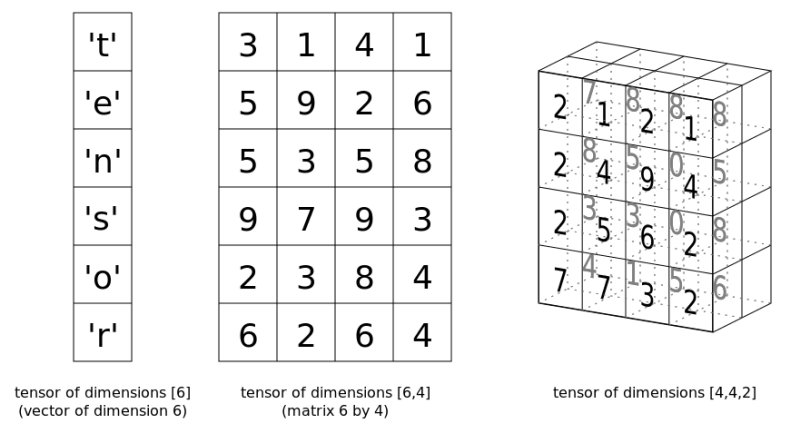

**What is a pytorch tensor?** : A torch.Tensor is a multi-dimensional matrix containing elements of a single data type.

Tensors are similar to NumPy’s ndarrays, with the addition being that Tensors can also be used on a GPU to accelerate computing.

**How to define a pytorch tensor?**
- using existing constructors : _torch.ones_ , _torch.zeros_ _torch.rand_
- based on existing object
    - from another tensor (or only using the shape of the other tensor)
    - from a python list 
    - from a numpy array

In [ ]:
# define 
ones = torch.ones(3,2)
# a tensor can be printed
print(ones)

In [ ]:
# other basic definition 
print(torch.zeros(5,3), "\n", 
      torch.rand(2,3), "\n", 
      torch.empty(2,2))

In [ ]:
# from a python list 
ls = [[[1,3,5,6],[-1,4,4,4]],[[-1,-3,-5,-6],[10,-4,-4,-4]]]
tensor = torch.Tensor(ls)
print(tensor)
# from a numpy array : 
array = np.array([0,1])
#array
tensor = torch.from_numpy(array)
print(tensor)
# symetrically  tensor.numpy()

If the list is not a proper matrix shape, an exception is returned!

In [ ]:
# list must be in a proper matrix shape
ls = [[[1,3,5,6],[-1,4,4,4]],[[-1,-3,-5,-6],[10,-4,-4]]]
torch.Tensor(ls)

**Basic manipulations**
- access type / change data types 
- access elements 
- reshape 
- maths opertions : add, multiply , ..
- differentiate / derive
- set to a specific _device_ : GPU , GPU:0, GPU:1 , CPU ...

In [ ]:
# get type 
print(tensor,tensor.dtype)
# change type 
tensor = tensor.float()

**NB**: types are important in Deep Learning  because: 
- some types are more memory consumming than others : e.g : float16 vs float32
- some operations require a specific type (cf. Embedding layer ...)

In [ ]:
tensor = torch.rand(5,2,2)
print(tensor)
# access one element
print(tensor[0,1,1])
# access several element
print(tensor[:3,0,:2])

**NB**: pytorch tensor indexing exactly match numpy indexing

In [ ]:
# get the shape of a tensor
tensor.size()
# reshape it 
print(tensor, "\n",
      tensor.view(2,2,5))

In [ ]:
intTensor = torch.ones(3,2, dtype=torch.float32)
print(intTensor, intTensor.dtype)
intTensor.int()

#### Operations on Tensors

❗**Beware of Broadcasting** ❗ issues if your tensors does not have the same size. As in [Numpy broadcasting](https://numpy.org/devdocs/user/basics.broadcasting.html#general-broadcasting-rules), some operations above can broadcast, i.e. extend, their application to the size of the targeted tensor.

One really good explanation about PyTorch specific broadcasting can be found here: https://stackoverflow.com/questions/51371070/how-does-pytorch-broadcasting-work

Let's take the same example and reproduce it here.



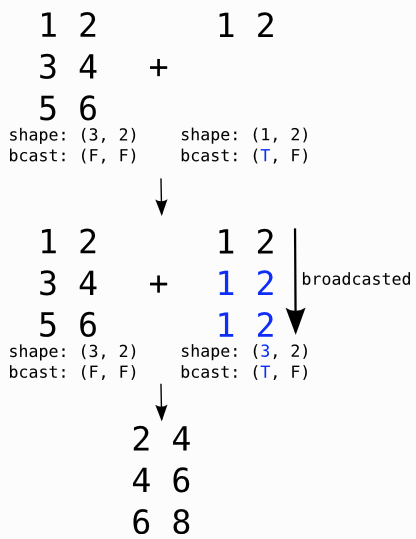

In PyTorch we reproduce it as follows:

In [ ]:
tensor_a = torch.Tensor([[1,2], [3,4], [5,6]])
tensor_b = torch.Tensor([1,2])
tensor_a + tensor_b

#### Automatic Differentiation

The core component of any modern deep learning library is _Automatic Differentiation_. 

**Recall**
- Training any deep learning model requires backpropagation 
- Backpropagation is an algorithm that efficiently computes the gradient of a neural network's output based on its input and with regard to all its parameters (or also named weights)

_Automatic Differentiation_ provides a way of automatically computing gradients of any function. 

### (3.1) Creating a Pytorch **Dataset**

The best way to prepare our dataset to be used in a pytorch model is by using the `torch.utils.data.Dataset` class. We will create a class inheriting from Dataset which should have the `__len__` and `__getitem__` methods. You can find a complete description and example [here](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html#creating-a-custom-dataset-for-your-files).

We will also use the [**DataLoader**](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html#preparing-your-data-for-training-with-dataloaders), which takes care of batches, shuffling the data...

In [ ]:
import torch
from torch import nn
from torch.autograd import Variable
from keras.preprocessing.sequence import pad_sequences
from torch.utils.data import Dataset, DataLoader
from torch.nn import CosineSimilarity, MSELoss
import torch.optim as optim
torch.manual_seed(1)

In [ ]:
class STSDataset(Dataset):  
    def __init__(self, data, max_length=30, vocab=None, min_word_freq=2,lowercase=True):
        '''Params:
        data: dict with 'data' and 'scores' (as in dataset['train'] from load_data())
        vocab: (word2idx, idx2word). A tuple with two dicts: word -> index and index -> word. 
        If it is None, the vocabulary is created within the function.
        For the dev and test sets, you should use the training vocabulary.        
        max_length: maximum sequence length (in words) allowed. Longer sentences will be truncated. Shorter ones
        will be padded.
        min_freq: int. Used only if vocab=None, to create the vocabulary.
        lowercase: bool. If True, words are lowercased.'''
        
        # Get the data
        self.data = data['data']
        # Set the maximum length we will keep for the sequences
        self.max_length = max_length
        # Allow to import a vocabulary (for valid/test datasets, that will use the training vocabulary)
        if vocab is not None:
            self.word2idx, self.idx2word = vocab
        else:
            # If no vocabulary imported, build it (and reverse)
            self.word2idx, self.idx2word = self.build_vocab(self.data, min_word_freq, lowercase=lowercase)        
                
        s1s = []
        s2s = []
        for s1, s2 in self.data:        
            s1_idcs = []
            s2_idcs = []
            # Tokenize each sentence and turn it into a list of vocabulary indices (remember to take care of UNK). Lowercase if necessary            
            ### TO COMPLETE
            ## Considérer les stopwords, la ponctuation..
            for w1 in word_tokenize(s1.lower()):
                if w1 in self.word2idx:
                    s1_idcs.append(self.word2idx[w1])
                else:
                    s1_idcs.append(self.word2idx['UNK'])
            for w2 in word_tokenize(s2.lower()):
                if w2 in self.word2idx:
                    s2_idcs.append(self.word2idx[w2])
                else:
                    s2_idcs.append(self.word2idx['UNK'])
            
            # Truncate sequences that are longer than <max_length>. Append them to s1s and s2s.
            ### TO COMPLETE
            for s_idcs in (s1_idcs, s2_idcs):
                if len(s_idcs)>max_length:
                  s_idcs = s_idcs[:max_length]             
            s1s.append(s1_idcs)
            s2s.append(s2_idcs)            
            
        # Apply padding: for sequences shorter than <max_length>, we fill them with 0 values 
        # This way they all have the same length (max_length) and we can create a pytorch tensor with them            
        self.tensor_s1 = torch.LongTensor(pad_sequences(s1s, maxlen = max_length)) # padding 'pre' by default
        self.tensor_s2 = torch.LongTensor(pad_sequences(s2s, maxlen = max_length))

        # Make a tensor with the targets - we map them to the [-1, 1] interval for convenience (same range as the cosine)
        self.tensor_y = (((torch.FloatTensor(data['scores']) + 1) / 6) * (1+1)) -1 
        
    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        # The iterator just gets one particular example with its category
        # The dataloader will take care of the shuffling and batching
        if torch.is_tensor(idx):
            idx = idx.tolist()
        return self.tensor_s1[idx], self.tensor_s2[idx], self.tensor_y[idx]
  
    def build_vocab(self, corpus, count_threshold, lowercase):        
        word_count = {}
        for s1, s2 in corpus:
            if lowercase:
              s1 = s1.lower()
              s2 = s2.lower()            
            s1_tokens = word_tokenize(s1)
            s2_tokens = word_tokenize(s2)
            for token in s1_tokens + s2_tokens: 
                if token not in word_count:
                    word_count[token] = 1
                else:
                    word_count[token] += 1
        filtered_word_counts = {word: count for word, count in word_count.items() if count >= count_threshold}
        words = sorted(filtered_word_counts.keys(), key=word_count.get, reverse=True) + ['UNK']
        # But we need to shift the indexes by 1 to put the padding symbol to 0
        word_index = {words[i]: i + 1 for i in range(len(words))}
        idx_word = {i + 1: words[i] for i in range(len(words))}
        return word_index, idx_word

    def get_vocab(self):
        # A simple way to get the training vocab when building the valid/test
        return self.word2idx, self.idx2word

In [ ]:
training_dataset = STSDataset(dataset['train'], max_length=30, vocab=None, min_word_freq=2,lowercase=True)
# create dev_dataset and test_dataset as above using the training vocabulary
test_dataset = STSDataset(dataset['test'], max_length=30, vocab=training_dataset.get_vocab(), min_word_freq=2,lowercase=True)
dev_dataset = STSDataset(dataset['dev'], max_length=30, vocab=training_dataset.get_vocab(), min_word_freq=2,lowercase=True)

# Prepare the DataLoaders:
training_dataloader = DataLoader(training_dataset, batch_size = 40, shuffle=True)
dev_dataloader = DataLoader(dev_dataset, batch_size = 25)
test_dataloader = DataLoader(test_dataset, batch_size = 25)

(array([2.787e+03, 1.692e+03, 5.350e+02, 3.860e+02, 2.620e+02, 7.400e+01,
        7.000e+00, 4.000e+00, 1.000e+00, 1.000e+00]),
 array([ 3.5 ,  8.55, 13.6 , 18.65, 23.7 , 28.75, 33.8 , 38.85, 43.9 ,
        48.95, 54.  ]),
 <a list of 10 Patch objects>)

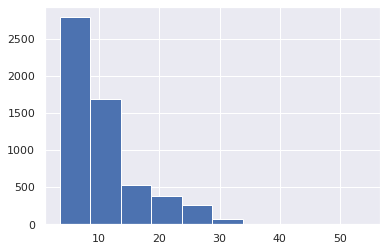

In [ ]:
import matplotlib.pyplot as plt
sentence_length = [(len(word_tokenize(x)) + len(word_tokenize(y)))/2 for x, y in dataset['train']['data']]
plt.hist(sentence_length)

In [ ]:
dataset['train']['data'][0][0]

'A plane is taking off.'

In [ ]:
s1 = dataset['train']['data'][0][0]
l = []
for w1 in word_tokenize(s1):
  if w1 in training_dataset.word2idx:
      l.append(training_dataset.word2idx[w1])
  else:
      l.append(training_dataset.word2idx['UNK'])
l

[7833, 246, 6, 445, 144, 1]

In [ ]:
word_tokenize(dataset['train']['data'][0][1])

['An', 'air', 'plane', 'is', 'taking', 'off', '.']

In [ ]:
training_dataset.idx2word[24]
# training_dataset.word2idx['a']

'an'

In [ ]:
training_dataset.tensor_s1[0], training_dataset.tensor_s2[0]

(tensor([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2, 246,   6, 445,
         144,   1]),
 tensor([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 185, 246,   6, 445,
         144,   1]))

### (3.2) Implementing the model

Below is the implementation of our model, inspired from [this post](https://towardsdatascience.com/a-friendly-introduction-to-siamese-networks-85ab17522942). 
It consists of an embedding layer and a biLSTM. After two sentences have been passed through the model, we calculate their cosine similarity, which is the output value. 
When you instantiate the model, you can experiment with changing the dimension of embeddings (`embedding_dim`), the biLSTM layers dimension (`hidden_dim`), the number of biLSTM layers `num_lstm_layers`.

You don't have to, but if you wanted to try more advanced modifications, you could replace the biLSTM by a unidirectional LSTM (setting `bidirectional` to `False` and modifying `CosineSimilarity` and `forward_once`).
By default all weights are randomly initialized, but you could also try to use (and fine-tune) pre-trained word embeddings.

In [ ]:
# Implementing the model

class SiameseBILSTM(nn.Module):
    def __init__(self, embedding_dim, vocabulary_size, hidden_dim, num_lstm_layers=1):
        super(SiameseBILSTM, self).__init__()
        # create an embedding layer (a lookup table for word representations), randomly initialized
        self.embeddings = nn.Embedding(vocabulary_size + 1, embedding_dim, padding_idx=0)
        # create the LSTM layer(s). bidirectional=True means it is a biLSTM. 
        # Each LSTM (in each direction) will have <hidden_dim> dimension
        self.rnn = nn.LSTM(embedding_dim, hidden_dim, num_layers=num_lstm_layers, batch_first=True, bidirectional=True)        
        # Instantiate the cosine similarity function
        self.cos = CosineSimilarity(dim=1)  

    def forward_once(self, x):
        # Forward pass of one input
        # Pass it through the embedding layer
        output = self.embeddings(x)
        # Then through the biLSTM
        h, (h_n, h_c) = self.rnn(output) 
        # h is of shape (Batch size, sequence length, 2 * hidden_dim) (2 because bidirectional)        
        # Pick the representations of the last tokens:
        out_both = h[:, -1, :]        
        return out_both

    def forward(self, input1, input2):
        # Make a forward pass of each input
        output1 = self.forward_once(input1)
        output2 = self.forward_once(input2)
        # Calculate the cosine similarity between the two sentence representations
        sim = self.cos(output1, output2)
        return sim 


In [ ]:
training_word2idx = training_dataset.get_vocab()[0] # pour corriger un appel à un vocabulaire non défini dans l'appel à SiameseBILSTM() plus bas


# Instantiate the model with the desired parameters
embedding_dim = 100 ## TO COMPLETE
hidden_dim = 150 ## TO COMPLETE
num_lstm_layers = 1 ## TO COMPLETE

# You can run the model on GPU although it doesn't take too long on CPU.
# To use a GPU, go to "Runtime" -> "Change runtime type" -> select "GPU"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SiameseBILSTM(embedding_dim, len(training_word2idx), hidden_dim=hidden_dim, num_lstm_layers=num_lstm_layers)

model.to(device)

# Create an optimizer
opt = optim.Adam(model.parameters(), lr=0.0025, betas=(0.9, 0.999))
# The criterion is MSE since we have a regression problem
criterion = MSELoss()

### (3.3) Building the training loop

In [ ]:
# Training function which trains the model for one epoch

def train_epoch(model, opt, criterion, dataloader):    
    # set the model to training mode
    model.train()
    losses = []             
    preds = []
    all_ys = []
    for i, (x1, x2, y) in enumerate(dataloader):
        # empty gradients at each step
        opt.zero_grad()      
        model.zero_grad()       
        # (1) Forward        
        out = model(x1.to(device), x2.to(device))        
        # (2) Compute the loss
        loss = criterion(out, y.to(device))        
        # (3) Compute gradients
        loss.backward()
        # (4) update weights
        opt.step()          
        # store losses and also predictions and gold ys (to calculate pearson at the end of the epoch)      
        preds.extend(out.cpu().detach().numpy())
        all_ys.extend(y.cpu().detach().numpy())
        losses.append(loss)
        # The loss at this batch - commenté pour clarifier le gridsearch
        # if (i%20 == 0):
            # print("Batch " + str(i) + " : training loss = " + str(loss.item()) + "; training r = " + str(evaluate(out.cpu().detach().numpy(), y.cpu().detach().numpy())))            
    # Average losses to obtain the epoch loss. Calculate pearson's r on the whole dataset.
    print("Total epoch loss = " + str(sum(losses)/(i+1)) + "; Total training r = " + str(evaluate(preds, all_ys)))            
    return losses

In [ ]:
# Evaluation function

def eval_model(model, criterion, evalloader):  
    # set the model to evaluation mode
    model.eval()  
    all_ys = []    
    total_epoch_loss = 0    
    preds = []
    # disable gradient calculation for evaluation
    with torch.no_grad():
        for i, (x1, x2, y) in enumerate(evalloader):
            # Do a forward pass and compute the loss (see function above)             
            ## TO COMPLETE
            # (1) Forward        
            out = model(x1.to(device), x2.to(device))
            loss = criterion(out, y.to(device))
            
            total_epoch_loss += loss.item()            
            preds.extend(out.cpu().detach().numpy())
            all_ys.extend(y.cpu().detach().numpy())
    
    return total_epoch_loss/(i+1), evaluate(preds, all_ys) 

In [ ]:
# A function which will help you execute experiments rapidly - with a early_stopping option when necessary. 
def experiment(model, opt, criterion, num_epochs = 5, early_stopping = True, evaluate_on_test=False):
  '''
  model: the SiameseBILSTM model
  opt: the optimizer
  criterion: the loss function
  if early stopping is set to True, training will stop if the validation loss starts going up. This prevents overfitting
  evaluate_on_test: bool. If True, the function performs a final evaluation on the test set'''
  train_losses = []
  dev_losses = []
  best_dev_loss = 100. 
  if early_stopping: 
      best_dev_loss = 100. 
  print("Beginning training...")
  # Run an epoch (one full pass of the whole dataset)
  for e in range(num_epochs):
      print("Epoch " + str(e+1) + ":")
      train_losses += train_epoch(model, opt, criterion, training_dataloader)
      dev_loss, dev_r = eval_model(model, criterion, dev_dataloader)        
      dev_losses.append(dev_loss)
      print("Epoch " + str(e+1) + " : Validation loss = " + str(dev_loss) + "; Validation r = " + str(dev_r))
      if early_stopping:
          if dev_loss < best_dev_loss:
              best_dev_loss = dev_loss
          else:
              print("Early stopping.") # if validation loss started going up... stop the training to prevent overfitting
              break  
  if evaluate_on_test:
    test_loss, test_r = eval_model(model, criterion, test_dataloader)
    print("Epoch " + str(e+1) + " : Test loss = " + str(test_loss) + "; Test r = " + str(test_r))    
  return train_losses, best_dev_loss, dev_losses

### (3.4-3.5) Train and evaluate

3.4 and 3.5: train different configurations of the model using the experiment() function, evaluate them on dev and evaluate the best one on the test set

**Import et récupération des résultats précédents**

In [ ]:
import pickle
from itertools import product
import random
import pandas as pd

def saveResultsPickle(results):
    drive.mount('/content/drive/')
    if not os.path.exists('/content/drive/MyDrive/CollabNlpProject/results.pkl'):
        os.mkdir('/content/drive/MyDrive/CollabNlpProject')
    with open('/content/drive/MyDrive/CollabNlpProject/results.pkl', 'wb') as results_file:
        pickle.dump(results, results_file)
    drive.flush_and_unmount()


def loadResultsPickle():
    drive.mount('/content/drive/')
    results = pickle.load( open('/content/drive/MyDrive/CollabNlpProject/results.pkl', 'rb' ) )
    drive.flush_and_unmount()
    return results

**Fonction de création des modèles et de recherche**

In [ ]:
# Instantiate the model with the desired parameters
def instantiateModel(embedding_dim, hidden_dim, num_lstm_layers):
  
    model = SiameseBILSTM(embedding_dim, len(training_word2idx), hidden_dim=hidden_dim, num_lstm_layers=num_lstm_layers)
    model.to(device)

    # Create an optimizer
    opt = optim.Adam(model.parameters(), lr=0.0025, betas=(0.9, 0.999))

    # The criterion is MSE since we have a regression problem
    criterion = MSELoss()
    return model, opt, criterion

In [ ]:
# Alimentation de results avec les résultats obtenus à partir des hyperparamètres. Si results contient déjà un test des hyperparamètres, celui-ci n'est pas réalisé.
def search_HP(results, configurationsHP):
    for configuration in configurationsHP:
        if configuration not in results:
            embedding_dim, hidden_dim, num_lstm_layers = configuration
            print("Training BiLSTM model with following layers hyperparameters \n", "embedding_dim : {} hidden_dim : {} num_lstm_layers : {} ".format(embedding_dim, hidden_dim, num_lstm_layers))
            model, opt, criterion = instantiateModel(embedding_dim, hidden_dim, num_lstm_layers)
            _, _, dev_losses = experiment(model, opt, criterion, num_epochs = 5, early_stopping = False, evaluate_on_test=False)
            results[configuration] = dev_losses
    return results

**Interpétation des résultats**

In [ ]:
def best_dev_loss_col(row):
    return (row[row == row['best_dev_loss']].index)[0]

def loss_decrease_perc(row, max_epoch):
    l = list(row.iloc[:max_epoch])
    l_res = []
    for i in range(len(l) - 1):
        l_res.append((l[i] - l[i + 1])/ l[i])
    return l_res


def score_models(df_results):

    """
    Attribue un score à chaque modèle testé
    Args :
      - df_results : la DataFrame des résultats
    Returns :
      - df_results : la DataFrame des résultats avec les scores de chaque modèle
    """
    max_epoch = df_results['max_epoch'].max()
    ### Performance observée de la région
    df_results['score_perf'] = df_results['best_dev_loss']

    ### Performance potentielle de la région
    last_col_decrease_perc = 'loss_decrease_perc_' + str(max_epoch - 1)
    df_results['score_pot'] = - df_results[last_col_decrease_perc] * df_results['best_dev_loss']

    ### Performance de la région : observée + potentielle
    df_results["score"] = 1 / (df_results['score_perf'] + df_results['score_pot'])

    return df_results

def softmax(x, t = 1):
    """
    Fonction Softmax avec température
    """
    x_max = x.max()
    num = np.exp((x - x_max) / t)
    den = num.sum()
    return num / den

def resampling_models(df_results, temperature = 1):
    """
    Convertit en probabilités d'être sélectionné le score de df_results
    Args :
      - df_results : la DataFrame des résultats, contenant une colonne score
    Returns :
      - df_results : la DataFrame des résultats contenant une colonne proba_selection (forte proba -> beaucoup de modèles similaires)
    """
    ### Softmax avec température pour calibrer le resampling
    # df_results['proba_selection'] = softmax(score), temperature)

    ### Rank selection , n'utilise pas la température
    df_results['proba_selection'] = 1 / df_results["model_rank"] / (1 / df_results["model_rank"]).sum()

    return df_results


def create_df_res(results, temperature = 1):

    """
    Récupère results et transforme en une dataframe avec ajout d'informations permettant d'interpréter les résultats et choisir les prochaines configurations à tester
    Args :
      - results : format dict
    Returns :
      - DataFrame
    """

    #### Initialisation de la df ####
    df_results = pd.DataFrame.from_dict(results, orient='index')
    max_epoch = len(df_results.columns)

    #### Ajout d'informations ####
    df_results["max_epoch"] = max_epoch - 1
    df_results["best_dev_loss"] = df_results.apply(min, axis = 1)
    df_results["best_dev_loss_epoch"] = df_results.apply(lambda row: best_dev_loss_col(row), axis=1)
    df_results['lastEpochImproved'] = (df_results["best_dev_loss_epoch"] == df_results['max_epoch'])
    df_results[['embedding_dim', 'hidden_dim', 'num_lstm_layers']] = pd.DataFrame(df_results.index.tolist(), index=df_results.index)
    df_results = df_results.reset_index(drop = True)
    
    df_results['loss_decrease_perc'] = df_results.apply(lambda row : loss_decrease_perc(row, max_epoch), axis = 1)
    df_results = pd.concat([df_results, pd.DataFrame(df_results.loss_decrease_perc.values.tolist()).add_prefix('loss_decrease_perc_')], axis = 1)
    df_results = df_results.drop(labels = 'loss_decrease_perc', axis = 1)

    ### Ajout de la partie interprétation des résultats
    df_results = score_models(df_results)
    df_results["model_rank"] = df_results['score'].rank(method='dense', ascending = False)
    df_results = resampling_models(df_results, temperature)


    return df_results

In [ ]:
def choose_next_config(df_results):
    """
    Interprète les résultats pour proposer 1 nouvelle configuration d'hyperparamètres à tester.
    Introduction d'une part aléatoire en choisissant un modèle inspiré de la génération précédente + bruit gaussien
    Args :
      - df_results : la DataFrame des résultats, avec une probabilité pour chaque modèle d'être sélectionné (proba_selection)
    Returns :
      - configuration : une configuration à tester pour les hyperparamètres : embedding_dim, hidden_dim, num_lstm_layers
    """
    # Retrouver les paramètres d'un modèle en fonction de proba sélection
    rand = random.random()
    idx = (df_results['proba_selection'].sort_values(ascending=False).cumsum()[(df_results['proba_selection'].sort_values(ascending=False).cumsum())>rand]).index[0]
    embedding_dim,	hidden_dim,	num_lstm_layers = df_results.loc[idx, ['embedding_dim',	'hidden_dim',	'num_lstm_layers']]
    # Appliquer un bruit aux paramètres
    bruit_dim = 25
    bruit_layers = 0.5

    embedding_dim_gauss = round(random.gauss(embedding_dim, bruit_dim))
    hidden_dim_gauss = round(random.gauss(hidden_dim, bruit_dim))
    num_lstm_layers_gauss = round(random.gauss(num_lstm_layers, bruit_layers))

    # Corriger les bords (nombre de dimensions > 100)
    if embedding_dim_gauss < 100:
        embedding_dim_gauss = 100
    if hidden_dim_gauss < 100:
        hidden_dim_gauss = 100
    if num_lstm_layers_gauss < 1:
        num_lstm_layers_gauss = 1
    
    configuration = (embedding_dim_gauss,	hidden_dim_gauss,	num_lstm_layers_gauss)

    return configuration, rand

In [ ]:
def find_next_configs(df_results, n = 1):
    """
    Interprète les résultats pour proposer de nouvelles configurations d'hyperparamètres à tester.
    Introduction d'une part aléatoire en choisissant un modèle inspiré de la génération précédente + bruit gaussien
    Args :
      - df_results : la DataFrame des résultats, avec une probabilité pour chaque modèle d'être sélectionné
      - n : le nombre de nouvelles configurations à tester
    Returns :
      - configurationsHP : liste de n configurations à tester pour les hyperparamètres : embedding_dim, hidden_dim, num_lstm_layers
    """
    configurationsHP = []
    for i in range(n):
        config, random_number = choose_next_config(df_results)
        configurationsHP.append(config)
    return configurationsHP

In [ ]:
def get_best_model(df_results):
    best_dev_loss_BM, embedding_dim_BM,	hidden_dim_BM,	num_lstm_layers_BM = (df_results[df_results["score"] == df_results["score"].max()])[['best_dev_loss', 'embedding_dim',	'hidden_dim',	'num_lstm_layers']].iloc[0]
    return best_dev_loss_BM, embedding_dim_BM,	hidden_dim_BM,	num_lstm_layers_BM

In [ ]:
# Iteration
def add_generation(results, n = 1, temperature = 1):
    """
    Ajoute n nouveaux modèles au test
    Args :
      - results : le dictionnaire des résultats
      - n : le nombre de nouvelles configurations à tester
    Returns :
      - results : le dictionnaire des résultats, avec n configurations en plus
    """
    df_results = create_df_res(results, temperature)
    configurationsHP = find_next_configs(df_results, n)
    results = search_HP(results, configurationsHP)
    saveResultsPickle(results)
    return results

**MAIN : Recherche des Hyperparamètres**

In [ ]:
# Récupérer les résultats des précédentes sessions
results = loadResultsPickle()

# Créer le dictionnaire results si results n'existe pas
try:
  results
except:
  results = {}

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Initialisation de la recherche par un gridsearch

# Gridsearch
l_embedding_dim = [300, 350] ## TO CHOOSE
l_hidden_dim = [200, 300] ## TO CHOOSE
l_num_lstm_layers = [2, 3] ## TO CHOOSE

configurationsHP = list(product(l_embedding_dim, l_hidden_dim, l_num_lstm_layers))

results = search_HP(results, configurationsHP)

saveResultsPickle(results)

Training BiLSTM model with following layers hyperparameters 
 embedding_dim : 300 hidden_dim : 200 num_lstm_layers : 2 
Beginning training...
Epoch 1:
Total epoch loss = tensor(0.2681, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.39456732441572145
Epoch 1 : Validation loss = 0.2854425506045421; Validation r = 0.4993750778078896
Epoch 2:
Total epoch loss = tensor(0.1208, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.7314992669425124
Epoch 2 : Validation loss = 0.2201611239463091; Validation r = 0.5322153803302242
Epoch 3:
Total epoch loss = tensor(0.0507, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.8969139742004016
Epoch 3 : Validation loss = 0.22601835193733374; Validation r = 0.5279490031392022
Epoch 4:
Total epoch loss = tensor(0.0284, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.9417431974045809
Epoch 4 : Validation loss = 0.2129658553749323; Validation r = 0.5465870716200584
Epoch 5:
Total epoch loss = tensor(0

In [ ]:
# Recherche par générations
ngen = 10
n_child = 5

for i in range (ngen):
  print('\n\n\n\n')
  print("Génération : " , i+1)
  print('\n\n\n\n')
  add_generation(results, n = n_child, temperature = 1)
  df_results = create_df_res(results, temperature = 1)
  display(df_results)
  print(get_best_model(df_results))






Génération :  1





Training BiLSTM model with following layers hyperparameters 
 embedding_dim : 219 hidden_dim : 272 num_lstm_layers : 2 
Beginning training...
Epoch 1:
Total epoch loss = tensor(0.2666, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.3832700197193243
Epoch 1 : Validation loss = 0.25840575446685154; Validation r = 0.44323237235833607
Epoch 2:
Total epoch loss = tensor(0.1407, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.6701799381044322
Epoch 2 : Validation loss = 0.22660944772263367; Validation r = 0.49125004536291095
Epoch 3:
Total epoch loss = tensor(0.0694, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.855527916776942
Epoch 3 : Validation loss = 0.23161034000416597; Validation r = 0.5040367705124568
Epoch 4:
Total epoch loss = tensor(0.0345, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.9314515470231542
Epoch 4 : Validation loss = 0.23464466153333585; Validation r = 0.506377958219445
Epoch 5:

,0,1,2,3,4,max_epoch,best_dev_loss,best_dev_loss_epoch,lastEpochImproved,embedding_dim,hidden_dim,num_lstm_layers,loss_decrease_perc_0,loss_decrease_perc_1,loss_decrease_perc_2,loss_decrease_perc_3,score_perf,score_pot,score,model_rank,proba_selection
0,0.297629,0.256342,0.224900,0.221605,0.211659,4,0.211659,4,True,100,125,2,0.138718,0.122657,0.014653,0.044878,0.211659,-0.009499,4.946564,2.0,0.145368
1,0.276555,0.242013,0.211087,0.214948,0.208097,4,0.208097,4,True,100,275,2,0.124904,0.127787,-0.018291,0.031870,0.208097,-0.006632,4.963635,1.0,0.290735
2,0.296420,0.235832,0.227745,0.233284,0.222732,4,0.222732,4,True,175,125,2,0.204399,0.034291,-0.024319,0.045231,0.222732,-0.010074,4.702388,6.0,0.048456
3,0.270336,0.227319,0.231308,0.210536,0.223296,4,0.210536,3,False,175,275,2,0.159127,-0.017549,0.089803,-0.060609,0.210536,0.012760,4.478359,9.0,0.032304
4,0.285443,0.220161,0.226018,0.212966,0.227897,4,0.212966,3,False,300,200,2,0.228703,-0.026604,0.057750,-0.070109,0.212966,0.014931,4.387952,11.0,0.026430
5,0.295962,0.254919,0.248721,0.234610,0.243503,4,0.234610,3,False,300,200,3,0.138675,0.024316,0.056733,-0.037906,0.234610,0.008893,4.106723,15.0,0.019382
6,0.264929,0.224174,0.228173,0.214969,0.218195,4,0.214969,3,False,300,300,2,0.153832,-0.017838,0.057869,-0.015006,0.214969,0.003226,4.583062,8.0,0.036342
7,0.270235,0.228662,0.249313,0.208663,0.211333,4,0.208663,3,False,300,300,3,0.153839,-0.090309,0.163048,-0.012797,0.208663,0.002670,4.731872,5.0,0.058147
8,0.257634,0.223843,0.245183,0.219602,0.223688,4,0.219602,3,False,350,200,2,0.131159,-0.095335,0.104335,-0.018609,0.219602,0.004087,4.470503,10.0,0.029074
9,0.289596,0.240284,0.235281,0.229896,0.247811,4,0.229896,3,False,350,200,3,0.170279,0.020819,0.022889,-0.077928,0.229896,0.017915,4.035327,17.0,0.017102


(0.20809729459385076, 100.0, 275.0, 2.0)





Génération :  2





Training BiLSTM model with following layers hyperparameters 
 embedding_dim : 100 hidden_dim : 322 num_lstm_layers : 2 
Beginning training...
Epoch 1:
Total epoch loss = tensor(0.2773, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.3475665096041437
Epoch 1 : Validation loss = 0.2628717365364234; Validation r = 0.3822072183532963
Epoch 2:
Total epoch loss = tensor(0.1822, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.5422838374199185
Epoch 2 : Validation loss = 0.2275003441919883; Validation r = 0.4522082151606786
Epoch 3:
Total epoch loss = tensor(0.1193, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.7265636177385655
Epoch 3 : Validation loss = 0.21443559465308984; Validation r = 0.49380431962160803
Epoch 4:
Total epoch loss = tensor(0.0690, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.8596039016257068
Epoch 4 : Validation loss = 0.2059827834367752; Val

,0,1,2,3,4,max_epoch,best_dev_loss,best_dev_loss_epoch,lastEpochImproved,embedding_dim,hidden_dim,num_lstm_layers,loss_decrease_perc_0,loss_decrease_perc_1,loss_decrease_perc_2,loss_decrease_perc_3,score_perf,score_pot,score,model_rank,proba_selection
0,0.297629,0.256342,0.224900,0.221605,0.211659,4,0.211659,4,True,100,125,2,0.138718,0.122657,0.014653,0.044878,0.211659,-0.009499,4.946564,2.0,0.135471
1,0.276555,0.242013,0.211087,0.214948,0.208097,4,0.208097,4,True,100,275,2,0.124904,0.127787,-0.018291,0.031870,0.208097,-0.006632,4.963635,1.0,0.270943
2,0.296420,0.235832,0.227745,0.233284,0.222732,4,0.222732,4,True,175,125,2,0.204399,0.034291,-0.024319,0.045231,0.222732,-0.010074,4.702388,9.0,0.030105
3,0.270336,0.227319,0.231308,0.210536,0.223296,4,0.210536,3,False,175,275,2,0.159127,-0.017549,0.089803,-0.060609,0.210536,0.012760,4.478359,14.0,0.019353
4,0.285443,0.220161,0.226018,0.212966,0.227897,4,0.212966,3,False,300,200,2,0.228703,-0.026604,0.057750,-0.070109,0.212966,0.014931,4.387952,16.0,0.016934
5,0.295962,0.254919,0.248721,0.234610,0.243503,4,0.234610,3,False,300,200,3,0.138675,0.024316,0.056733,-0.037906,0.234610,0.008893,4.106723,20.0,0.013547
6,0.264929,0.224174,0.228173,0.214969,0.218195,4,0.214969,3,False,300,300,2,0.153832,-0.017838,0.057869,-0.015006,0.214969,0.003226,4.583062,12.0,0.022579
7,0.270235,0.228662,0.249313,0.208663,0.211333,4,0.208663,3,False,300,300,3,0.153839,-0.090309,0.163048,-0.012797,0.208663,0.002670,4.731872,8.0,0.033868
8,0.257634,0.223843,0.245183,0.219602,0.223688,4,0.219602,3,False,350,200,2,0.131159,-0.095335,0.104335,-0.018609,0.219602,0.004087,4.470503,15.0,0.018063
9,0.289596,0.240284,0.235281,0.229896,0.247811,4,0.229896,3,False,350,200,3,0.170279,0.020819,0.022889,-0.077928,0.229896,0.017915,4.035327,22.0,0.012316


(0.20809729459385076, 100.0, 275.0, 2.0)





Génération :  3





Training BiLSTM model with following layers hyperparameters 
 embedding_dim : 156 hidden_dim : 276 num_lstm_layers : 1 
Beginning training...
Epoch 1:
Total epoch loss = tensor(0.2581, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.40397971929670295
Epoch 1 : Validation loss = 0.2652598542471727; Validation r = 0.43464817600206046
Epoch 2:
Total epoch loss = tensor(0.1268, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.7177572114395768
Epoch 2 : Validation loss = 0.22728776646157106; Validation r = 0.4919671233420142
Epoch 3:
Total epoch loss = tensor(0.0616, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.8743955710721926
Epoch 3 : Validation loss = 0.21776333625117938; Validation r = 0.5118055470470052
Epoch 4:
Total epoch loss = tensor(0.0320, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.9383854763286529
Epoch 4 : Validation loss = 0.21023509080211322; 

,0,1,2,3,4,max_epoch,best_dev_loss,best_dev_loss_epoch,lastEpochImproved,embedding_dim,hidden_dim,num_lstm_layers,loss_decrease_perc_0,loss_decrease_perc_1,loss_decrease_perc_2,loss_decrease_perc_3,score_perf,score_pot,score,model_rank,proba_selection
0,0.297629,0.256342,0.224900,0.221605,0.211659,4,0.211659,4,True,100,125,2,0.138718,0.122657,0.014653,0.044878,0.211659,-0.009499,4.946564,3.0,0.085658
1,0.276555,0.242013,0.211087,0.214948,0.208097,4,0.208097,4,True,100,275,2,0.124904,0.127787,-0.018291,0.031870,0.208097,-0.006632,4.963635,2.0,0.128487
2,0.296420,0.235832,0.227745,0.233284,0.222732,4,0.222732,4,True,175,125,2,0.204399,0.034291,-0.024319,0.045231,0.222732,-0.010074,4.702388,12.0,0.021414
3,0.270336,0.227319,0.231308,0.210536,0.223296,4,0.210536,3,False,175,275,2,0.159127,-0.017549,0.089803,-0.060609,0.210536,0.012760,4.478359,19.0,0.013525
4,0.285443,0.220161,0.226018,0.212966,0.227897,4,0.212966,3,False,300,200,2,0.228703,-0.026604,0.057750,-0.070109,0.212966,0.014931,4.387952,21.0,0.012237
5,0.295962,0.254919,0.248721,0.234610,0.243503,4,0.234610,3,False,300,200,3,0.138675,0.024316,0.056733,-0.037906,0.234610,0.008893,4.106723,25.0,0.010279
6,0.264929,0.224174,0.228173,0.214969,0.218195,4,0.214969,3,False,300,300,2,0.153832,-0.017838,0.057869,-0.015006,0.214969,0.003226,4.583062,15.0,0.017132
7,0.270235,0.228662,0.249313,0.208663,0.211333,4,0.208663,3,False,300,300,3,0.153839,-0.090309,0.163048,-0.012797,0.208663,0.002670,4.731872,10.0,0.025697
8,0.257634,0.223843,0.245183,0.219602,0.223688,4,0.219602,3,False,350,200,2,0.131159,-0.095335,0.104335,-0.018609,0.219602,0.004087,4.470503,20.0,0.012849
9,0.289596,0.240284,0.235281,0.229896,0.247811,4,0.229896,3,False,350,200,3,0.170279,0.020819,0.022889,-0.077928,0.229896,0.017915,4.035327,27.0,0.009518


(0.20227106225987276, 156.0, 276.0, 1.0)





Génération :  4





Training BiLSTM model with following layers hyperparameters 
 embedding_dim : 127 hidden_dim : 305 num_lstm_layers : 1 
Beginning training...
Epoch 1:
Total epoch loss = tensor(0.2577, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.3982117707984813
Epoch 1 : Validation loss = 0.2660891609887282; Validation r = 0.4662123823343509
Epoch 2:
Total epoch loss = tensor(0.1399, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.6803462442381027
Epoch 2 : Validation loss = 0.23626097925007344; Validation r = 0.5054025898917963
Epoch 3:
Total epoch loss = tensor(0.0760, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.8406523645653968
Epoch 3 : Validation loss = 0.20505609860022864; Validation r = 0.5371527511995647
Epoch 4:
Total epoch loss = tensor(0.0399, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.9219252445605643
Epoch 4 : Validation loss = 0.20483125199874241; Va

,0,1,2,3,4,max_epoch,best_dev_loss,best_dev_loss_epoch,lastEpochImproved,embedding_dim,hidden_dim,num_lstm_layers,loss_decrease_perc_0,loss_decrease_perc_1,loss_decrease_perc_2,loss_decrease_perc_3,score_perf,score_pot,score,model_rank,proba_selection
0,0.297629,0.256342,0.224900,0.221605,0.211659,4,0.211659,4,True,100,125,2,0.138718,0.122657,0.014653,0.044878,0.211659,-0.009499,4.946564,5.0,0.049279
1,0.276555,0.242013,0.211087,0.214948,0.208097,4,0.208097,4,True,100,275,2,0.124904,0.127787,-0.018291,0.031870,0.208097,-0.006632,4.963635,4.0,0.061599
2,0.296420,0.235832,0.227745,0.233284,0.222732,4,0.222732,4,True,175,125,2,0.204399,0.034291,-0.024319,0.045231,0.222732,-0.010074,4.702388,16.0,0.015400
3,0.270336,0.227319,0.231308,0.210536,0.223296,4,0.210536,3,False,175,275,2,0.159127,-0.017549,0.089803,-0.060609,0.210536,0.012760,4.478359,23.0,0.010713
4,0.285443,0.220161,0.226018,0.212966,0.227897,4,0.212966,3,False,300,200,2,0.228703,-0.026604,0.057750,-0.070109,0.212966,0.014931,4.387952,26.0,0.009477
5,0.295962,0.254919,0.248721,0.234610,0.243503,4,0.234610,3,False,300,200,3,0.138675,0.024316,0.056733,-0.037906,0.234610,0.008893,4.106723,30.0,0.008213
6,0.264929,0.224174,0.228173,0.214969,0.218195,4,0.214969,3,False,300,300,2,0.153832,-0.017838,0.057869,-0.015006,0.214969,0.003226,4.583062,19.0,0.012968
7,0.270235,0.228662,0.249313,0.208663,0.211333,4,0.208663,3,False,300,300,3,0.153839,-0.090309,0.163048,-0.012797,0.208663,0.002670,4.731872,14.0,0.017600
8,0.257634,0.223843,0.245183,0.219602,0.223688,4,0.219602,3,False,350,200,2,0.131159,-0.095335,0.104335,-0.018609,0.219602,0.004087,4.470503,24.0,0.010267
9,0.289596,0.240284,0.235281,0.229896,0.247811,4,0.229896,3,False,350,200,3,0.170279,0.020819,0.022889,-0.077928,0.229896,0.017915,4.035327,32.0,0.007700


(0.20227106225987276, 156.0, 276.0, 1.0)





Génération :  5





Training BiLSTM model with following layers hyperparameters 
 embedding_dim : 163 hidden_dim : 290 num_lstm_layers : 1 
Beginning training...
Epoch 1:
Total epoch loss = tensor(0.2568, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.4089149024867468
Epoch 1 : Validation loss = 0.27222839221358297; Validation r = 0.4479971672981183
Epoch 2:
Total epoch loss = tensor(0.1277, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.7153470150478117
Epoch 2 : Validation loss = 0.22216321863234043; Validation r = 0.511806725870529
Epoch 3:
Total epoch loss = tensor(0.0625, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.8727463954038582
Epoch 3 : Validation loss = 0.21754651684314014; Validation r = 0.518883407828747
Epoch 4:
Total epoch loss = tensor(0.0313, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.9394100238301899
Epoch 4 : Validation loss = 0.21329657025635243; Val

,0,1,2,3,4,max_epoch,best_dev_loss,best_dev_loss_epoch,lastEpochImproved,embedding_dim,hidden_dim,num_lstm_layers,loss_decrease_perc_0,loss_decrease_perc_1,loss_decrease_perc_2,loss_decrease_perc_3,score_perf,score_pot,score,model_rank,proba_selection
0,0.297629,0.256342,0.224900,0.221605,0.211659,4,0.211659,4,True,100,125,2,0.138718,0.122657,0.014653,0.044878,0.211659,-0.009499,4.946564,7.0,0.034001
1,0.276555,0.242013,0.211087,0.214948,0.208097,4,0.208097,4,True,100,275,2,0.124904,0.127787,-0.018291,0.031870,0.208097,-0.006632,4.963635,5.0,0.047601
2,0.296420,0.235832,0.227745,0.233284,0.222732,4,0.222732,4,True,175,125,2,0.204399,0.034291,-0.024319,0.045231,0.222732,-0.010074,4.702388,18.0,0.013223
3,0.270336,0.227319,0.231308,0.210536,0.223296,4,0.210536,3,False,175,275,2,0.159127,-0.017549,0.089803,-0.060609,0.210536,0.012760,4.478359,27.0,0.008815
4,0.285443,0.220161,0.226018,0.212966,0.227897,4,0.212966,3,False,300,200,2,0.228703,-0.026604,0.057750,-0.070109,0.212966,0.014931,4.387952,30.0,0.007934
5,0.295962,0.254919,0.248721,0.234610,0.243503,4,0.234610,3,False,300,200,3,0.138675,0.024316,0.056733,-0.037906,0.234610,0.008893,4.106723,35.0,0.006800
6,0.264929,0.224174,0.228173,0.214969,0.218195,4,0.214969,3,False,300,300,2,0.153832,-0.017838,0.057869,-0.015006,0.214969,0.003226,4.583062,22.0,0.010818
7,0.270235,0.228662,0.249313,0.208663,0.211333,4,0.208663,3,False,300,300,3,0.153839,-0.090309,0.163048,-0.012797,0.208663,0.002670,4.731872,16.0,0.014875
8,0.257634,0.223843,0.245183,0.219602,0.223688,4,0.219602,3,False,350,200,2,0.131159,-0.095335,0.104335,-0.018609,0.219602,0.004087,4.470503,28.0,0.008500
9,0.289596,0.240284,0.235281,0.229896,0.247811,4,0.229896,3,False,350,200,3,0.170279,0.020819,0.022889,-0.077928,0.229896,0.017915,4.035327,37.0,0.006433


(0.20227106225987276, 156.0, 276.0, 1.0)





Génération :  6





Training BiLSTM model with following layers hyperparameters 
 embedding_dim : 193 hidden_dim : 292 num_lstm_layers : 1 
Beginning training...
Epoch 1:
Total epoch loss = tensor(0.2528, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.4130912689550269
Epoch 1 : Validation loss = 0.24679851531982422; Validation r = 0.48401481701010624
Epoch 2:
Total epoch loss = tensor(0.1203, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.7350201039036036
Epoch 2 : Validation loss = 0.2251344058662653; Validation r = 0.5032242690863407
Epoch 3:
Total epoch loss = tensor(0.0580, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.8823753646177349
Epoch 3 : Validation loss = 0.22339904910574357; Validation r = 0.5027042384645277
Epoch 4:
Total epoch loss = tensor(0.0298, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.9417235047814836
Epoch 4 : Validation loss = 0.22086976369222006; V

,0,1,2,3,4,max_epoch,best_dev_loss,best_dev_loss_epoch,lastEpochImproved,embedding_dim,hidden_dim,num_lstm_layers,loss_decrease_perc_0,loss_decrease_perc_1,loss_decrease_perc_2,loss_decrease_perc_3,score_perf,score_pot,score,model_rank,proba_selection
0,0.297629,0.256342,0.224900,0.221605,0.211659,4,0.211659,4,True,100,125,2,0.138718,0.122657,0.014653,0.044878,0.211659,-0.009499,4.946564,8.0,0.028890
1,0.276555,0.242013,0.211087,0.214948,0.208097,4,0.208097,4,True,100,275,2,0.124904,0.127787,-0.018291,0.031870,0.208097,-0.006632,4.963635,6.0,0.038520
2,0.296420,0.235832,0.227745,0.233284,0.222732,4,0.222732,4,True,175,125,2,0.204399,0.034291,-0.024319,0.045231,0.222732,-0.010074,4.702388,20.0,0.011556
3,0.270336,0.227319,0.231308,0.210536,0.223296,4,0.210536,3,False,175,275,2,0.159127,-0.017549,0.089803,-0.060609,0.210536,0.012760,4.478359,31.0,0.007456
4,0.285443,0.220161,0.226018,0.212966,0.227897,4,0.212966,3,False,300,200,2,0.228703,-0.026604,0.057750,-0.070109,0.212966,0.014931,4.387952,34.0,0.006798
5,0.295962,0.254919,0.248721,0.234610,0.243503,4,0.234610,3,False,300,200,3,0.138675,0.024316,0.056733,-0.037906,0.234610,0.008893,4.106723,39.0,0.005926
6,0.264929,0.224174,0.228173,0.214969,0.218195,4,0.214969,3,False,300,300,2,0.153832,-0.017838,0.057869,-0.015006,0.214969,0.003226,4.583062,26.0,0.008889
7,0.270235,0.228662,0.249313,0.208663,0.211333,4,0.208663,3,False,300,300,3,0.153839,-0.090309,0.163048,-0.012797,0.208663,0.002670,4.731872,18.0,0.012840
8,0.257634,0.223843,0.245183,0.219602,0.223688,4,0.219602,3,False,350,200,2,0.131159,-0.095335,0.104335,-0.018609,0.219602,0.004087,4.470503,32.0,0.007223
9,0.289596,0.240284,0.235281,0.229896,0.247811,4,0.229896,3,False,350,200,3,0.170279,0.020819,0.022889,-0.077928,0.229896,0.017915,4.035327,42.0,0.005503


(0.20227106225987276, 156.0, 276.0, 1.0)





Génération :  7





Training BiLSTM model with following layers hyperparameters 
 embedding_dim : 205 hidden_dim : 314 num_lstm_layers : 1 
Beginning training...
Epoch 1:
Total epoch loss = tensor(0.2596, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.39777703354567806
Epoch 1 : Validation loss = 0.2525144452850024; Validation r = 0.45886098692536353
Epoch 2:
Total epoch loss = tensor(0.1217, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.7248060522076563
Epoch 2 : Validation loss = 0.2570667453110218; Validation r = 0.49884754442439255
Epoch 3:
Total epoch loss = tensor(0.0555, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.8875778644390142
Epoch 3 : Validation loss = 0.20951807511349518; Validation r = 0.53677289520967
Epoch 4:
Total epoch loss = tensor(0.0265, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.9484229363061932
Epoch 4 : Validation loss = 0.20779798043270906; Va

,0,1,2,3,4,max_epoch,best_dev_loss,best_dev_loss_epoch,lastEpochImproved,embedding_dim,hidden_dim,num_lstm_layers,loss_decrease_perc_0,loss_decrease_perc_1,loss_decrease_perc_2,loss_decrease_perc_3,score_perf,score_pot,score,model_rank,proba_selection
0,0.297629,0.256342,0.224900,0.221605,0.211659,4,0.211659,4,True,100,125,2,0.138718,0.122657,0.014653,0.044878,0.211659,-0.009499,4.946564,8.0,0.028166
1,0.276555,0.242013,0.211087,0.214948,0.208097,4,0.208097,4,True,100,275,2,0.124904,0.127787,-0.018291,0.031870,0.208097,-0.006632,4.963635,6.0,0.037555
2,0.296420,0.235832,0.227745,0.233284,0.222732,4,0.222732,4,True,175,125,2,0.204399,0.034291,-0.024319,0.045231,0.222732,-0.010074,4.702388,23.0,0.009797
3,0.270336,0.227319,0.231308,0.210536,0.223296,4,0.210536,3,False,175,275,2,0.159127,-0.017549,0.089803,-0.060609,0.210536,0.012760,4.478359,35.0,0.006438
4,0.285443,0.220161,0.226018,0.212966,0.227897,4,0.212966,3,False,300,200,2,0.228703,-0.026604,0.057750,-0.070109,0.212966,0.014931,4.387952,39.0,0.005778
5,0.295962,0.254919,0.248721,0.234610,0.243503,4,0.234610,3,False,300,200,3,0.138675,0.024316,0.056733,-0.037906,0.234610,0.008893,4.106723,44.0,0.005121
6,0.264929,0.224174,0.228173,0.214969,0.218195,4,0.214969,3,False,300,300,2,0.153832,-0.017838,0.057869,-0.015006,0.214969,0.003226,4.583062,30.0,0.007511
7,0.270235,0.228662,0.249313,0.208663,0.211333,4,0.208663,3,False,300,300,3,0.153839,-0.090309,0.163048,-0.012797,0.208663,0.002670,4.731872,21.0,0.010730
8,0.257634,0.223843,0.245183,0.219602,0.223688,4,0.219602,3,False,350,200,2,0.131159,-0.095335,0.104335,-0.018609,0.219602,0.004087,4.470503,36.0,0.006259
9,0.289596,0.240284,0.235281,0.229896,0.247811,4,0.229896,3,False,350,200,3,0.170279,0.020819,0.022889,-0.077928,0.229896,0.017915,4.035327,47.0,0.004794


(0.20227106225987276, 156.0, 276.0, 1.0)





Génération :  8





Training BiLSTM model with following layers hyperparameters 
 embedding_dim : 224 hidden_dim : 314 num_lstm_layers : 2 
Beginning training...
Epoch 1:
Total epoch loss = tensor(0.2678, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.37494513939764473
Epoch 1 : Validation loss = 0.27041639300684134; Validation r = 0.42361089903347954
Epoch 2:
Total epoch loss = tensor(0.1435, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.6601888256416567
Epoch 2 : Validation loss = 0.23205114292601745; Validation r = 0.48717164699318255
Epoch 3:
Total epoch loss = tensor(0.0728, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.8496568581633168
Epoch 3 : Validation loss = 0.2189780080070098; Validation r = 0.5082404284215796
Epoch 4:
Total epoch loss = tensor(0.0367, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.9276535296780558
Epoch 4 : Validation loss = 0.21504682352145513;

,0,1,2,3,4,max_epoch,best_dev_loss,best_dev_loss_epoch,lastEpochImproved,embedding_dim,hidden_dim,num_lstm_layers,loss_decrease_perc_0,loss_decrease_perc_1,loss_decrease_perc_2,loss_decrease_perc_3,score_perf,score_pot,score,model_rank,proba_selection
0,0.297629,0.256342,0.224900,0.221605,0.211659,4,0.211659,4,True,100,125,2,0.138718,0.122657,0.014653,0.044878,0.211659,-0.009499,4.946564,8.0,0.027545
1,0.276555,0.242013,0.211087,0.214948,0.208097,4,0.208097,4,True,100,275,2,0.124904,0.127787,-0.018291,0.031870,0.208097,-0.006632,4.963635,6.0,0.036727
2,0.296420,0.235832,0.227745,0.233284,0.222732,4,0.222732,4,True,175,125,2,0.204399,0.034291,-0.024319,0.045231,0.222732,-0.010074,4.702388,25.0,0.008814
3,0.270336,0.227319,0.231308,0.210536,0.223296,4,0.210536,3,False,175,275,2,0.159127,-0.017549,0.089803,-0.060609,0.210536,0.012760,4.478359,39.0,0.005650
4,0.285443,0.220161,0.226018,0.212966,0.227897,4,0.212966,3,False,300,200,2,0.228703,-0.026604,0.057750,-0.070109,0.212966,0.014931,4.387952,43.0,0.005125
5,0.295962,0.254919,0.248721,0.234610,0.243503,4,0.234610,3,False,300,200,3,0.138675,0.024316,0.056733,-0.037906,0.234610,0.008893,4.106723,49.0,0.004497
6,0.264929,0.224174,0.228173,0.214969,0.218195,4,0.214969,3,False,300,300,2,0.153832,-0.017838,0.057869,-0.015006,0.214969,0.003226,4.583062,33.0,0.006678
7,0.270235,0.228662,0.249313,0.208663,0.211333,4,0.208663,3,False,300,300,3,0.153839,-0.090309,0.163048,-0.012797,0.208663,0.002670,4.731872,23.0,0.009581
8,0.257634,0.223843,0.245183,0.219602,0.223688,4,0.219602,3,False,350,200,2,0.131159,-0.095335,0.104335,-0.018609,0.219602,0.004087,4.470503,40.0,0.005509
9,0.289596,0.240284,0.235281,0.229896,0.247811,4,0.229896,3,False,350,200,3,0.170279,0.020819,0.022889,-0.077928,0.229896,0.017915,4.035327,52.0,0.004238


(0.20227106225987276, 156.0, 276.0, 1.0)





Génération :  9





Training BiLSTM model with following layers hyperparameters 
 embedding_dim : 203 hidden_dim : 253 num_lstm_layers : 1 
Beginning training...
Epoch 1:
Total epoch loss = tensor(0.2562, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.4161412575883786
Epoch 1 : Validation loss = 0.2513181349883477; Validation r = 0.49069592559570663
Epoch 2:
Total epoch loss = tensor(0.1175, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.743811331845937
Epoch 2 : Validation loss = 0.223805841182669; Validation r = 0.5347751175643278
Epoch 3:
Total epoch loss = tensor(0.0554, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.8870774889780308
Epoch 3 : Validation loss = 0.23333106450736524; Validation r = 0.5159870846635792
Epoch 4:
Total epoch loss = tensor(0.0290, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.9428754732177682
Epoch 4 : Validation loss = 0.20519668521980444; Vali

,0,1,2,3,4,max_epoch,best_dev_loss,best_dev_loss_epoch,lastEpochImproved,embedding_dim,hidden_dim,num_lstm_layers,loss_decrease_perc_0,loss_decrease_perc_1,loss_decrease_perc_2,loss_decrease_perc_3,score_perf,score_pot,score,model_rank,proba_selection
0,0.297629,0.256342,0.224900,0.221605,0.211659,4,0.211659,4,True,100,125,2,0.138718,0.122657,0.014653,0.044878,0.211659,-0.009499,4.946564,8.0,0.027004
1,0.276555,0.242013,0.211087,0.214948,0.208097,4,0.208097,4,True,100,275,2,0.124904,0.127787,-0.018291,0.031870,0.208097,-0.006632,4.963635,6.0,0.036005
2,0.296420,0.235832,0.227745,0.233284,0.222732,4,0.222732,4,True,175,125,2,0.204399,0.034291,-0.024319,0.045231,0.222732,-0.010074,4.702388,27.0,0.008001
3,0.270336,0.227319,0.231308,0.210536,0.223296,4,0.210536,3,False,175,275,2,0.159127,-0.017549,0.089803,-0.060609,0.210536,0.012760,4.478359,44.0,0.004910
4,0.285443,0.220161,0.226018,0.212966,0.227897,4,0.212966,3,False,300,200,2,0.228703,-0.026604,0.057750,-0.070109,0.212966,0.014931,4.387952,48.0,0.004501
5,0.295962,0.254919,0.248721,0.234610,0.243503,4,0.234610,3,False,300,200,3,0.138675,0.024316,0.056733,-0.037906,0.234610,0.008893,4.106723,54.0,0.004001
6,0.264929,0.224174,0.228173,0.214969,0.218195,4,0.214969,3,False,300,300,2,0.153832,-0.017838,0.057869,-0.015006,0.214969,0.003226,4.583062,36.0,0.006001
7,0.270235,0.228662,0.249313,0.208663,0.211333,4,0.208663,3,False,300,300,3,0.153839,-0.090309,0.163048,-0.012797,0.208663,0.002670,4.731872,25.0,0.008641
8,0.257634,0.223843,0.245183,0.219602,0.223688,4,0.219602,3,False,350,200,2,0.131159,-0.095335,0.104335,-0.018609,0.219602,0.004087,4.470503,45.0,0.004801
9,0.289596,0.240284,0.235281,0.229896,0.247811,4,0.229896,3,False,350,200,3,0.170279,0.020819,0.022889,-0.077928,0.229896,0.017915,4.035327,57.0,0.003790


(0.20227106225987276, 156.0, 276.0, 1.0)





Génération :  10





Training BiLSTM model with following layers hyperparameters 
 embedding_dim : 110 hidden_dim : 322 num_lstm_layers : 2 
Beginning training...
Epoch 1:
Total epoch loss = tensor(0.2775, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.3337654449892544
Epoch 1 : Validation loss = 0.2550368655472994; Validation r = 0.3850226979252692
Epoch 2:
Total epoch loss = tensor(0.1682, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.5792004982792159
Epoch 2 : Validation loss = 0.2275001335889101; Validation r = 0.49523892471121955
Epoch 3:
Total epoch loss = tensor(0.1008, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.7767293166255752
Epoch 3 : Validation loss = 0.2214143839975198; Validation r = 0.4924066741277902
Epoch 4:
Total epoch loss = tensor(0.0578, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.8857967425124332
Epoch 4 : Validation loss = 0.21065408779929082; Va

,0,1,2,3,4,max_epoch,best_dev_loss,best_dev_loss_epoch,lastEpochImproved,embedding_dim,hidden_dim,num_lstm_layers,loss_decrease_perc_0,loss_decrease_perc_1,loss_decrease_perc_2,loss_decrease_perc_3,score_perf,score_pot,score,model_rank,proba_selection
0,0.297629,0.256342,0.224900,0.221605,0.211659,4,0.211659,4,True,100,125,2,0.138718,0.122657,0.014653,0.044878,0.211659,-0.009499,4.946564,9.0,0.023578
1,0.276555,0.242013,0.211087,0.214948,0.208097,4,0.208097,4,True,100,275,2,0.124904,0.127787,-0.018291,0.031870,0.208097,-0.006632,4.963635,7.0,0.030315
2,0.296420,0.235832,0.227745,0.233284,0.222732,4,0.222732,4,True,175,125,2,0.204399,0.034291,-0.024319,0.045231,0.222732,-0.010074,4.702388,31.0,0.006845
3,0.270336,0.227319,0.231308,0.210536,0.223296,4,0.210536,3,False,175,275,2,0.159127,-0.017549,0.089803,-0.060609,0.210536,0.012760,4.478359,49.0,0.004331
4,0.285443,0.220161,0.226018,0.212966,0.227897,4,0.212966,3,False,300,200,2,0.228703,-0.026604,0.057750,-0.070109,0.212966,0.014931,4.387952,53.0,0.004004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,0.255037,0.227500,0.221414,0.210654,0.212711,4,0.210654,3,False,110,322,2,0.107972,0.026751,0.048598,-0.009764,0.210654,0.002057,4.701218,32.0,0.006631
58,0.270681,0.229008,0.211791,0.218325,0.215038,4,0.211791,2,False,171,277,2,0.153956,0.075182,-0.030852,0.015054,0.211791,-0.003188,4.793805,16.0,0.013263
59,0.278163,0.219452,0.210881,0.208271,0.202937,4,0.202937,4,True,170,310,1,0.211068,0.039057,0.012378,0.025607,0.202937,-0.005197,5.057121,4.0,0.053052
60,0.260200,0.220976,0.213382,0.213727,0.211712,4,0.211712,4,True,139,351,1,0.150747,0.034365,-0.001615,0.009424,0.211712,-0.001995,4.768325,23.0,0.009226


(0.20227106225987276, 156.0, 276.0, 1.0)


In [ ]:
# Recherche par générations
ngen = 10
n_child = 5

for i in range (ngen):
  print('\n\n\n\n')
  print("Génération : " , i+1)
  print('\n\n\n\n')
  add_generation(results, n = n_child, temperature = 1)
  df_results = create_df_res(results, temperature = 1)
  display(df_results)
  print(get_best_model(df_results))






Génération :  1





Training BiLSTM model with following layers hyperparameters 
 embedding_dim : 153 hidden_dim : 319 num_lstm_layers : 1 
Beginning training...
Epoch 1:
Total epoch loss = tensor(0.2647, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.395600032191333
Epoch 1 : Validation loss = 0.24230645758410294; Validation r = 0.45907069685181134
Epoch 2:
Total epoch loss = tensor(0.1339, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.7006618564089536
Epoch 2 : Validation loss = 0.23873397732774418; Validation r = 0.4998645680030075
Epoch 3:
Total epoch loss = tensor(0.0727, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.848403307286989
Epoch 3 : Validation loss = 0.21664260687927406; Validation r = 0.5338677609810439
Epoch 4:
Total epoch loss = tensor(0.0380, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.9253893619992047
Epoch 4 : Validation loss = 0.2119001696507136; Validation r = 0.5306911744281876
Epoch 5:
T

,0,1,2,3,4,max_epoch,best_dev_loss,best_dev_loss_epoch,lastEpochImproved,embedding_dim,hidden_dim,num_lstm_layers,loss_decrease_perc_0,loss_decrease_perc_1,loss_decrease_perc_2,loss_decrease_perc_3,score_perf,score_pot,score,model_rank,proba_selection
0,0.297629,0.256342,0.224900,0.221605,0.211659,4,0.211659,4,True,100,125,2,0.138718,0.122657,0.014653,0.044878,0.211659,-0.009499,4.946564,9.0,0.023200
1,0.276555,0.242013,0.211087,0.214948,0.208097,4,0.208097,4,True,100,275,2,0.124904,0.127787,-0.018291,0.031870,0.208097,-0.006632,4.963635,7.0,0.029828
2,0.296420,0.235832,0.227745,0.233284,0.222732,4,0.222732,4,True,175,125,2,0.204399,0.034291,-0.024319,0.045231,0.222732,-0.010074,4.702388,35.0,0.005966
3,0.270336,0.227319,0.231308,0.210536,0.223296,4,0.210536,3,False,175,275,2,0.159127,-0.017549,0.089803,-0.060609,0.210536,0.012760,4.478359,54.0,0.003867
4,0.285443,0.220161,0.226018,0.212966,0.227897,4,0.212966,3,False,300,200,2,0.228703,-0.026604,0.057750,-0.070109,0.212966,0.014931,4.387952,58.0,0.003600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,0.242306,0.238734,0.216643,0.211900,0.209144,4,0.209144,4,True,153,319,1,0.014744,0.092536,0.021891,0.013008,0.209144,-0.002721,4.844415,17.0,0.012282
63,0.297503,0.240359,0.234105,0.232985,0.220087,4,0.220087,4,True,358,161,3,0.192077,0.026019,0.004784,0.055360,0.220087,-0.012184,4.809930,19.0,0.010989
64,0.299725,0.234949,0.217322,0.217133,0.211494,4,0.211494,4,True,160,310,1,0.216119,0.075025,0.000866,0.025970,0.211494,-0.005493,4.854330,14.0,0.014914
65,0.249214,0.225920,0.210439,0.208950,0.206175,4,0.206175,4,True,172,272,2,0.093470,0.068521,0.007079,0.013279,0.206175,-0.002738,4.915525,11.0,0.018981


(0.20227106225987276, 156.0, 276.0, 1.0)





Génération :  2





Training BiLSTM model with following layers hyperparameters 
 embedding_dim : 136 hidden_dim : 100 num_lstm_layers : 2 
Beginning training...
Epoch 1:
Total epoch loss = tensor(0.2762, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.39008527733331166
Epoch 1 : Validation loss = 0.28879579020043217; Validation r = 0.4485596996973028
Epoch 2:
Total epoch loss = tensor(0.1331, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.7162984697914434
Epoch 2 : Validation loss = 0.274250461657842; Validation r = 0.4731627724017081
Epoch 3:
Total epoch loss = tensor(0.0695, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.8568706194632593
Epoch 3 : Validation loss = 0.2355596954623858; Validation r = 0.5035666140382372
Epoch 4:
Total epoch loss = tensor(0.0365, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.9265869857379012
Epoch 4 : Validation loss = 0.23468053036679823; Val

,0,1,2,3,4,max_epoch,best_dev_loss,best_dev_loss_epoch,lastEpochImproved,embedding_dim,hidden_dim,num_lstm_layers,loss_decrease_perc_0,loss_decrease_perc_1,loss_decrease_perc_2,loss_decrease_perc_3,score_perf,score_pot,score,model_rank,proba_selection
0,0.297629,0.256342,0.224900,0.221605,0.211659,4,0.211659,4,True,100,125,2,0.138718,0.122657,0.014653,0.044878,0.211659,-0.009499,4.946564,10.0,0.020573
1,0.276555,0.242013,0.211087,0.214948,0.208097,4,0.208097,4,True,100,275,2,0.124904,0.127787,-0.018291,0.031870,0.208097,-0.006632,4.963635,8.0,0.025716
2,0.296420,0.235832,0.227745,0.233284,0.222732,4,0.222732,4,True,175,125,2,0.204399,0.034291,-0.024319,0.045231,0.222732,-0.010074,4.702388,39.0,0.005275
3,0.270336,0.227319,0.231308,0.210536,0.223296,4,0.210536,3,False,175,275,2,0.159127,-0.017549,0.089803,-0.060609,0.210536,0.012760,4.478359,59.0,0.003487
4,0.285443,0.220161,0.226018,0.212966,0.227897,4,0.212966,3,False,300,200,2,0.228703,-0.026604,0.057750,-0.070109,0.212966,0.014931,4.387952,63.0,0.003266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.288796,0.274250,0.235560,0.234681,0.219888,4,0.219888,4,True,136,100,2,0.050365,0.141078,0.003732,0.063034,0.219888,-0.013860,4.853722,16.0,0.012858
68,0.274036,0.234978,0.221732,0.217176,0.220589,4,0.217176,3,False,123,269,2,0.142527,0.056371,0.020548,-0.015715,0.217176,0.003413,4.533321,56.0,0.003674
69,0.251322,0.246372,0.219710,0.217604,0.213516,4,0.213516,4,True,128,313,1,0.019695,0.108220,0.009582,0.018788,0.213516,-0.004012,4.773166,28.0,0.007347
70,0.242515,0.217088,0.212299,0.205008,0.206982,4,0.205008,3,False,142,355,1,0.104846,0.022058,0.034343,-0.009626,0.205008,0.001973,4.831345,20.0,0.010286


(0.20170069709420205, 191.0, 279.0, 1.0)





Génération :  3





Training BiLSTM model with following layers hyperparameters 
 embedding_dim : 163 hidden_dim : 332 num_lstm_layers : 2 
Beginning training...
Epoch 1:
Total epoch loss = tensor(0.2745, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.3541676065949392
Epoch 1 : Validation loss = 0.26446775210400425; Validation r = 0.40644775539561323
Epoch 2:
Total epoch loss = tensor(0.1550, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.6252927797571427
Epoch 2 : Validation loss = 0.23654346019029618; Validation r = 0.47932917718611334
Epoch 3:
Total epoch loss = tensor(0.0834, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.8216739494342498
Epoch 3 : Validation loss = 0.23534732510646184; Validation r = 0.4442670658083801
Epoch 4:
Total epoch loss = tensor(0.0430, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.9139763916696915
Epoch 4 : Validation loss = 0.22427771960695583;

,0,1,2,3,4,max_epoch,best_dev_loss,best_dev_loss_epoch,lastEpochImproved,embedding_dim,hidden_dim,num_lstm_layers,loss_decrease_perc_0,loss_decrease_perc_1,loss_decrease_perc_2,loss_decrease_perc_3,score_perf,score_pot,score,model_rank,proba_selection
0,0.297629,0.256342,0.224900,0.221605,0.211659,4,0.211659,4,True,100,125,2,0.138718,0.122657,0.014653,0.044878,0.211659,-0.009499,4.946564,11.0,0.018449
1,0.276555,0.242013,0.211087,0.214948,0.208097,4,0.208097,4,True,100,275,2,0.124904,0.127787,-0.018291,0.031870,0.208097,-0.006632,4.963635,9.0,0.022549
2,0.296420,0.235832,0.227745,0.233284,0.222732,4,0.222732,4,True,175,125,2,0.204399,0.034291,-0.024319,0.045231,0.222732,-0.010074,4.702388,42.0,0.004832
3,0.270336,0.227319,0.231308,0.210536,0.223296,4,0.210536,3,False,175,275,2,0.159127,-0.017549,0.089803,-0.060609,0.210536,0.012760,4.478359,63.0,0.003221
4,0.285443,0.220161,0.226018,0.212966,0.227897,4,0.212966,3,False,300,200,2,0.228703,-0.026604,0.057750,-0.070109,0.212966,0.014931,4.387952,68.0,0.002984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,0.264468,0.236543,0.235347,0.224278,0.226853,4,0.224278,3,False,163,332,2,0.105587,0.005057,0.047035,-0.011485,0.224278,0.002576,4.408132,66.0,0.003075
73,0.266341,0.224075,0.219717,0.204637,0.204445,4,0.204445,4,True,143,313,1,0.158691,0.019448,0.068637,0.000937,0.204445,-0.000192,4.895882,14.0,0.014496
74,0.250916,0.225873,0.223839,0.211831,0.214578,4,0.211831,3,False,201,278,1,0.099807,0.009003,0.053644,-0.012967,0.211831,0.002747,4.660303,51.0,0.003979
75,0.241272,0.215191,0.208959,0.203206,0.199010,4,0.199010,4,True,207,285,1,0.108099,0.028958,0.027530,0.020649,0.199010,-0.004109,5.130809,3.0,0.067648


(0.20170069709420205, 191.0, 279.0, 1.0)





Génération :  4





Training BiLSTM model with following layers hyperparameters 
 embedding_dim : 189 hidden_dim : 302 num_lstm_layers : 1 
Beginning training...
Epoch 1:
Total epoch loss = tensor(0.2551, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.409553643082115
Epoch 1 : Validation loss = 0.2404067068050305; Validation r = 0.5037164687190185
Epoch 2:
Total epoch loss = tensor(0.1253, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.72359471027824
Epoch 2 : Validation loss = 0.22757690772414207; Validation r = 0.5154538887880941
Epoch 3:
Total epoch loss = tensor(0.0638, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.8681628395956008
Epoch 3 : Validation loss = 0.20635322717328866; Validation r = 0.5386373726293388
Epoch 4:
Total epoch loss = tensor(0.0336, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.9343833989669944
Epoch 4 : Validation loss = 0.19855168784658114; Valid

,0,1,2,3,4,max_epoch,best_dev_loss,best_dev_loss_epoch,lastEpochImproved,embedding_dim,hidden_dim,num_lstm_layers,loss_decrease_perc_0,loss_decrease_perc_1,loss_decrease_perc_2,loss_decrease_perc_3,score_perf,score_pot,score,model_rank,proba_selection
0,0.297629,0.256342,0.224900,0.221605,0.211659,4,0.211659,4,True,100,125,2,0.138718,0.122657,0.014653,0.044878,0.211659,-0.009499,4.946564,14.0,0.014314
1,0.276555,0.242013,0.211087,0.214948,0.208097,4,0.208097,4,True,100,275,2,0.124904,0.127787,-0.018291,0.031870,0.208097,-0.006632,4.963635,12.0,0.016700
2,0.296420,0.235832,0.227745,0.233284,0.222732,4,0.222732,4,True,175,125,2,0.204399,0.034291,-0.024319,0.045231,0.222732,-0.010074,4.702388,47.0,0.004264
3,0.270336,0.227319,0.231308,0.210536,0.223296,4,0.210536,3,False,175,275,2,0.159127,-0.017549,0.089803,-0.060609,0.210536,0.012760,4.478359,68.0,0.002947
4,0.285443,0.220161,0.226018,0.212966,0.227897,4,0.212966,3,False,300,200,2,0.228703,-0.026604,0.057750,-0.070109,0.212966,0.014931,4.387952,73.0,0.002745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,0.240407,0.227577,0.206353,0.198552,0.201268,4,0.198552,3,False,189,302,1,0.053367,0.093259,0.037807,-0.013682,0.198552,0.002717,4.968492,11.0,0.018218
78,0.249108,0.219654,0.209165,0.207942,0.212613,4,0.207942,3,False,192,311,2,0.118237,0.047752,0.005849,-0.022461,0.207942,0.004671,4.703388,46.0,0.004357
79,0.267307,0.225006,0.224445,0.212887,0.206087,4,0.206087,4,True,193,309,1,0.158248,0.002493,0.051496,0.031945,0.206087,-0.006583,5.012453,8.0,0.025050
80,0.266117,0.213042,0.207097,0.204300,0.207234,4,0.204300,3,False,172,294,1,0.199440,0.027907,0.013503,-0.014360,0.204300,0.002934,4.825455,27.0,0.007422


(0.19921749066561462, 192.0, 292.0, 1.0)





Génération :  5





Training BiLSTM model with following layers hyperparameters 
 embedding_dim : 320 hidden_dim : 252 num_lstm_layers : 4 
Beginning training...
Epoch 1:
Total epoch loss = tensor(0.3768, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.15221321758914425
Epoch 1 : Validation loss = 0.3306534136335055; Validation r = 0.1687249516940301
Epoch 2:
Total epoch loss = tensor(0.2557, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.30596734084765576
Epoch 2 : Validation loss = 0.2970009570320447; Validation r = 0.27920755805392033
Epoch 3:
Total epoch loss = tensor(0.2023, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.46229957122655346
Epoch 3 : Validation loss = 0.29125378963847953; Validation r = 0.31333581414840306
Epoch 4:
Total epoch loss = tensor(0.1555, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.6085715341916828
Epoch 4 : Validation loss = 0.27465559418002766

,0,1,2,3,4,max_epoch,best_dev_loss,best_dev_loss_epoch,lastEpochImproved,embedding_dim,hidden_dim,num_lstm_layers,loss_decrease_perc_0,loss_decrease_perc_1,loss_decrease_perc_2,loss_decrease_perc_3,score_perf,score_pot,score,model_rank,proba_selection
0,0.297629,0.256342,0.224900,0.221605,0.211659,4,0.211659,4,True,100,125,2,0.138718,0.122657,0.014653,0.044878,0.211659,-0.009499,4.946564,16.0,0.012379
1,0.276555,0.242013,0.211087,0.214948,0.208097,4,0.208097,4,True,100,275,2,0.124904,0.127787,-0.018291,0.031870,0.208097,-0.006632,4.963635,14.0,0.014147
2,0.296420,0.235832,0.227745,0.233284,0.222732,4,0.222732,4,True,175,125,2,0.204399,0.034291,-0.024319,0.045231,0.222732,-0.010074,4.702388,50.0,0.003961
3,0.270336,0.227319,0.231308,0.210536,0.223296,4,0.210536,3,False,175,275,2,0.159127,-0.017549,0.089803,-0.060609,0.210536,0.012760,4.478359,72.0,0.002751
4,0.285443,0.220161,0.226018,0.212966,0.227897,4,0.212966,3,False,300,200,2,0.228703,-0.026604,0.057750,-0.070109,0.212966,0.014931,4.387952,77.0,0.002572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,0.330653,0.297001,0.291254,0.274656,0.264759,4,0.264759,4,True,320,252,4,0.101776,0.019351,0.056989,0.036033,0.264759,-0.009540,3.918206,87.0,0.002277
83,0.248514,0.224060,0.205209,0.210554,0.207734,4,0.205209,2,False,212,306,1,0.098402,0.084134,-0.026048,0.013393,0.205209,-0.002748,4.939241,17.0,0.011651
84,0.295318,0.236006,0.209838,0.204333,0.199770,4,0.199770,4,True,109,358,1,0.200842,0.110875,0.026236,0.022332,0.199770,-0.004461,5.120101,5.0,0.039613
85,0.259244,0.259444,0.204428,0.213006,0.205233,4,0.204428,2,False,140,230,2,-0.000772,0.212054,-0.041959,0.036492,0.204428,-0.007460,5.076966,8.0,0.024758


(0.19921749066561462, 192.0, 292.0, 1.0)





Génération :  6





Training BiLSTM model with following layers hyperparameters 
 embedding_dim : 145 hidden_dim : 384 num_lstm_layers : 1 
Beginning training...
Epoch 1:
Total epoch loss = tensor(0.2602, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.39167722041371494
Epoch 1 : Validation loss = 0.27820015673836074; Validation r = 0.44897808542573325
Epoch 2:
Total epoch loss = tensor(0.1409, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.6759467909094302
Epoch 2 : Validation loss = 0.25094484811027845; Validation r = 0.47414453940016316
Epoch 3:
Total epoch loss = tensor(0.0746, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.8458360844892183
Epoch 3 : Validation loss = 0.2060817045470079; Validation r = 0.5238613264355785
Epoch 4:
Total epoch loss = tensor(0.0391, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.9241974720692929
Epoch 4 : Validation loss = 0.20880476670960585;

,0,1,2,3,4,max_epoch,best_dev_loss,best_dev_loss_epoch,lastEpochImproved,embedding_dim,hidden_dim,num_lstm_layers,loss_decrease_perc_0,loss_decrease_perc_1,loss_decrease_perc_2,loss_decrease_perc_3,score_perf,score_pot,score,model_rank,proba_selection
0,0.297629,0.256342,0.224900,0.221605,0.211659,4,0.211659,4,True,100,125,2,0.138718,0.122657,0.014653,0.044878,0.211659,-0.009499,4.946564,18.0,0.010884
1,0.276555,0.242013,0.211087,0.214948,0.208097,4,0.208097,4,True,100,275,2,0.124904,0.127787,-0.018291,0.031870,0.208097,-0.006632,4.963635,15.0,0.013061
2,0.296420,0.235832,0.227745,0.233284,0.222732,4,0.222732,4,True,175,125,2,0.204399,0.034291,-0.024319,0.045231,0.222732,-0.010074,4.702388,54.0,0.003628
3,0.270336,0.227319,0.231308,0.210536,0.223296,4,0.210536,3,False,175,275,2,0.159127,-0.017549,0.089803,-0.060609,0.210536,0.012760,4.478359,77.0,0.002544
4,0.285443,0.220161,0.226018,0.212966,0.227897,4,0.212966,3,False,300,200,2,0.228703,-0.026604,0.057750,-0.070109,0.212966,0.014931,4.387952,82.0,0.002389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,0.278200,0.250945,0.206082,0.208805,0.206656,4,0.206082,2,False,145,384,1,0.097970,0.178777,-0.013214,0.010291,0.206082,-0.002121,4.902901,23.0,0.008518
88,0.257403,0.228928,0.212445,0.208981,0.213650,4,0.208981,3,False,126,233,2,0.110626,0.071999,0.016303,-0.022338,0.208981,0.004668,4.680560,59.0,0.003320
89,0.258339,0.224723,0.211730,0.205039,0.203458,4,0.203458,4,True,156,282,1,0.130124,0.057819,0.031600,0.007709,0.203458,-0.001569,4.953193,16.0,0.012244
90,0.243099,0.216023,0.213631,0.214296,0.209012,4,0.209012,4,True,172,270,1,0.111380,0.011073,-0.003112,0.024658,0.209012,-0.005154,4.905376,22.0,0.008905


(0.19921749066561462, 192.0, 292.0, 1.0)





Génération :  7





Training BiLSTM model with following layers hyperparameters 
 embedding_dim : 148 hidden_dim : 257 num_lstm_layers : 2 
Beginning training...
Epoch 1:
Total epoch loss = tensor(0.2732, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.3576866758667887
Epoch 1 : Validation loss = 0.2558803640305996; Validation r = 0.40283667823010855
Epoch 2:
Total epoch loss = tensor(0.1561, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.6271299255032171
Epoch 2 : Validation loss = 0.23178788212438425; Validation r = 0.4957600483869138
Epoch 3:
Total epoch loss = tensor(0.0830, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.8235177534920276
Epoch 3 : Validation loss = 0.21468364583949248; Validation r = 0.4925408681753951
Epoch 4:
Total epoch loss = tensor(0.0413, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.9196095790801185
Epoch 4 : Validation loss = 0.21645565206805864; V

,0,1,2,3,4,max_epoch,best_dev_loss,best_dev_loss_epoch,lastEpochImproved,embedding_dim,hidden_dim,num_lstm_layers,loss_decrease_perc_0,loss_decrease_perc_1,loss_decrease_perc_2,loss_decrease_perc_3,score_perf,score_pot,score,model_rank,proba_selection
0,0.297629,0.256342,0.224900,0.221605,0.211659,4,0.211659,4,True,100,125,2,0.138718,0.122657,0.014653,0.044878,0.211659,-0.009499,4.946564,19.0,0.010206
1,0.276555,0.242013,0.211087,0.214948,0.208097,4,0.208097,4,True,100,275,2,0.124904,0.127787,-0.018291,0.031870,0.208097,-0.006632,4.963635,15.0,0.012927
2,0.296420,0.235832,0.227745,0.233284,0.222732,4,0.222732,4,True,175,125,2,0.204399,0.034291,-0.024319,0.045231,0.222732,-0.010074,4.702388,56.0,0.003463
3,0.270336,0.227319,0.231308,0.210536,0.223296,4,0.210536,3,False,175,275,2,0.159127,-0.017549,0.089803,-0.060609,0.210536,0.012760,4.478359,81.0,0.002394
4,0.285443,0.220161,0.226018,0.212966,0.227897,4,0.212966,3,False,300,200,2,0.228703,-0.026604,0.057750,-0.070109,0.212966,0.014931,4.387952,86.0,0.002255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,0.255880,0.231788,0.214684,0.216456,0.208848,4,0.208848,4,True,148,257,2,0.094155,0.073793,-0.008254,0.035145,0.208848,-0.007340,4.962569,16.0,0.012119
93,0.258909,0.215573,0.213421,0.207932,0.206747,4,0.206747,4,True,198,258,1,0.167379,0.009982,0.025722,0.005699,0.206747,-0.001178,4.864562,27.0,0.007182
94,0.276114,0.223997,0.233176,0.215612,0.218100,4,0.215612,3,False,198,263,2,0.188753,-0.040978,0.075323,-0.011538,0.215612,0.002488,4.585057,70.0,0.002770
95,0.303625,0.237224,0.236903,0.221318,0.230217,4,0.221318,3,False,102,100,2,0.218696,0.001352,0.065787,-0.040210,0.221318,0.008899,4.343723,87.0,0.002229


(0.19921749066561462, 192.0, 292.0, 1.0)





Génération :  8





Training BiLSTM model with following layers hyperparameters 
 embedding_dim : 168 hidden_dim : 229 num_lstm_layers : 1 
Beginning training...
Epoch 1:
Total epoch loss = tensor(0.2632, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.3965369284441186
Epoch 1 : Validation loss = 0.24792642071843146; Validation r = 0.4649460877128969
Epoch 2:
Total epoch loss = tensor(0.1248, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.7240977629909352
Epoch 2 : Validation loss = 0.23048637459675472; Validation r = 0.4975647354018444
Epoch 3:
Total epoch loss = tensor(0.0613, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.875754630432489
Epoch 3 : Validation loss = 0.211428115144372; Validation r = 0.5304289589254929
Epoch 4:
Total epoch loss = tensor(0.0312, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.9389793825198414
Epoch 4 : Validation loss = 0.20869587883353233; Vali

,0,1,2,3,4,max_epoch,best_dev_loss,best_dev_loss_epoch,lastEpochImproved,embedding_dim,hidden_dim,num_lstm_layers,loss_decrease_perc_0,loss_decrease_perc_1,loss_decrease_perc_2,loss_decrease_perc_3,score_perf,score_pot,score,model_rank,proba_selection
0,0.297629,0.256342,0.224900,0.221605,0.211659,4,0.211659,4,True,100,125,2,0.138718,0.122657,0.014653,0.044878,0.211659,-0.009499,4.946564,21.0,0.009145
1,0.276555,0.242013,0.211087,0.214948,0.208097,4,0.208097,4,True,100,275,2,0.124904,0.127787,-0.018291,0.031870,0.208097,-0.006632,4.963635,17.0,0.011297
2,0.296420,0.235832,0.227745,0.233284,0.222732,4,0.222732,4,True,175,125,2,0.204399,0.034291,-0.024319,0.045231,0.222732,-0.010074,4.702388,61.0,0.003148
3,0.270336,0.227319,0.231308,0.210536,0.223296,4,0.210536,3,False,175,275,2,0.159127,-0.017549,0.089803,-0.060609,0.210536,0.012760,4.478359,86.0,0.002233
4,0.285443,0.220161,0.226018,0.212966,0.227897,4,0.212966,3,False,300,200,2,0.228703,-0.026604,0.057750,-0.070109,0.212966,0.014931,4.387952,91.0,0.002110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0.247926,0.230486,0.211428,0.208696,0.210335,4,0.208696,3,False,168,229,1,0.070344,0.082687,0.012923,-0.007852,0.208696,0.001639,4.754330,53.0,0.003624
98,0.262173,0.218284,0.216946,0.206325,0.205907,4,0.205907,4,True,150,297,1,0.167405,0.006131,0.048956,0.002024,0.205907,-0.000417,4.866401,29.0,0.006622
99,0.258795,0.227513,0.205773,0.207621,0.204201,4,0.204201,4,True,166,269,1,0.120873,0.095556,-0.008978,0.016472,0.204201,-0.003364,4.979164,14.0,0.013718
100,0.262661,0.228685,0.212799,0.210377,0.209078,4,0.209078,4,True,208,303,2,0.129353,0.069465,0.011382,0.006175,0.209078,-0.001291,4.812621,41.0,0.004684


(0.19921749066561462, 192.0, 292.0, 1.0)





Génération :  9





Training BiLSTM model with following layers hyperparameters 
 embedding_dim : 188 hidden_dim : 283 num_lstm_layers : 1 
Beginning training...
Epoch 1:
Total epoch loss = tensor(0.2578, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.406028824475542
Epoch 1 : Validation loss = 0.25307872146368027; Validation r = 0.4671416505240667
Epoch 2:
Total epoch loss = tensor(0.1139, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.7525796907073441
Epoch 2 : Validation loss = 0.2193437887976567; Validation r = 0.5166910261187709
Epoch 3:
Total epoch loss = tensor(0.0555, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.8869854954544977
Epoch 3 : Validation loss = 0.20823931035896143; Validation r = 0.5393536013991896
Epoch 4:
Total epoch loss = tensor(0.0283, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.9445705864596081
Epoch 4 : Validation loss = 0.2073696915060282; Vali

,0,1,2,3,4,max_epoch,best_dev_loss,best_dev_loss_epoch,lastEpochImproved,embedding_dim,hidden_dim,num_lstm_layers,loss_decrease_perc_0,loss_decrease_perc_1,loss_decrease_perc_2,loss_decrease_perc_3,score_perf,score_pot,score,model_rank,proba_selection
0,0.297629,0.256342,0.224900,0.221605,0.211659,4,0.211659,4,True,100,125,2,0.138718,0.122657,0.014653,0.044878,0.211659,-0.009499,4.946564,24.0,0.007929
1,0.276555,0.242013,0.211087,0.214948,0.208097,4,0.208097,4,True,100,275,2,0.124904,0.127787,-0.018291,0.031870,0.208097,-0.006632,4.963635,20.0,0.009515
2,0.296420,0.235832,0.227745,0.233284,0.222732,4,0.222732,4,True,175,125,2,0.204399,0.034291,-0.024319,0.045231,0.222732,-0.010074,4.702388,65.0,0.002928
3,0.270336,0.227319,0.231308,0.210536,0.223296,4,0.210536,3,False,175,275,2,0.159127,-0.017549,0.089803,-0.060609,0.210536,0.012760,4.478359,91.0,0.002091
4,0.285443,0.220161,0.226018,0.212966,0.227897,4,0.212966,3,False,300,200,2,0.228703,-0.026604,0.057750,-0.070109,0.212966,0.014931,4.387952,96.0,0.001982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,0.253079,0.219344,0.208239,0.207370,0.203401,4,0.203401,4,True,188,283,1,0.133298,0.050626,0.004176,0.019140,0.203401,-0.003893,5.012343,15.0,0.012687
103,0.279249,0.233114,0.212752,0.211557,0.210468,4,0.210468,4,True,106,262,1,0.165211,0.087345,0.005617,0.005149,0.210468,-0.001084,4.775911,47.0,0.004049
104,0.238701,0.236353,0.204615,0.214332,0.202877,4,0.202877,4,True,186,360,1,0.009835,0.134280,-0.047485,0.053443,0.202877,-0.010842,5.207394,3.0,0.063435
105,0.248934,0.216541,0.225178,0.214540,0.214416,4,0.214416,4,True,104,245,2,0.130128,-0.039886,0.047243,0.000575,0.214416,-0.000123,4.666506,74.0,0.002572


(0.19921749066561462, 192.0, 292.0, 1.0)





Génération :  10





Training BiLSTM model with following layers hyperparameters 
 embedding_dim : 176 hidden_dim : 342 num_lstm_layers : 1 
Beginning training...
Epoch 1:
Total epoch loss = tensor(0.2600, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.39004496306167036
Epoch 1 : Validation loss = 0.2717112470418215; Validation r = 0.4211195718977808
Epoch 2:
Total epoch loss = tensor(0.1266, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.7132448486396658
Epoch 2 : Validation loss = 0.21322166460255781; Validation r = 0.5306635311459292
Epoch 3:
Total epoch loss = tensor(0.0622, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.8734539823462687
Epoch 3 : Validation loss = 0.21429238617420196; Validation r = 0.5297650938710996
Epoch 4:
Total epoch loss = tensor(0.0312, device='cuda:0', grad_fn=<DivBackward0>); Total training r = 0.9392576924058544
Epoch 4 : Validation loss = 0.2050115233908097; V

,0,1,2,3,4,max_epoch,best_dev_loss,best_dev_loss_epoch,lastEpochImproved,embedding_dim,hidden_dim,num_lstm_layers,loss_decrease_perc_0,loss_decrease_perc_1,loss_decrease_perc_2,loss_decrease_perc_3,score_perf,score_pot,score,model_rank,proba_selection
0,0.297629,0.256342,0.224900,0.221605,0.211659,4,0.211659,4,True,100,125,2,0.138718,0.122657,0.014653,0.044878,0.211659,-0.009499,4.946564,25.0,0.007547
1,0.276555,0.242013,0.211087,0.214948,0.208097,4,0.208097,4,True,100,275,2,0.124904,0.127787,-0.018291,0.031870,0.208097,-0.006632,4.963635,21.0,0.008984
2,0.296420,0.235832,0.227745,0.233284,0.222732,4,0.222732,4,True,175,125,2,0.204399,0.034291,-0.024319,0.045231,0.222732,-0.010074,4.702388,68.0,0.002775
3,0.270336,0.227319,0.231308,0.210536,0.223296,4,0.210536,3,False,175,275,2,0.159127,-0.017549,0.089803,-0.060609,0.210536,0.012760,4.478359,96.0,0.001965
4,0.285443,0.220161,0.226018,0.212966,0.227897,4,0.212966,3,False,300,200,2,0.228703,-0.026604,0.057750,-0.070109,0.212966,0.014931,4.387952,101.0,0.001868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,0.271711,0.213222,0.214292,0.205012,0.202861,4,0.202861,4,True,176,342,1,0.215264,-0.005022,0.043309,0.010492,0.202861,-0.002128,4.981760,17.0,0.011098
108,0.249604,0.216167,0.208797,0.206256,0.208492,4,0.206256,3,False,222,315,1,0.133961,0.034096,0.012171,-0.010845,0.206256,0.002237,4.796340,48.0,0.003931
109,0.236131,0.227124,0.216975,0.216953,0.215080,4,0.215080,4,True,151,238,1,0.038147,0.044683,0.000101,0.008633,0.215080,-0.001857,4.689921,72.0,0.002620
110,0.247247,0.235878,0.226799,0.220653,0.219192,4,0.219192,4,True,184,243,2,0.045981,0.038493,0.027096,0.006625,0.219192,-0.001452,4.592645,84.0,0.002246


(0.19921749066561462, 192.0, 292.0, 1.0)


In [ ]:
# Synthèse

df_results = create_df_res(results, temperature = 1)
display(df_results)
print("Meilleur modèle : " , get_best_model(df_results))
display(df_results[df_results["model_rank"] == 1])
print("Meilleure loss atteinte : " , df_results[df_results["best_dev_loss"] == df_results["best_dev_loss"].min()]["best_dev_loss"])
display(df_results[df_results["best_dev_loss"] == df_results["best_dev_loss"].min()])

,0,1,2,3,4,max_epoch,best_dev_loss,best_dev_loss_epoch,lastEpochImproved,embedding_dim,hidden_dim,num_lstm_layers,loss_decrease_perc_0,loss_decrease_perc_1,loss_decrease_perc_2,loss_decrease_perc_3,score_perf,score_pot,score,model_rank,proba_selection
0,0.297629,0.256342,0.224900,0.221605,0.211659,4,0.211659,4,True,100,125,2,0.138718,0.122657,0.014653,0.044878,0.211659,-0.009499,4.946564,2.0,0.161123
1,0.276555,0.242013,0.211087,0.214948,0.208097,4,0.208097,4,True,100,275,2,0.124904,0.127787,-0.018291,0.031870,0.208097,-0.006632,4.963635,1.0,0.322247
2,0.296420,0.235832,0.227745,0.233284,0.222732,4,0.222732,4,True,175,125,2,0.204399,0.034291,-0.024319,0.045231,0.222732,-0.010074,4.702388,4.0,0.080562
3,0.270336,0.227319,0.231308,0.210536,0.223296,4,0.210536,3,False,175,275,2,0.159127,-0.017549,0.089803,-0.060609,0.210536,0.012760,4.478359,6.0,0.053708
4,0.285443,0.220161,0.226018,0.212966,0.227897,4,0.212966,3,False,300,200,2,0.228703,-0.026604,0.057750,-0.070109,0.212966,0.014931,4.387952,8.0,0.040281
5,0.295962,0.254919,0.248721,0.234610,0.243503,4,0.234610,3,False,300,200,3,0.138675,0.024316,0.056733,-0.037906,0.234610,0.008893,4.106723,11.0,0.029295
6,0.264929,0.224174,0.228173,0.214969,0.218195,4,0.214969,3,False,300,300,2,0.153832,-0.017838,0.057869,-0.015006,0.214969,0.003226,4.583062,5.0,0.064449
7,0.270235,0.228662,0.249313,0.208663,0.211333,4,0.208663,3,False,300,300,3,0.153839,-0.090309,0.163048,-0.012797,0.208663,0.002670,4.731872,3.0,0.107416
8,0.257634,0.223843,0.245183,0.219602,0.223688,4,0.219602,3,False,350,200,2,0.131159,-0.095335,0.104335,-0.018609,0.219602,0.004087,4.470503,7.0,0.046035
9,0.289596,0.240284,0.235281,0.229896,0.247811,4,0.229896,3,False,350,200,3,0.170279,0.020819,0.022889,-0.077928,0.229896,0.017915,4.035327,12.0,0.026854


Meilleur modèle :  (0.20809729459385076, 100.0, 275.0, 2.0)


,0,1,2,3,4,max_epoch,best_dev_loss,best_dev_loss_epoch,lastEpochImproved,embedding_dim,hidden_dim,num_lstm_layers,loss_decrease_perc_0,loss_decrease_perc_1,loss_decrease_perc_2,loss_decrease_perc_3,score_perf,score_pot,score,model_rank,proba_selection
1,0.276555,0.242013,0.211087,0.214948,0.208097,4,0.208097,4,True,100,275,2,0.124904,0.127787,-0.018291,0.03187,0.208097,-0.006632,4.963635,1.0,0.322247


Meilleure loss atteinte :  1    0.208097
Name: best_dev_loss, dtype: float64


,0,1,2,3,4,max_epoch,best_dev_loss,best_dev_loss_epoch,lastEpochImproved,embedding_dim,hidden_dim,num_lstm_layers,loss_decrease_perc_0,loss_decrease_perc_1,loss_decrease_perc_2,loss_decrease_perc_3,score_perf,score_pot,score,model_rank,proba_selection
1,0.276555,0.242013,0.211087,0.214948,0.208097,4,0.208097,4,True,100,275,2,0.124904,0.127787,-0.018291,0.03187,0.208097,-0.006632,4.963635,1.0,0.322247


### A bit of reflection

In the report, you can write:
- What configurations did you try and which one worked best?

More globally:
- Out of the three types of models you implemented, which one was the best?
- How do you think the/some models could be combined for better performance?

And a bit deeper:
- Have a look at the predictions of some of your models (1, 2 and/or 3). Do you observe anything interesting? Are the sentence pairs with the worst\* predictions more challenging, in your opinion? (e.g. they contain rare words)

\* "worst predictions" would be those which are farthest away from their corresponding gold value. You can determine this with the Mean Squared Error (MSE).

## Team-specific exercise



### Team A: Spanish STS

Your task will consist in addressing STS in Spanish. For this purpose you will download a specific dataset, as well as Spanish word embeddings. You will implement a model like that in (2) for this task. 
Additionally, you will combine the word embeddings with at least one feature of those used in (1) (yes, it could be simple word overlap).

#### (Team A) Dataset

- For training: the [**2015** data](http://ixa2.si.ehu.es/stswiki/images/9/9d/STS2015-es-test.zip) (751 instances)
- For testing: the [**2017 track 3** data](http://ixa2.si.ehu.es/stswiki/images/2/20/Sts2017.eval.v1.1.zip) with its [gold standard](http://ixa2.si.ehu.es/stswiki/images/7/70/Sts2017.gs.zip) (250 instances)


Download the datasets, upload them to Colab, get acquainted with them, and load them using the code below.

In [ ]:
# Loading team A datasets
! unzip STS2015-es-test.zip -d STS2015-es-test
! unzip Sts2017.eval.v1.1.zip
! unzip Sts2017.gs.zip

In [ ]:
def load_mono_spanish_data():
  traindir = "STS2015-es-test/"  
  data = dict()
  for subset in ["train","test"]:
    data[subset] = dict()
    data[subset]["data"] = []
    data[subset]["scores"] = []  
  train_data_by_category = dict()
  train_scores_by_category = dict()  
  for fn in os.listdir(traindir):
    _, typ, category, _ = fn.split(".")
    with open(traindir + fn) as f:      
      if typ == "gs":
        train_scores_by_category[category] = []
        for l in f:
          train_scores_by_category[category].append(float(l))
      elif typ == "input":
        train_data_by_category[category] = []
        for l in f:
          train_data_by_category[category].append(l.strip().split("\t"))

  for cat in train_data_by_category:
    data['train']['data'].extend(train_data_by_category[cat])
    data['train']['scores'].extend(train_scores_by_category[cat])

  #### now test data and then we merge them...  
  with open("STS2017.eval.v1.1/STS.input.track3.es-es.txt") as f:
    for l in f:
      data['test']['data'].append(l.strip().split("\t"))
  with open("STS2017.gs/STS.gs.track3.es-es.txt") as f:
    for l in f:
      data['test']['scores'].append(float(l))
 
  return data



In [ ]:
# Load the data

mono_data = load_mono_spanish_data()

print("Score ranges:")
print(min(mono_data['train']['scores']), "-", max(mono_data['train']['scores']))
print(min(mono_data['test']['scores']), "-", max(mono_data['test']['scores']))

## Careful! The range of scores is different in the Spanish training set. It goes from 0 to 4.
# We will map it to a 0-5 scale

mono_data['train']['scores'] = (np.array(mono_data['train']['scores']) / 4) * 5

## Also, you may notice that some sentence pairs are repeated within the training set, but have different scores.
## We will simply make sure that there is no overlap between the training and the test datasets:


found = False
tr_sps = [tuple(ins) for ins in mono_data['train']['data']]
te_sps = [tuple(ins) for ins in mono_data['test']['data']]
for ins in te_sps:
  if ins in tr_sps:
    found = True
    break
if found:
  print("Found some repetition")
else:
  print("No repetitions found")


#### (Team A) Word embeddings in other languages

In this experiment, you will implement a model using word embeddings, similar to what you did in (2). This time you will combine word-embedding-based features with some other feature from the model in (1).

For STS in Spanish, we will download Spanish Fasttext word embeddings from [this website](https://fasttext.cc/docs/en/crawl-vectors.html). The link to the Spanish embeddings is [here](https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.es.300.bin.gz).
You can either download them from the link or using the code below.

For convenience, for these word embeddings we will use a different library: `fasttext`. The code below shows how to retrieve the embedding for a word.


In [ ]:
# This will take a while

! pip install fasttext
import fasttext.util
print("Installed and loaded the library")
# Download Spanish embeddings using this code or from the link above
fasttext.util.download_model('es', if_exists='ignore')
print("Downloaded embeddings")
# Load them
ft = fasttext.load_model('cc.es.300.bin')
print("Loaded embeddings")

# This is how you get the embedding of a word
vector = ft.get_word_vector('hola')

#### Spanish specifics

Be careful: not all features may readily work for Spanish (for example, WordNet is English). Ideally, you should use a tokenizer that is specific for Spanish. You can find some sample code below.

In [ ]:
! pip install spacy
# Downloading Spanish model
! python -m spacy download es_core_news_sm
import spacy
import es_core_news_sm
nlp = es_core_news_sm.load()
#nlp = spacy.load('es_core_news_sm')
text = "Esto es una frase en español."
processed_text = nlp(text)
for t in processed_text:
  print(t)

In [ ]:
def assign_FT_vectors(data, vectors, sim_or_dist=True, lowercase=False):
  # Build a function similar to assign_distributional_embeddings which works with 
  # this embedding format. Additionally, this function calculates other features from the model
  # you used in (1) - you can reuse code from your <extract_features> function. 
  ## TO COMPLETE
 
  return features

In [ ]:
# Obtain train_x, test_x and train_y, test_y
## TO COMPLETE

In [ ]:
## Extract features, run classifier, evaluate.
## TO COMPLETE


### Team B: Cross-lingual English-Spanish STS

Your task will consist in addressing cross-lingual STS, where $s_1$ and $s_2$ are in different languages. For this purpose you will download a specific dataset. 

#### (Team B) Dataset

- For training: the **2016** [trial](http://ixa2.si.ehu.es/stswiki/images/f/f4/Sts2016-crosslingual-trial.zip) and [test data](http://ixa2.si.ehu.es/stswiki/images/f/fb/Sts2016-cross-lingual-test.tar.gz) (698 instances)
- For testing: the **2017 track 4a and 4b** data (500 instances, link just above, including data for Machine Translation evaluation). It can be downloaded [here](http://ixa2.si.ehu.es/stswiki/images/2/20/Sts2017.eval.v1.1.zip) and [here](http://ixa2.si.ehu.es/stswiki/images/7/70/Sts2017.gs.zip).

Download the datasets, upload them to Colab, get acquainted with them, and load them using the code below.



In [ ]:
# Team B datasets
! unzip Sts2017.eval.v1.1.zip
! unzip Sts2017.gs.zip
! tar -xvzf Sts2016-cross-lingual-test.tar.gz
! unzip Sts2016-crosslingual-trial.zip


In [ ]:
def load_crosslingual_data():  
  data = dict()
  for subset in ["train","test"]:
    data[subset] = dict()
    data[subset]["data"] = []
    data[subset]["scores"] = [] 

  for input_file in ["STS2016-Crosslingual-Trial/STS.input.crosslingual-trial.txt", "STS2016-cross-lingual-test/STS.input.news.txt", "STS2016-cross-lingual-test/STS.input.multisource.txt"]:
      with open(input_file) as f:
        for l in f:
          data['train']['data'].append(l.strip().split("\t")[:2])
  for gs_file in ["STS2016-Crosslingual-Trial/STS.gs.crosslingual-trial.txt", "STS2016-cross-lingual-test/STS.gs.news.txt", "STS2016-cross-lingual-test/STS.gs.multisource.txt"]:
    with open(gs_file) as f:
      for l in f:
        data['train']['scores'].append(float(l))
  
  # now test data...
  for input_file in ["STS2017.eval.v1.1/STS.input.track4a.es-en.txt", "STS2017.eval.v1.1/STS.input.track4b.es-en.txt"]:
      with open(input_file) as f:
        for l in f:
          data['test']['data'].append(l.strip().split("\t")[:2])
  for gs_file in ["STS2017.gs/STS.gs.track4a.es-en.txt", "STS2017.gs/STS.gs.track4b.es-en.txt"]:
    with open(gs_file) as f:
      for l in f:
        data['test']['scores'].append(float(l))
  return data

In [ ]:
cl_data = load_crosslingual_data()

print("Score ranges:")
print(min(cl_data['train']['scores']), "-", max(cl_data['train']['scores']))
print(min(cl_data['test']['scores']),"-", max(cl_data['test']['scores']))

## Take note: what sentence comes first, the one in Spanish or the one in English?
for i in range(3):
  print(cl_data["train"]["data"][i])
  print(cl_data["test"]["data"][i])

## Also, you may notice that some sentence pairs are repeated within the training set, but have different scores.
## We will simply make sure that there is no overlap between the training and the test datasets:

found = False
tr_sps = [tuple(ins) for ins in cl_data['train']['data']]
te_sps = [tuple(ins) for ins in cl_data['test']['data']]
for ins in te_sps:
  if ins in tr_sps:
    found = True
    break
if found:
  print("Found some repetition")
else:
  print("No repetitions found")


#### (Team B) Translate before training

One common way of solving cross-lingual STS actually involves automatically translating sentences from one of the languages to the other and treating it as a monolingual task.

Try translating sentences in **at least two different ways** (Spanish -> English, English -> Spanish, using different Machine Translation systems...). You can use the online interfaces of well-known MT systems.

Load the translated sentences (you may need to write additional functions to load the data) and train and evaluate any of the models you implemented above on this dataset.


#### Spanish specifics

Be careful: if you choose to translate English to Spanish, some features may not work (e.g. Wordnet-based features). You should also use a tokenizer that is specific for this language. You can find some sample code below.

In [ ]:
! pip install spacy
# Downloading Spanish model
! python -m spacy download es_core_news_sm
import spacy
import es_core_news_sm
nlp = es_core_news_sm.load()
#nlp = spacy.load('es_core_news_sm')
text = "Esto es una frase en español."
processed_text = nlp(text)
for t in processed_text:
  print(t)

Esto
es
una
frase
en
español
.


In [ ]:
### Use any of the models implemented in 1-2-3. Prepare it /modify it if necessary
## Maybe: TO COMPLETE

In [ ]:
# Obtain train_x, test_x and train_y, test_y
## TO COMPLETE

Done train x


In [ ]:
## Extract features, run classifier, evaluate.
## TO COMPLETE


## A bit of reflection

Regardless of the team you have been in, you can reflect upon the following questions for the report:
- Was this task harder than the one you tackled in 1-2-3 (i.e., were results worse or better?)? Why do you think this is the case?
- Out of the different things you tried, what worked best? Did it meet your expectations?